# Classification of Meningioma Grade Tumors

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

#### Upload dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/dataset/Dataset _01.csv")

## Preliminary Data Analysis

### Data Visualization

In [3]:
dataset.head()

,Subjects,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,Meningioma-SEG-CLASS-001,1,-0.202380,1.000000,0.500000,0.781250,0.625000,0.035199,1.584963,3.000000,...,0.183386,0.222222,0.333336,7.258789,15.252757,16.975874,2.819105,3.283991,6.025921,0.009225
1,Meningioma-SEG-CLASS-002,1,0.078198,3.998177,0.644970,0.792388,0.591837,0.002975,2.521641,2.384615,...,0.412566,0.213018,0.655983,12.879417,42.543773,35.485714,3.372202,3.737664,10.480360,0.005394
2,Meningioma-SEG-CLASS-003,0,-1.122465,3.970686,0.749135,0.755102,0.745000,0.005018,1.548795,2.500000,...,0.580900,0.245556,0.600261,9.280669,31.384120,25.073600,3.179709,3.700225,7.322684,0.005692
3,Meningioma-SEG-CLASS-004,0,-0.559125,3.970544,0.537190,0.531250,0.820000,-0.029598,2.324863,2.800000,...,0.163532,0.225922,0.505917,9.889856,29.793151,27.326205,3.308140,3.773040,8.183365,0.005711
4,Meningioma-SEG-CLASS-005,0,-0.854174,1.000000,0.739645,0.501730,0.755102,0.003390,2.128085,3.250000,...,0.505990,0.242215,0.590278,11.860141,36.602601,23.996250,3.482922,3.825040,7.443554,0.004615


### Correlation Analysis

Number of Features before feature selection (94, 49)
ExtraTreesClassifier()


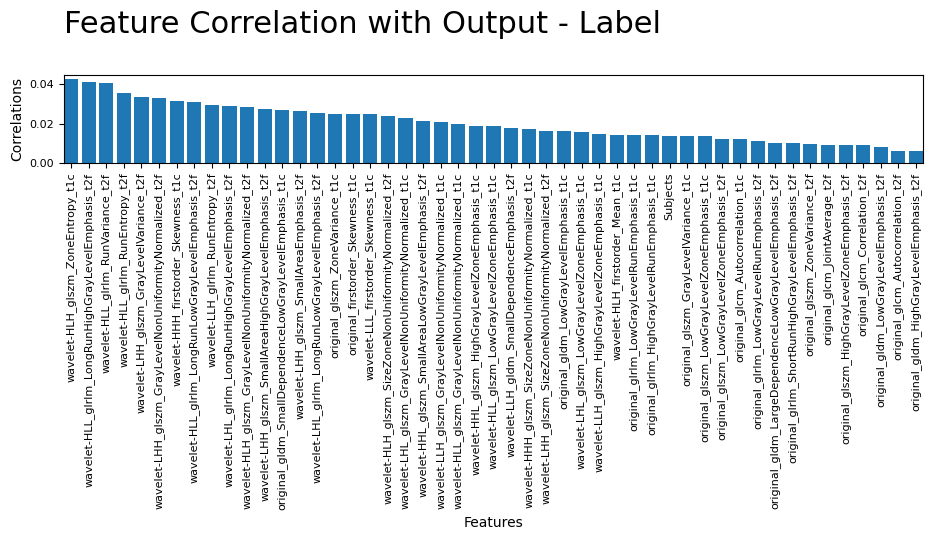

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


%matplotlib inline

def generate_training_test_data(df, extra_trees_classifier):
    
    # encode dataset as numerical for correlation analysis
    for column in df.columns:
        df[column] = df[column].astype('category').cat.codes
    
    X = df.drop("Grade", axis=1)
    print(f'Number of Features before feature selection {X.shape}')
    y = df['Grade'] # set the y to the dependent output variable
    model = extra_trees_classifier()
    model.fit(X,y)
    print(model)
    
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    correlations = feat_importances.nlargest(df.shape[1])

    df = pd.DataFrame(correlations).reset_index()
    df.columns = ['features', 'data']
                    
    tooltip = df.data
    tt = [str(round((ttip * 100), 2)) + '% correlation' for ttip in tooltip.values]
    
    fig, ax = plt.subplots(1, figsize=(9.5,5.5))
    
    ax.bar(df['features'], df['data'], align="center")
    plt.title('Feature Correlation with Output - Label\n', loc='left', fontsize=22)
    plt.xlabel('Features')
    plt.yticks(fontsize=8)
    plt.xticks(rotation = 90, fontsize=8)
    plt.ylabel('Correlations')
    plt.tight_layout()
    plt.margins(x=0)
    plt.show()
    return X, y, model
    
X, y, model = generate_training_test_data(dataset, ExtraTreesClassifier)

### Outlier Detection - Interquartile Range (IQR)

In [5]:
import pandas as pd
import numpy as np

def iqr_outliers(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        # Calculate quartiles
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define outlier bounds (1.5 times IQR below Q1 and above Q3)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers based on IQR bounds
        outliers_temp = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_temp.to_frame(col)], axis=1)

    return outliers

# Detect outliers using IQR method
outliers_df = iqr_outliers(dataset.copy())

# Print outliers DataFrame
print("Outliers:")
print(outliers_df)

Outliers:
Empty DataFrame
Columns: [Subjects, Grade, original_firstorder_Skewness_t1c, original_glrlm_HighGrayLevelRunEmphasis_t1c, wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-HLH_firstorder_Mean_t1c, wavelet-HLH_glszm_ZoneEntropy_t1c, wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c, wavelet-HHH_firstorder_Skewness_t1c, wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c, original_glszm_HighGrayLevelZoneEmphasis_t2f, wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f, wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f, wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f, wavelet-HLL_glrlm_RunVariance_t2f, wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f, wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f, wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f, wavelet-LLL_firstorder_Skewness_t1c, original_glrlm_LowGrayLevelRunEmphasis_t1c, 

In [6]:
dataset.isna().sum()

Subjects                                                  0
Grade                                                     0
original_firstorder_Skewness_t1c                          0
original_glrlm_HighGrayLevelRunEmphasis_t1c               0
wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c    0
wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c    0
wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c    0
wavelet-HLH_firstorder_Mean_t1c                           0
wavelet-HLH_glszm_ZoneEntropy_t1c                         0
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c           0
wavelet-HHH_firstorder_Skewness_t1c                       0
wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c     0
original_glszm_HighGrayLevelZoneEmphasis_t2f              0
wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f    0
wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f     0
wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f      0
wavelet-HLL_glrlm_RunVariance_t2f       

## Data Standardisation

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5, :5]

array([[-1.71372171,  0.05528135, -0.96593931, -1.49225468,  1.42882982],
       [-1.67686748,  0.71865749,  1.56450498,  0.2045833 ,  1.49230336],
       [-1.64001325, -1.30832518, -0.3209241 ,  1.02157937,  1.30188275],
       [-1.60315902, -0.57124057, -0.37054065, -0.86379617, -0.91969103],
       [-1.56630479, -0.90292864, -0.96593931,  0.95873352, -1.68137346]])

## Feature Selection 

### A Filter-Based Method - SelectKBest

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # Example scoring function

# Define the number of features to select (k)
k = 20  # You can adjust this value based on your needs

# Create a SelectKBest object with chi-square test for feature ranking (replace with desired scoring function)
selector = SelectKBest(chi2, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get scores for all features
scores = selector.scores_

# Get the selected features based on their scores
kbest_selected_features = X.columns[selector.get_support()]

# Create a list of tuples with (feature, score) for sorting
feature_scores = list(zip(kbest_selected_features, scores))

# Sort the list by score in descending order (highest score first)
feature_scores.sort(key=lambda x: x[1], reverse=True)

# Print information about selected features with corresponding scores in descending order
print("Selected features (ordered by score - highest first):\n")
for feature, score in feature_scores:
    print(f"{feature}: \t{score:.4f}")

# Get the transformed data with only the selected features
kbest_selected_X_dataset = selector.transform(X)

Selected features (ordered by score - highest first):

wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f: 	333.2295
wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f: 	186.6507
wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f: 	168.7552
original_glrlm_HighGrayLevelRunEmphasis_t1c: 	150.7117
wavelet-LLH_gldm_SmallDependenceEmphasis_t2f: 	148.4734
wavelet-HLH_glszm_ZoneEntropy_t1c: 	140.8918
original_glcm_Autocorrelation_t1c: 	138.9678
wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f: 	98.5637
wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f: 	91.7790
wavelet-HLL_glrlm_RunEntropy_t2f: 	91.4414
wavelet-LHH_glszm_SmallAreaEmphasis_t2f: 	85.3391
wavelet-LLH_glrlm_RunEntropy_t2f: 	79.5816
original_firstorder_Skewness_t1c: 	63.1292
wavelet-HHH_firstorder_Skewness_t1c: 	51.0935
wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f: 	49.5247
wavelet-LLL_firstorder_Skewness_t1c: 	40.5287
wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f: 	29.0786
original_gldm_SmallDependenceLowGrayLev

### Embedded Method - LASSO

LASSO Feature Importance:
                                              Feature  Importance
5   wavelet-HLL_glszm_GrayLevelNonUniformityNormal...    0.008738
38                    original_glszm_ZoneVariance_t2f    0.007266
4   wavelet-LHL_glszm_GrayLevelNonUniformityNormal...    0.007140
12  wavelet-LHH_glszm_GrayLevelNonUniformityNormal...    0.006709
7                   wavelet-HLH_glszm_ZoneEntropy_t1c    0.006199
26                    original_glszm_ZoneVariance_t1c    0.005069
46                   wavelet-LLH_glrlm_RunEntropy_t2f    0.004472
45                   wavelet-HLL_glrlm_RunEntropy_t2f    0.004394
47  wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f    0.004143
15                  wavelet-HLL_glrlm_RunVariance_t2f    0.004094
27    wavelet-LLH_glszm_HighGrayLevelZoneEmphasis_t1c    0.003896
42  wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f    0.003804
35                  original_glcm_Autocorrelation_t2f    0.003705
16  wavelet-HLH_glszm_GrayLevelNonUniformityNormal

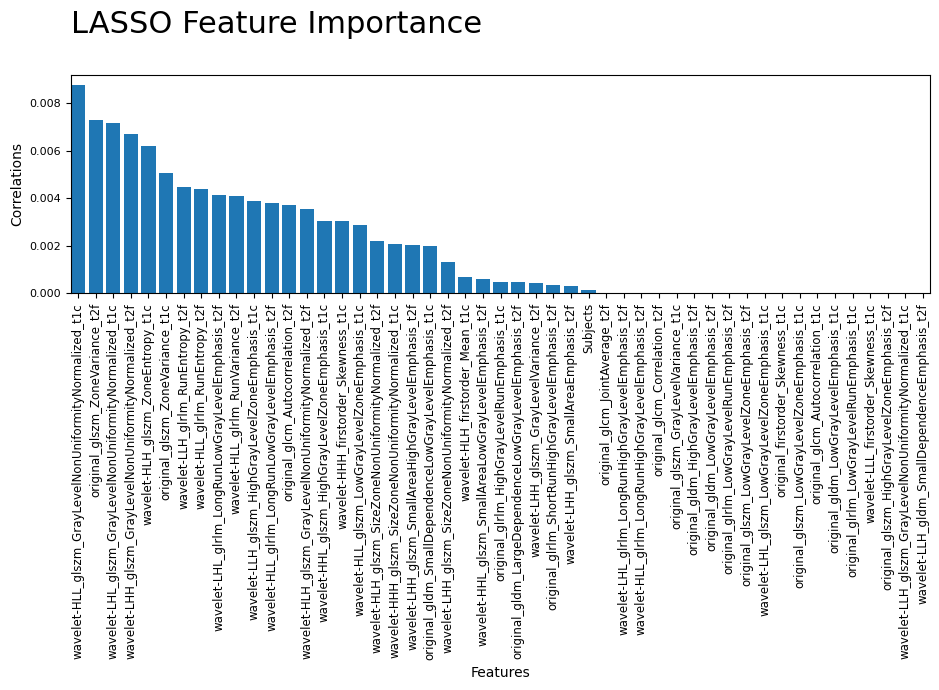

In [9]:
from sklearn.linear_model import Lasso

# LASSO feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)})
sorted_lasso_importance = lasso_importance.sort_values(by='Importance', ascending=False)
print("LASSO Feature Importance:")
lasso_selected_features = sorted_lasso_importance[sorted_lasso_importance['Importance'] > 0]
print(lasso_selected_features)

lasso_features = X_scaled[:,lasso_selected_features.index]

fig, ax = plt.subplots(1, figsize=(9.5,7))
    
# sorted_lasso_importance = sorted_lasso_importance[sorted_lasso_importance['Importance'] > 0]
ax.bar(sorted_lasso_importance['Feature'], sorted_lasso_importance['Importance'], align="center")

plt.title('LASSO Feature Importance\n', loc='left', fontsize=22)
plt.xlabel('Features')
plt.ylabel('Correlations')
plt.yticks(fontsize=8)
plt.xticks(rotation = 90, fontsize=8.5)
plt.tight_layout()
plt.margins(x=0)
plt.show()

## Model Training

#### Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state=10)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(lasso_features,y)

In [11]:
y_test[:5]

81    0
62    1
42    0
25    0
75    0
Name: Grade, dtype: int8

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
# RandomForest has default no of estimators as 100, which is same as BaggingClassifier
rf_model = RandomForestClassifier(
    max_depth = 4,
    max_samples = 0.8,
    oob_score = True,
    random_state = 42,
    n_jobs = -1
)

rf_model.fit(X_train, y_train)

print("Random Forest Model Trained")

Random Forest Model Trained


#### Support Vector Machines

In [13]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import train_test_split, cross_val_score

# Define the model parameters (adjust as needed)
svm_model = SVC(kernel='rbf')  # Choose kernel (e.g., linear, rbf)

# Train the model on the training data
svm_model.fit(X_train, y_train)

print("SVM Trained")

SVM Trained


#### LSTM

In [14]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def build_LSTM(num_features, output_shape):
    lstm_model = Sequential(name='LSTM_Algo')
    lstm_model.add(LSTM(num_features, return_sequences=True, input_shape=(time_steps, num_features), activation='tanh'))
    lstm_model.add(LSTM((num_features*16), activation='softmax'))
    lstm_model.add(Dense(output_shape, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return lstm_model

2024-03-28 13:39:45.509510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 13:39:45.509651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 13:39:45.678583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
def reshape_input(data):
    if isinstance(data, pd.DataFrame):
        data = data.values
    
    # Reshape the data into a 3D array
    num_samples = data.shape[0] 
    input = np.zeros((num_samples, time_steps, num_features))
    for i in range(num_samples):
        if i+time_steps < num_samples:
            input[i, :, :] = data[i:i+time_steps, :]
            
    return input

In [16]:
def encode_output(y):
    output = []
    for n in y:
        output.append(np.where(n == 0, [0, 1], [1, 0]))  # Map 0 to [0, 0] and 1 to [1, 0]
    
    return output

In [17]:
epoch = 200
num_features = lasso_selected_features.shape[0]

time_steps = 3
X_train_reshaped = reshape_input(X_train)
X_test_reshaped = reshape_input(X_test)
y_train_reshaped = np.array(encode_output(y_train))
y_test_reshaped = np.array(encode_output(y_test))

output_shape = y_test_reshaped.shape[1]

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)
print(f'Feature Count: {num_features} \nOutput Shape: {output_shape} \nTime Step: {time_steps}')

(65, 3, 30)
(29, 3, 30)
(65, 2)
(29, 2)
Feature Count: 30 
Output Shape: 2 
Time Step: 3


In [18]:
y_test_reshaped[:5]

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [19]:
import tensorflow as tf
lstm_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'lstm_model_best.weights.h5', monitor='val_loss', mode='min', verbose=1, 
    save_best_only=True, save_weights_only=True
)

In [20]:
def evaluate_model(lstm_model, X_train, y_train, X_test, y_test):
    lstm_perf = []
    lstm_train_metric = lstm_model.evaluate(X_train, y_train, return_dict=True)
    lstm_test_metric = lstm_model.evaluate(X_test, y_test, return_dict=True)
    training_accuracy = lstm_train_metric["accuracy"]*100
    training_loss = lstm_train_metric["loss"]*100
    test_accuracy = lstm_test_metric["accuracy"]*100
    test_loss = lstm_test_metric["loss"]*100
    lstm_perf.extend([training_accuracy, training_loss, test_accuracy, test_loss])
    print(f'Accuracy during training: {round(training_accuracy, 2)}% and loss: {round(training_loss, 4)}')
    print(f'Accuracy during test: {round(test_accuracy, 2)}% and loss: {round(test_loss, 4)}')
    
    return lstm_perf

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
lstm_model = build_LSTM(num_features, output_shape)

lstm_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM_Algo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 30)          │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 480)            │       981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           962 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 989,402 (3.77 MB)

 Trainable params: 989,402 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = lstm_model.fit(X_train_reshaped, y_train_reshaped, 
                         epochs = epoch, 
                         validation_data=(X_test_reshaped, y_test_reshaped), 
                         shuffle=True,
                         callbacks=[lstm_model_checkpoint_callback],
                         verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5700 - loss: 0.6933
Epoch 1: val_loss improved from inf to 0.69299, saving model to lstm_model_best.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 2/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5625 - loss: 0.6930
Epoch 2: val_loss did not improve from 0.69299
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 3/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5625 - loss: 0.6930
Epoch 3: val_loss did not improve from 0.69299
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 4/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5625 - loss: 0.6931
Epoch 4: val_loss did not improve from 0.69299
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 

## Model Evaluation

### LSTM 

In [24]:
lstm_model.load_weights('lstm_model_best.weights.h5')

In [25]:
lstm_perf = evaluate_model(lstm_model, X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4029 - loss: 0.6553 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4483 - loss: 0.6617
Accuracy during training: 43.08% and loss: 66.1931
Accuracy during test: 44.83% and loss: 66.1699


In [26]:
lstm_model.save('lstm_model.h5')

In [65]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

lstm_y_true = y_test_reshaped.argmin(axis=1)
lstm_y_pred = lstm_model.predict(X_test_reshaped)
lstm_y_pred_ = lstm_y_pred.argmin(axis=1)

# Calculate F1-score
lstm_f1 = f1_score(lstm_y_true, lstm_y_pred_)

# Calculate recall
lstm_recall = recall_score(lstm_y_true, lstm_y_pred_)

# Calculate precision
lstm_precision = precision_score(lstm_y_true, lstm_y_pred_)

# Calculate AUC-ROC score (applicable to binary classification)
lstm_auc = roc_auc_score(lstm_y_true, lstm_y_pred_)

lstm_perf.extend([lstm_f1, lstm_recall, lstm_precision, lstm_auc])

# Print the results
print("LSTM F1-score:", lstm_f1)
print("LSTM Recall:", lstm_recall)
print("LSTM Precision:", lstm_precision)
print("LSTM AUC-ROC:", lstm_auc)  # Only applicable for binary classification


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
LSTM F1-score: 0.6190476190476191
LSTM Recall: 1.0
LSTM Precision: 0.4482758620689655
LSTM AUC-ROC: 0.5


### SVM

In [76]:
# Make predictions on the test data
svm_y_pred = svm_model.predict(X_test)
svm_perf = []

# Evaluate the model performance (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_y_pred) * 100
svm_perf.append(accuracy)
print(f"Accuracy: {round(accuracy, 2)}%")
# Evaluate model performance on the test set (using existing split)
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, svm_y_pred) * 100
svm_perf.append(test_accuracy)
print(f"Validation Accuracy: {round(test_accuracy, 2)}%")

# Perform 5-fold cross-validation on the entire dataset (excluding the test set)
cv_accuracy = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy').mean() * 100 
svm_perf.append(cv_accuracy)
print(f"Cross-Validation Accuracy: {round(cv_accuracy, 2)}%")

# Calculate F1-score
svm_f1 = f1_score(y_test, svm_y_pred)
svm_perf.append(svm_f1)

# Calculate recall
svm_recall = recall_score(y_test, svm_y_pred)
svm_perf.append(svm_recall)

# Calculate precision
svm_precision = precision_score(y_test, svm_y_pred)
svm_perf.append(svm_precision)

# Calculate AUC-ROC score (applicable to binary classification)
svm_auc = roc_auc_score(y_test, svm_y_pred)
svm_perf.append(svm_auc)

# Print the results
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM Precision:", svm_precision)
print("SVM AUC-ROC:", svm_auc)

Accuracy: 86.21%
Validation Accuracy: 86.21%
Cross-Validation Accuracy: 75.38%
SVM F1-score: 0.8461538461538461
SVM Recall: 0.8461538461538461
SVM Precision: 0.8461538461538461
SVM AUC-ROC: 0.8605769230769231


### Random Forest

In [77]:
# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)
rf_perf = []

train_acc = rf_model.oob_score_ * 100
rf_perf.append(train_acc)

print(f'\n\nTraining Accuracy of Random Forest Model on Training dataset: {train_acc}%')

test_acc = rf_model.score(X_test, y_test) * 100

rf_perf.append(test_acc)
print(f'Test Accuracy of Random Forest Model on Test dataset: {test_acc}%')

scores = cross_val_score(rf_model, X, y, cv = 5) 

cross_val = scores.mean() * 100
print(f'Cross Validation Accuracy of Random Forest Model on full dataset: {cross_val}%')
rf_perf.append(cross_val)

# Calculate F1-score
rf_f1 = f1_score(y_test, rf_y_pred)
rf_perf.append(rf_f1)

# Calculate recall
rf_recall = recall_score(y_test, rf_y_pred)
rf_perf.append(rf_recall)

# Calculate precision
rf_precision = precision_score(y_test, rf_y_pred)
rf_perf.append(rf_precision)

# Calculate AUC-ROC score (applicable to binary classification)
rf_auc = roc_auc_score(y_test, rf_y_pred)
rf_perf.append(rf_auc)

# Print the results
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest Precision:", rf_precision)
print("Random Forest AUC-ROC:", rf_auc)



Training Accuracy of Random Forest Model on Training dataset: 69.23076923076923%
Test Accuracy of Random Forest Model on Test dataset: 82.75862068965517%
Cross Validation Accuracy of Random Forest Model on full dataset: 79.82456140350878%
Random Forest F1-score: 0.8
Random Forest Recall: 0.7692307692307693
Random Forest Precision: 0.8333333333333334
Random Forest AUC-ROC: 0.8221153846153846


## Hyperparameter Tuning

In [32]:
!pip install optuna
!pip install optuna-integration

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 3.2 MB/s eta 0:00:00


#### Optuna - LSTM Optimization

In [47]:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState

def create_model(trial):
    lstm_layers = trial.suggest_int("lstm_layers", 1, 5)
    lstm_hidden_layers = []

     # Compose neural network with one hidden layer.
    lstm_model_opt = Sequential(name='LSTM_Algo_Optuna')
    
    for i in range(lstm_layers):
        lstm_dropout = trial.suggest_float("lsmt_dropout_{}".format(i), 0.1, 0.3)
        lstm_units = trial.suggest_categorical("lstm_units_{}".format(i), [1, 2, 3, 4, 5])
        lstm_activation = trial.suggest_categorical("lstm_activation_{}".format(i), ['tanh', 'sigmoid', 'softmax', 'relu'])
        
        if i == (lstm_layers-1):
            return_sequences = False
        else:
            return_sequences = True
            
        lstm_model_opt.add(
            LSTM(
                units=num_features * lstm_units, 
                return_sequences=return_sequences, 
                input_shape=(time_steps, num_features), 
                activation=lstm_activation, 
                dropout=lstm_dropout
            )
        )
    
    lstm_model_activation = trial.suggest_categorical("lstm_model_activation", ['tanh', 'sigmoid', 'softmax', 'relu'])
    lstm_model_opt.add(Dense(output_shape, activation=lstm_model_activation))
    
    lstm_model_optimizer = trial.suggest_categorical("lstm_model_optimizer", ['adam', 'nadam'])
    lstm_model_loss = trial.suggest_categorical("lstm_model_loss", ["categorical_crossentropy", "binary_crossentropy"])
    lstm_model_opt.compile(loss=lstm_model_loss, optimizer=lstm_model_optimizer, metrics=['accuracy'])
        
    return lstm_model_opt

In [48]:
def objective(trial):
    # Clear clutter from previous TensorFlow graphs.
    tf.keras.backend.clear_session()

    # Metrics to be monitored by Optuna.
    if tf.__version__ >= "2":
        monitor = "val_accuracy"
    else:
        monitor = "val_acc"

    # Create tf.keras model instance.
    l_model = create_model(trial)

    # Create callbacks for early stopping and pruning.
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3),
        TFKerasPruningCallback(trial, monitor),
    ]
    
    # Train model.
    history = l_model.fit(X_train_reshaped, y_train_reshaped, 
                          epochs = 20, 
                          validation_data=(X_test_reshaped, y_test_reshaped), 
                          shuffle=True, 
                          verbose=1)

    return history.history[monitor][-1]

In [49]:
def show_result_lstm(study):
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("LSTM Study statistics: ")
    print("\tNumber of finished trials: ", len(study.trials))
    print("\tNumber of pruned trials: ", len(pruned_trials))
    print("\tNumber of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("\tValue: ", trial.value)

    print("\tParams: ")
    for key, value in trial.params.items():
        print("\t{}: {}".format(key, value))

In [52]:
def main_lstm():
    study_lstm = optuna.create_study(
        direction="maximize", 
        pruner=optuna.pruners.MedianPruner(n_startup_trials=2), 
        storage="sqlite:///db.sqlite",  # Specify the storage URL here.
        study_name="lstm_optimization",
        load_if_exists=True
    )

    study_lstm.optimize(objective, n_trials=500, timeout=25200)

    show_result_lstm(study_lstm)

In [53]:
if __name__ == "__main__":
    main_lstm()

[I 2024-03-24 23:17:53,631] A new study created in RDB with name: lstm_optimization


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.5540 - loss: 0.6815 - val_accuracy: 0.6552 - val_loss: 0.6752
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6239 - loss: 0.6692 - val_accuracy: 0.7241 - val_loss: 0.6683
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6007 - loss: 0.6605 - val_accuracy: 0.7241 - val_loss: 0.6621
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6511 - loss: 0.6502 - val_accuracy: 0.6897 - val_loss: 0.6550
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6395 - loss: 0.6540 - val_accuracy: 0.6897 - val_loss: 0.6477
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6395 - loss: 0.6218 - val_accuracy: 0.6897 - val_loss: 0.6396
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6357 - loss: 0.6162 - val_accuracy: 0.6897 - val_loss: 0.6312
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6435 - loss: 0.5850 - val_accuracy: 0.6897 - val_loss: 0.6219

[I 2024-03-24 23:18:00,832] Trial 0 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.1980398439998481, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15857154685625202, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.5698 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4108 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6933

[I 2024-03-24 23:18:10,341] Trial 1 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26956305285481585, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1201379618882385, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.24417799074620028, 'lstm_units_2': 3, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4302 - loss: 0.6915 - val_accuracy: 0.4483 - val_loss: 0.6950
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.6953

[I 2024-03-24 23:18:15,228] Trial 2 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.29573786172132277, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.4302 - loss: 2.7803 - val_accuracy: 0.4483 - val_loss: 2.8480
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4302 - loss: 1.8185 - val_accuracy: 0.4483 - val_loss: 2.2765
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.4418 - loss: 1.7932 - val_accuracy: 0.4483 - val_loss: 1.7155
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4108 - loss: 1.4674 - val_accuracy: 0.4483 - val_loss: 1.1778
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4612 - loss: 0.9611 - val_accuracy: 0.4138 - val_loss: 0.8896
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4302 - loss: 0.8200 - val_accuracy: 0.4138 - val_loss: 0.8322
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4340 - loss: 0.9647 - val_accuracy: 0.4138 - val_loss: 0.7998
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4650 - loss: 0.7504 - val_accuracy: 0.4138 - val_loss: 0.779

[I 2024-03-24 23:18:21,392] Trial 3 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.2972909389291133, 'lstm_units_0': 1, 'lstm_activation_0': 'sigmoid', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.4691 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/ste

[I 2024-03-24 23:18:30,651] Trial 4 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2595786394072413, 'lstm_units_0': 2, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.2886310936275739, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13051768948078443, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.3759 - loss: 2.3666 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4806 - loss: 0.7761 - val_accuracy: 0.4483 - val_loss: 0.7085
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4998 - loss: 0.9907 - val_accuracy: 0.4483 - val_loss: 0.7001
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5270 - loss: 0.7133 - val_accuracy: 0.4483 - val_loss: 0.6977
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4922 - loss: 0.6894 - val_accuracy: 0.4483 - val_loss: 0.6965
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5308 - loss: 0.6434 - val_accuracy: 0.4483 - val_loss: 0.6978
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4769 - loss: 0.6886 - val_accuracy: 0.4483 - val_loss: 0.7009
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4998 - loss: 0.6803 - val_accuracy: 0.4483 - val_loss: 0.7053

[I 2024-03-24 23:18:40,643] Trial 5 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10843347752201271, 'lstm_units_0': 1, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.10519600760546009, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.2744625899150408, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.5079 - loss: 1.5397 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4963 - loss: 0.6758 - val_accuracy: 0.4483 - val_loss: 0.6964
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4224 - loss: 0.7046 - val_accuracy: 0.4483 - val_loss: 0.6966
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4262 - loss: 0.6942 - val_accuracy: 0.4483 - val_loss: 0.6983
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4728 - loss: 0.6713 - val_accuracy: 0.4483 - val_loss: 0.7015
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4534 - loss: 0.6835 - val_accuracy: 0.4483 - val_loss: 0.7046
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4302 - loss: 0.6764 - val_accuracy: 0.4483 - val_loss: 0.7087
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4302 - loss: 0.7108 - val_accuracy: 0.4483 - val_loss: 0.7111

[I 2024-03-24 23:18:50,252] Trial 6 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16206672004096384, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.25142996136319623, 'lstm_units_1': 5, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.2881973172494051, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/ste

[I 2024-03-24 23:18:58,884] Trial 7 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10116716217210847, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.26449709463093357, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.2774600678956671, 'lstm_units_2': 1, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 458ms/step - accuracy: 0.5698 - loss: 0.7443 - val_accuracy: 0.5517 - val_loss: 0.6972
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.7186 - val_accuracy: 0.5517 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.7021 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.4828 - val_loss: 0.6933
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4885 - loss: 0.6878 - val_accuracy: 0.4483 - val_loss: 0.7011
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6869 - val_accuracy: 0.4483 - val_loss: 0.7113
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.7225
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6952 - val_accuracy: 0.4483 - val_loss: 0.733

[I 2024-03-24 23:19:11,346] Trial 8 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.26981104790301214, 'lstm_units_0': 2, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.1549596216763682, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14603486155314133, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.14484451598250936, 'lstm_units_3': 3, 'lstm_activation_3': 'sigmoid', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.4225 - loss: 3.6798 - val_accuracy: 0.4483 - val_loss: 2.2134
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4844 - loss: 2.1603 - val_accuracy: 0.4483 - val_loss: 1.9730
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 1.9336 - val_accuracy: 0.4483 - val_loss: 1.8102
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 1.7771 - val_accuracy: 0.4483 - val_loss: 1.6833
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 1.6497 - val_accuracy: 0.4483 - val_loss: 1.5748
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 1.5371 - val_accuracy: 0.4483 - val_loss: 1.4818
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 1.4549 - val_accuracy: 0.4483 - val_loss: 1.3983
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 1.3742 - val_accuracy: 0.4483 - val_loss: 1.3201

[I 2024-03-24 23:19:21,442] Trial 9 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13804539061110047, 'lstm_units_0': 2, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.16764313759494948, 'lstm_units_1': 1, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.23209426388398532, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 542ms/step - accuracy: 0.5115 - loss: 0.6940 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6124 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.694

[I 2024-03-24 23:19:34,618] Trial 10 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2113478495180167, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.2090810932765923, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1806177126920065, 'lstm_units_2': 2, 'lstm_activation_2': 'softmax', 'lsmt_dropout_3': 0.2744844105906072, 'lstm_units_3': 1, 'lstm_activation_3': 'tanh', 'lsmt_dropout_4': 0.19906687765246178, 'lstm_units_4': 3, 'lstm_activation_4': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 0 with value: 0.6896551847457886.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.5582 - loss: 4.1767 - val_accuracy: 0.4483 - val_loss: 0.7697
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4148 - loss: 1.2146 - val_accuracy: 0.4828 - val_loss: 0.7115
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5815 - loss: 0.5926 - val_accuracy: 0.4483 - val_loss: 0.7309
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4108 - loss: 0.7532 - val_accuracy: 0.5517 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5311 - loss: 0.6610 - val_accuracy: 0.5862 - val_loss: 0.6866
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5114 - loss: 0.6888 - val_accuracy: 0.5862 - val_loss: 0.6833
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5465 - loss: 0.6134 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5154 - loss: 0.6337 - val_accuracy: 0.5172 - val_loss: 0.6826

[I 2024-03-24 23:19:41,663] Trial 11 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.20533923046038785, 'lstm_units_0': 1, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.11406341905118712, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.5853 - loss: 3.4815 - val_accuracy: 0.5862 - val_loss: 1.7505
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5931 - loss: 3.6971 - val_accuracy: 0.6207 - val_loss: 2.6975
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5853 - loss: 2.8978 - val_accuracy: 0.6552 - val_loss: 1.3971
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6511 - loss: 3.1020 - val_accuracy: 0.6897 - val_loss: 3.3024
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5195 - loss: 2.7239 - val_accuracy: 0.6207 - val_loss: 2.3430
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5738 - loss: 1.5015 - val_accuracy: 0.6207 - val_loss: 2.4078
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5153 - loss: 1.2187 - val_accuracy: 0.6207 - val_loss: 2.3343
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6474 - loss: 2.2489 - val_accuracy: 0.6207 - val_loss: 2.3157

[I 2024-03-24 23:19:50,982] Trial 12 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.2034081437231517, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1488454153689318, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.5698 - loss: 0.7100 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5582 - loss: 0.6999 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5504 - loss: 0.6943 - val_accuracy: 0.4483 - val_loss: 0.6973
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4728 - loss: 0.6849 - val_accuracy: 0.4483 - val_loss: 0.7033
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4302 - loss: 0.6846 - val_accuracy: 0.4483 - val_loss: 0.7100
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6944 - val_accuracy: 0.4483 - val_loss: 0.7170
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.7236

[I 2024-03-24 23:19:58,703] Trial 13 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.1747295213347573, 'lstm_units_0': 1, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.19292796586974892, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.4885 - loss: 4.6638 - val_accuracy: 0.4483 - val_loss: 3.3628
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5192 - loss: 3.5145 - val_accuracy: 0.4828 - val_loss: 3.3480
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5234 - loss: 2.8382 - val_accuracy: 0.4828 - val_loss: 2.9774
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5192 - loss: 4.4803 - val_accuracy: 0.5517 - val_loss: 2.9825
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5465 - loss: 3.0372 - val_accuracy: 0.5517 - val_loss: 4.2778
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4842 - loss: 3.0007 - val_accuracy: 0.5172 - val_loss: 4.3027
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4882 - loss: 2.5767 - val_accuracy: 0.5517 - val_loss: 4.2700
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5152 - loss: 2.8253 - val_accuracy: 0.5517 - val_loss: 4.8363

[I 2024-03-24 23:20:06,159] Trial 14 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.23046203777664903, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1289919990076557, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.6086 - loss: 0.7292 - val_accuracy: 0.4483 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4730 - loss: 0.7015 - val_accuracy: 0.4483 - val_loss: 0.7164
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.7471
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.7255 - val_accuracy: 0.4483 - val_loss: 0.7618
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6984 - val_accuracy: 0.4483 - val_loss: 0.7638
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.7206 - val_accuracy: 0.4483 - val_loss: 0.7591
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.7030 - val_accuracy: 0.4483 - val_loss: 0.7433
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.7092 - val_accuracy: 0.4483 - val_loss: 0.7247

[I 2024-03-24 23:20:13,272] Trial 15 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.17804947690854442, 'lstm_units_0': 4, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.19358106620204218, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.5970 - loss: 6.2477 - val_accuracy: 0.4483 - val_loss: 2.8341
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5037 - loss: 4.0565 - val_accuracy: 0.5172 - val_loss: 2.3723
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4962 - loss: 2.9247 - val_accuracy: 0.4828 - val_loss: 2.9166
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5037 - loss: 3.1396 - val_accuracy: 0.5517 - val_loss: 2.8028
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4843 - loss: 4.0864 - val_accuracy: 0.5517 - val_loss: 2.7943
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4843 - loss: 4.9446 - val_accuracy: 0.5517 - val_loss: 1.8033
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3991 - loss: 2.8965 - val_accuracy: 0.5517 - val_loss: 1.7252
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4805 - loss: 2.7515 - val_accuracy: 0.6207 - val_loss: 1.7321

[I 2024-03-24 23:20:18,187] Trial 16 finished with value: 0.37931033968925476 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.2288170549715544, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 431ms/step - accuracy: 0.5309 - loss: 0.7052 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6939 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4496 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6987
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6950 - val_accuracy: 0.4483 - val_loss: 0.7055
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6936 - val_accuracy: 0.4483 - val_loss: 0.7125
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.7193
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6979 - val_accuracy: 0.4483 - val_loss: 0.7267

[I 2024-03-24 23:20:29,629] Trial 17 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.1509510485963076, 'lstm_units_0': 1, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.10329267212611222, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.10269494964444288, 'lstm_units_2': 1, 'lstm_activation_2': 'sigmoid', 'lsmt_dropout_3': 0.10652309505429682, 'lstm_units_3': 5, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.4496 - loss: 0.6924 - val_accuracy: 0.6207 - val_loss: 0.6901
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5893 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5931 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6848
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6823 - loss: 0.6754 - val_accuracy: 0.6207 - val_loss: 0.6813
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5815 - loss: 0.6671 - val_accuracy: 0.6207 - val_loss: 0.6774
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6397 - loss: 0.6656 - val_accuracy: 0.6552 - val_loss: 0.6727
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6319 - loss: 0.6532 - val_accuracy: 0.6552 - val_loss: 0.6677
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6125 - loss: 0.6496 - val_accuracy: 0.6207 - val_loss: 0.6617

[I 2024-03-24 23:20:38,729] Trial 18 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.18833989595754794, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13787438513361522, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 443ms/step - accuracy: 0.4302 - loss: 0.6934 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6944

[I 2024-03-24 23:20:50,593] Trial 19 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2260776010459999, 'lstm_units_0': 1, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.17509900522842026, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19222032652195517, 'lstm_units_2': 2, 'lstm_activation_2': 'softmax', 'lsmt_dropout_3': 0.2935959614609536, 'lstm_units_3': 2, 'lstm_activation_3': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.6821 - loss: 5.7035 - val_accuracy: 0.6207 - val_loss: 4.3596
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5502 - loss: 2.6475 - val_accuracy: 0.6552 - val_loss: 3.6049
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5425 - loss: 2.6200 - val_accuracy: 0.6207 - val_loss: 3.6998
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5466 - loss: 1.7177 - val_accuracy: 0.5172 - val_loss: 3.7592
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4846 - loss: 2.3419 - val_accuracy: 0.5172 - val_loss: 3.7248
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5156 - loss: 2.3062 - val_accuracy: 0.5862 - val_loss: 4.2550
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4614 - loss: 1.8778 - val_accuracy: 0.5517 - val_loss: 3.7659
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4535 - loss: 3.3440 - val_accuracy: 0.5517 - val_loss: 3.3283

[I 2024-03-24 23:20:55,933] Trial 20 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.1289609443767692, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.5583 - loss: 7.1438 - val_accuracy: 0.6897 - val_loss: 7.4351
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5891 - loss: 2.7597 - val_accuracy: 0.6552 - val_loss: 7.0429
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5428 - loss: 3.9997 - val_accuracy: 0.6552 - val_loss: 5.9084
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5467 - loss: 3.0758 - val_accuracy: 0.3793 - val_loss: 3.3813
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5156 - loss: 3.0641 - val_accuracy: 0.3793 - val_loss: 2.7900
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4691 - loss: 3.5962 - val_accuracy: 0.4138 - val_loss: 2.6895
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3527 - loss: 3.2897 - val_accuracy: 0.3793 - val_loss: 2.0824
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4846 - loss: 3.5442 - val_accuracy: 0.3103 - val_loss: 1.6562

[I 2024-03-24 23:21:02,722] Trial 21 finished with value: 0.3448275923728943 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.20263938910957408, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1475084771169274, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.5114 - loss: 4.4153 - val_accuracy: 0.5517 - val_loss: 5.0117
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5502 - loss: 3.6398 - val_accuracy: 0.5172 - val_loss: 4.5599
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5036 - loss: 2.5098 - val_accuracy: 0.5517 - val_loss: 4.8797
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6435 - loss: 2.9119 - val_accuracy: 0.5862 - val_loss: 4.3442
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6473 - loss: 2.0800 - val_accuracy: 0.6207 - val_loss: 3.7377
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6317 - loss: 1.2284 - val_accuracy: 0.6207 - val_loss: 2.1983
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6395 - loss: 1.0960 - val_accuracy: 0.5862 - val_loss: 2.1312
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6317 - loss: 1.2927 - val_accuracy: 0.5862 - val_loss: 1.5591

[I 2024-03-24 23:21:09,785] Trial 22 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.2116896873223318, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12487626329110411, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.5543 - loss: 3.8917 - val_accuracy: 0.5172 - val_loss: 5.4130
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5270 - loss: 2.9941 - val_accuracy: 0.5172 - val_loss: 4.3108
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5737 - loss: 3.4146 - val_accuracy: 0.4828 - val_loss: 5.9671
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5001 - loss: 3.7114 - val_accuracy: 0.4483 - val_loss: 3.6654
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5001 - loss: 3.2506 - val_accuracy: 0.5172 - val_loss: 4.1221
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5311 - loss: 2.5593 - val_accuracy: 0.4828 - val_loss: 2.7379
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5815 - loss: 2.9940 - val_accuracy: 0.4828 - val_loss: 3.7425
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4650 - loss: 1.9563 - val_accuracy: 0.4828 - val_loss: 2.6397

[I 2024-03-24 23:21:16,662] Trial 23 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.2445985829750471, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.2200542743033562, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6123 - loss: 6.7615 - val_accuracy: 0.4483 - val_loss: 7.5129
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6085 - loss: 5.9010 - val_accuracy: 0.4138 - val_loss: 6.4065
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4998 - loss: 6.1593 - val_accuracy: 0.4483 - val_loss: 7.0122
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5270 - loss: 6.2469 - val_accuracy: 0.4828 - val_loss: 6.4913
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4688 - loss: 5.9128 - val_accuracy: 0.4828 - val_loss: 6.4883
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5581 - loss: 6.0130 - val_accuracy: 0.4828 - val_loss: 6.4689
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5502 - loss: 6.3826 - val_accuracy: 0.4828 - val_loss: 5.8977
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5734 - loss: 5.6297 - val_accuracy: 0.4828 - val_loss: 6.4307

[I 2024-03-24 23:21:23,100] Trial 24 finished with value: 0.4137931168079376 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.18563283679788872, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.5192 - loss: 0.8127 - val_accuracy: 0.4828 - val_loss: 0.6939
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5196 - loss: 0.6995 - val_accuracy: 0.5517 - val_loss: 0.6984
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5195 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.7086
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5582 - loss: 0.6978 - val_accuracy: 0.5517 - val_loss: 0.7157
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5698 - loss: 0.6983 - val_accuracy: 0.5517 - val_loss: 0.7233
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5698 - loss: 0.6959 - val_accuracy: 0.5517 - val_loss: 0.7302
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6910 - val_accuracy: 0.5517 - val_loss: 0.7375
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6981 - val_accuracy: 0.5517 - val_loss: 0.7423

[I 2024-03-24 23:21:30,672] Trial 25 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.19683759422768626, 'lstm_units_0': 3, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.1668555529079338, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.5892 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4380 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6935

[I 2024-03-24 23:21:37,561] Trial 26 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.16557510980437595, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14666626561018103, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.4651 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4185 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6921
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4844 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6922
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4302 - loss: 0.6935 - val_accuracy: 0.4483 - val_loss: 0.6924
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4496 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6926
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4496 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.6928
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4496 - loss: 0.6915 - val_accuracy: 0.4483 - val_loss: 0.6930
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6932

[I 2024-03-24 23:21:42,774] Trial 27 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.2140534841226624, 'lstm_units_0': 1, 'lstm_activation_0': 'softmax', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.5076 - loss: 4.1017 - val_accuracy: 0.5172 - val_loss: 2.2973
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4108 - loss: 4.5436 - val_accuracy: 0.4828 - val_loss: 2.2642
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3644 - loss: 2.9789 - val_accuracy: 0.4828 - val_loss: 2.2571
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4380 - loss: 2.6486 - val_accuracy: 0.4828 - val_loss: 2.2634
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3411 - loss: 3.9986 - val_accuracy: 0.4828 - val_loss: 2.2280
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3294 - loss: 3.4409 - val_accuracy: 0.4828 - val_loss: 2.2270
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4576 - loss: 2.4653 - val_accuracy: 0.4828 - val_loss: 1.7546
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3798 - loss: 2.6080 - val_accuracy: 0.4828 - val_loss: 1.7469

[I 2024-03-24 23:21:49,982] Trial 28 finished with value: 0.4137931168079376 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.2444155982177335, 'lstm_units_0': 1, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.18116634294871534, 'lstm_units_1': 5, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4302 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6938
E

[I 2024-03-24 23:22:04,793] Trial 29 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.19454170398758766, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.11315189072435736, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.22375556668447652, 'lstm_units_2': 5, 'lstm_activation_2': 'sigmoid', 'lsmt_dropout_3': 0.21689320071634471, 'lstm_units_3': 4, 'lstm_activation_3': 'softmax', 'lsmt_dropout_4': 0.11150857881377325, 'lstm_units_4': 2, 'lstm_activation_4': 'softmax', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 444ms/step - accuracy: 0.5115 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6928 - val_accuracy: 0.5862 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6202 - loss: 0.6915 - val_accuracy: 0.6897 - val_loss: 0.6901
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6909 - val_accuracy: 0.6897 - val_loss: 0.6889
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6866
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6850 - val_accuracy: 0.6897 - val_loss: 0.6821
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6809 - val_accuracy: 0.6897 - val_loss: 0.6745
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6730 - val_accuracy: 0.6897 - val_loss: 0.6611

[I 2024-03-24 23:22:16,305] Trial 30 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2439347942862765, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1371497001142887, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1574137646737398, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.1982405795085616, 'lstm_units_3': 2, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step - accuracy: 0.4611 - loss: 0.6940 - val_accuracy: 0.6207 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6913 - val_accuracy: 0.6897 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7403 - loss: 0.6890 - val_accuracy: 0.6552 - val_loss: 0.6903
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6883 - val_accuracy: 0.6207 - val_loss: 0.6887
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6850 - val_accuracy: 0.6552 - val_loss: 0.6862
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6790 - val_accuracy: 0.6207 - val_loss: 0.6817
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6670 - val_accuracy: 0.6552 - val_loss: 0.6734
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6745 - loss: 0.6463 - val_accuracy: 0.6207 - val_loss: 0.6590

[I 2024-03-24 23:22:27,765] Trial 31 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.24727241063383534, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13550287704233233, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1690400939735821, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.20189570265595547, 'lstm_units_3': 2, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.5504 - loss: 0.6956 - val_accuracy: 0.6552 - val_loss: 0.6886
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6665 - loss: 0.6827 - val_accuracy: 0.5172 - val_loss: 0.6859
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6317 - loss: 0.6809 - val_accuracy: 0.5517 - val_loss: 0.6830
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5233 - loss: 0.6740 - val_accuracy: 0.6207 - val_loss: 0.6780
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4885 - loss: 0.6593 - val_accuracy: 0.5862 - val_loss: 0.6696
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5815 - loss: 0.6570 - val_accuracy: 0.5862 - val_loss: 0.6587
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6267 - val_accuracy: 0.5517 - val_loss: 0.6422
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6085 - loss: 0.6195 - val_accuracy: 0.5862 - val_loss: 0.6202

[I 2024-03-24 23:22:36,715] Trial 32 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2817190941009965, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1566817395349694, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.10559797923617631, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.5309 - loss: 0.6936 - val_accuracy: 0.5862 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6201 - loss: 0.6905 - val_accuracy: 0.6552 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6889 - val_accuracy: 0.6552 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6852 - val_accuracy: 0.6552 - val_loss: 0.6838
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6163 - loss: 0.6808 - val_accuracy: 0.6552 - val_loss: 0.6784
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6678 - val_accuracy: 0.6552 - val_loss: 0.6691
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6555 - val_accuracy: 0.6552 - val_loss: 0.6534
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6343 - val_accuracy: 0.6552 - val_loss: 0.627

[I 2024-03-24 23:22:51,120] Trial 33 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.27287739259228866, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16153815343021016, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.10441350360580254, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.16317410791186288, 'lstm_units_3': 2, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.4921 - loss: 0.7002 - val_accuracy: 0.5517 - val_loss: 0.6846
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5814 - loss: 0.6880 - val_accuracy: 0.7241 - val_loss: 0.6801
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7403 - loss: 0.6695 - val_accuracy: 0.6552 - val_loss: 0.6746
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6551 - loss: 0.6617 - val_accuracy: 0.6207 - val_loss: 0.6667
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6609 - val_accuracy: 0.6207 - val_loss: 0.6552
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6009 - loss: 0.6283 - val_accuracy: 0.6207 - val_loss: 0.6392
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6435 - loss: 0.6007 - val_accuracy: 0.6207 - val_loss: 0.6169
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6513 - loss: 0.5626 - val_accuracy: 0.6207 - val_loss: 0.5899

[I 2024-03-24 23:23:00,200] Trial 34 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28293154347993493, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1232520593988461, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.142875004209791, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5347 - loss: 0.6938 - val_accuracy: 0.7586 - val_loss: 0.6826
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6798 - val_accuracy: 0.6207 - val_loss: 0.6765
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6717 - val_accuracy: 0.6207 - val_loss: 0.6693
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6581 - val_accuracy: 0.6207 - val_loss: 0.6596
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6372 - val_accuracy: 0.6207 - val_loss: 0.6453
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5659 - loss: 0.6193 - val_accuracy: 0.6207 - val_loss: 0.6266
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.5883 - val_accuracy: 0.6207 - val_loss: 0.6038
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.5652 - val_accuracy: 0.6207 - val_loss: 0.5814

[I 2024-03-24 23:23:09,199] Trial 35 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28537596504785473, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11710799874227755, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13970545948969065, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 437ms/step - accuracy: 0.5698 - loss: 0.7753 - val_accuracy: 0.5517 - val_loss: 0.7112
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.7490 - val_accuracy: 0.5517 - val_loss: 0.6988
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.7282 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.7035 - val_accuracy: 0.5517 - val_loss: 0.6797
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6889 - val_accuracy: 0.5517 - val_loss: 0.6727
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5813 - loss: 0.6671 - val_accuracy: 0.6552 - val_loss: 0.6674
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7017 - loss: 0.6308 - val_accuracy: 0.5862 - val_loss: 0.6644
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4496 - loss: 0.6350 - val_accuracy: 0.5517 - val_loss: 0.6665

[I 2024-03-24 23:23:19,467] Trial 36 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.28129866238831863, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10035175532976406, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.15166098460153565, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.24546902649220761, 'lstm_units_3': 1, 'lstm_activation_3': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.5698 - loss: 0.7233 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4612 - loss: 0.6816 - val_accuracy: 0.4483 - val_loss: 0.7440
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7136 - val_accuracy: 0.4483 - val_loss: 0.8133
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7578 - val_accuracy: 0.4483 - val_loss: 0.8238
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7518 - val_accuracy: 0.4483 - val_loss: 0.7952
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.7364 - val_accuracy: 0.4483 - val_loss: 0.7581
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7239 - val_accuracy: 0.4483 - val_loss: 0.7302
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7006 - val_accuracy: 0.4483 - val_loss: 0.7148

[I 2024-03-24 23:23:27,776] Trial 37 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2581072284390536, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13798535065795434, 'lstm_units_1': 4, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.11564291202382983, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.4921 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5659 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6951
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6957
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6965

[I 2024-03-24 23:23:38,893] Trial 38 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2953858237223863, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12344307041916205, 'lstm_units_1': 4, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.1630021338407447, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 538ms/step - accuracy: 0.5079 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/st

[I 2024-03-24 23:23:52,808] Trial 39 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2635013024219803, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11846303968644371, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12548952072045022, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.17206712850864128, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lsmt_dropout_4': 0.284496631119124, 'lstm_units_4': 5, 'lstm_activation_4': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 11 with value: 0.7241379022598267.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.5892 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6843
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6814 - val_accuracy: 0.6552 - val_loss: 0.6775
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6797 - val_accuracy: 0.7241 - val_loss: 0.6701
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7287 - loss: 0.6525 - val_accuracy: 0.6207 - val_loss: 0.6608
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6387 - val_accuracy: 0.6552 - val_loss: 0.6467
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6155 - val_accuracy: 0.6552 - val_loss: 0.6260
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.5992 - val_accuracy: 0.6552 - val_loss: 0.5990
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6705 - loss: 0.5379 - val_accuracy: 0.6552 - val_loss: 0.5676

[I 2024-03-24 23:24:01,461] Trial 40 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2790893148385972, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13289420029740867, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20444118844834086, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 40 with value: 0.7586206793785095.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.5194 - loss: 0.6925 - val_accuracy: 0.5862 - val_loss: 0.6836
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6163 - loss: 0.6848 - val_accuracy: 0.7586 - val_loss: 0.6776
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6716 - val_accuracy: 0.6897 - val_loss: 0.6699
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6638 - val_accuracy: 0.6207 - val_loss: 0.6591
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6479 - val_accuracy: 0.6552 - val_loss: 0.6440
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6207 - val_accuracy: 0.6552 - val_loss: 0.6231
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.6038 - val_accuracy: 0.6552 - val_loss: 0.5959
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.5542 - val_accuracy: 0.6552 - val_loss: 0.5683

[I 2024-03-24 23:24:10,014] Trial 41 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2815467491958732, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13488389395253192, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.21322420343079262, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 40 with value: 0.7586206793785095.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.5425 - loss: 0.6944 - val_accuracy: 0.5172 - val_loss: 0.6852
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6839 - val_accuracy: 0.7241 - val_loss: 0.6787
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6239 - loss: 0.6723 - val_accuracy: 0.6897 - val_loss: 0.6714
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7171 - loss: 0.6674 - val_accuracy: 0.6552 - val_loss: 0.6616
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6465 - val_accuracy: 0.6207 - val_loss: 0.6480
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6352 - val_accuracy: 0.6207 - val_loss: 0.6297
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6319 - loss: 0.5787 - val_accuracy: 0.6207 - val_loss: 0.6075
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.5663 - val_accuracy: 0.6207 - val_loss: 0.5848

[I 2024-03-24 23:24:20,968] Trial 42 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29904744520070087, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13933271733102576, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.2097350390818951, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 40 with value: 0.7586206793785095.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5231 - loss: 0.6974 - val_accuracy: 0.6897 - val_loss: 0.6850
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6828 - val_accuracy: 0.6897 - val_loss: 0.6794
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6754 - val_accuracy: 0.6552 - val_loss: 0.6724
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6608 - val_accuracy: 0.5862 - val_loss: 0.6630
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6373 - val_accuracy: 0.5862 - val_loss: 0.6483
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6745 - loss: 0.6380 - val_accuracy: 0.6207 - val_loss: 0.6269
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6745 - loss: 0.5949 - val_accuracy: 0.6207 - val_loss: 0.5994
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.5388 - val_accuracy: 0.6552 - val_loss: 0.5712

[I 2024-03-24 23:24:29,947] Trial 43 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2514885702309788, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15254584268245086, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20686765566715487, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 452ms/step - accuracy: 0.4921 - loss: 0.7007 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6992 - val_accuracy: 0.5517 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5154 - loss: 0.6850 - val_accuracy: 0.4483 - val_loss: 0.6964
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6910 - val_accuracy: 0.4483 - val_loss: 0.7038
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6873 - val_accuracy: 0.4483 - val_loss: 0.7114
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6969 - val_accuracy: 0.4483 - val_loss: 0.7194
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6935 - val_accuracy: 0.4483 - val_loss: 0.7274

[I 2024-03-24 23:24:41,334] Trial 44 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.25925321694881254, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11025206128411551, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.20524713858564797, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.24114121008304862, 'lstm_units_3': 4, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.4885 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

[I 2024-03-24 23:24:49,755] Trial 45 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.25143744189539796, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1325769564194303, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.19038993808983365, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.6589 - loss: 0.6910 - val_accuracy: 0.5862 - val_loss: 0.6873
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5502 - loss: 0.6876 - val_accuracy: 0.6897 - val_loss: 0.6842
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5928 - loss: 0.6817 - val_accuracy: 0.7241 - val_loss: 0.6804
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6821 - loss: 0.6754 - val_accuracy: 0.6552 - val_loss: 0.6753
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6589 - loss: 0.6715 - val_accuracy: 0.6552 - val_loss: 0.6689
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6551 - loss: 0.6605 - val_accuracy: 0.6552 - val_loss: 0.6602
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6705 - loss: 0.6311 - val_accuracy: 0.6552 - val_loss: 0.6474
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6047 - loss: 0.6173 - val_accuracy: 0.6552 - val_loss: 0.6290

[I 2024-03-24 23:25:00,342] Trial 46 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2735201431262808, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1476475534807713, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2464315577248264, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5698 - loss: 0.7013 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.5517 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5620 - loss: 0.6973 - val_accuracy: 0.5862 - val_loss: 0.6919
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3876 - loss: 0.6902 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4108 - loss: 0.6894 - val_accuracy: 0.4483 - val_loss: 0.6971
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6865 - val_accuracy: 0.4483 - val_loss: 0.7007
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6865 - val_accuracy: 0.4483 - val_loss: 0.7049

[I 2024-03-24 23:25:09,230] Trial 47 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27191889874666714, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.22344471856407622, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2491034527443529, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.4533 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5775 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6954
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6962
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6971

[I 2024-03-24 23:25:18,012] Trial 48 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2895475057191906, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.2968991928882546, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2192952300874898, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.4225 - loss: 1.4834 - val_accuracy: 0.5517 - val_loss: 0.7053
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.7345 - val_accuracy: 0.5517 - val_loss: 0.6861
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.7013 - val_accuracy: 0.5517 - val_loss: 0.6844
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6893 - val_accuracy: 0.6552 - val_loss: 0.6894
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4885 - loss: 0.6860 - val_accuracy: 0.4483 - val_loss: 0.6958
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6839 - val_accuracy: 0.4483 - val_loss: 0.7020
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6866 - val_accuracy: 0.4483 - val_loss: 0.7076
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.7124

[I 2024-03-24 23:25:26,587] Trial 49 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2714017116508104, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.180091020792195, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2520755249484377, 'lstm_units_2': 3, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.5698 - loss: 0.7119 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4108 - loss: 0.6853 - val_accuracy: 0.4483 - val_loss: 0.7096
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6891 - val_accuracy: 0.4483 - val_loss: 0.7285
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6966 - val_accuracy: 0.4483 - val_loss: 0.7472
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7060 - val_accuracy: 0.4483 - val_loss: 0.7622
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7151 - val_accuracy: 0.4483 - val_loss: 0.7687
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7164 - val_accuracy: 0.4483 - val_loss: 0.7679

[I 2024-03-24 23:25:35,056] Trial 50 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2646086028824176, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.14978760785690337, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23288101707105077, 'lstm_units_2': 2, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step - accuracy: 0.5698 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.694

[I 2024-03-24 23:25:48,311] Trial 51 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.23644822474283295, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14542958273282944, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.26025691278243507, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.10614087739385668, 'lstm_units_3': 3, 'lstm_activation_3': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 453ms/step - accuracy: 0.5504 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6907 - val_accuracy: 0.7241 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6433 - loss: 0.6868 - val_accuracy: 0.7241 - val_loss: 0.6862
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.6840 - val_accuracy: 0.6897 - val_loss: 0.6826
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5815 - loss: 0.6734 - val_accuracy: 0.6552 - val_loss: 0.6755
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6629 - loss: 0.6622 - val_accuracy: 0.6897 - val_loss: 0.6630
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6707 - loss: 0.6369 - val_accuracy: 0.6897 - val_loss: 0.6428
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6629 - loss: 0.5969 - val_accuracy: 0.6552 - val_loss: 0.6125

[I 2024-03-24 23:25:59,410] Trial 52 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.22048563352200473, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12996830211852672, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.21238066837716715, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.1744698194412807, 'lstm_units_3': 2, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.4805 - loss: 0.6978 - val_accuracy: 0.5862 - val_loss: 0.6851
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5813 - loss: 0.6835 - val_accuracy: 0.6552 - val_loss: 0.6802
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7519 - loss: 0.6707 - val_accuracy: 0.6207 - val_loss: 0.6741
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6859 - loss: 0.6667 - val_accuracy: 0.6207 - val_loss: 0.6660
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6489 - val_accuracy: 0.6207 - val_loss: 0.6559
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6247 - val_accuracy: 0.6207 - val_loss: 0.6417
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6022 - val_accuracy: 0.6207 - val_loss: 0.6234
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6513 - loss: 0.5714 - val_accuracy: 0.6552 - val_loss: 0.6040

[I 2024-03-24 23:26:08,173] Trial 53 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2348337908631996, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1292797451528285, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.2104841386951207, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5892 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6925 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6317 - loss: 0.6899 - val_accuracy: 0.7586 - val_loss: 0.6889
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6627 - loss: 0.6873 - val_accuracy: 0.6552 - val_loss: 0.6869
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6848 - val_accuracy: 0.5862 - val_loss: 0.6842
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6779 - val_accuracy: 0.6207 - val_loss: 0.6800
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6762 - val_accuracy: 0.6552 - val_loss: 0.6737
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6666 - val_accuracy: 0.6207 - val_loss: 0.6642

[I 2024-03-24 23:26:16,700] Trial 54 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.21976503436680556, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10998742348562181, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19451235236761732, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - accuracy: 0.5504 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6007 - loss: 0.6899 - val_accuracy: 0.7241 - val_loss: 0.6886
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6007 - loss: 0.6879 - val_accuracy: 0.6897 - val_loss: 0.6869
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6317 - loss: 0.6852 - val_accuracy: 0.6552 - val_loss: 0.6844
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6395 - loss: 0.6810 - val_accuracy: 0.6552 - val_loss: 0.6804
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6750 - val_accuracy: 0.6552 - val_loss: 0.6736
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7131 - loss: 0.6723 - val_accuracy: 0.6897 - val_loss: 0.6632

[I 2024-03-24 23:26:27,639] Trial 55 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.22296755504583576, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10984609124899454, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19338781948681155, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.5698 - loss: 0.6944 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6909 - val_accuracy: 0.6552 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6085 - loss: 0.6892 - val_accuracy: 0.6207 - val_loss: 0.6886
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6870 - val_accuracy: 0.6207 - val_loss: 0.6864
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6831 - val_accuracy: 0.6207 - val_loss: 0.6829
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6511 - loss: 0.6826 - val_accuracy: 0.6207 - val_loss: 0.6775
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6700 - val_accuracy: 0.6207 - val_loss: 0.6694

[I 2024-03-24 23:26:36,735] Trial 56 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2555897951363466, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15993923681810127, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17842650273450938, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.6086 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6007 - loss: 0.6919 - val_accuracy: 0.6552 - val_loss: 0.6924
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5195 - loss: 0.6907 - val_accuracy: 0.4483 - val_loss: 0.6925
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6899 - val_accuracy: 0.4483 - val_loss: 0.6924
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.6920
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6841 - val_accuracy: 0.4483 - val_loss: 0.6911
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6836 - val_accuracy: 0.4483 - val_loss: 0.6892

[I 2024-03-24 23:26:47,412] Trial 57 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2765678173975957, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16972378487316214, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22012360639764644, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.14000249552240723, 'lstm_units_3': 2, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.4843 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6008 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6007 - loss: 0.6927 - val_accuracy: 0.6552 - val_loss: 0.6922
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6587 - loss: 0.6920 - val_accuracy: 0.6207 - val_loss: 0.6919
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 0.6906 - val_accuracy: 0.6207 - val_loss: 0.6913
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6910 - val_accuracy: 0.6207 - val_loss: 0.6906
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6898 - val_accuracy: 0.5862 - val_loss: 0.6896
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5583 - loss: 0.6856 - val_accuracy: 0.5862 - val_loss: 0.6881

[I 2024-03-24 23:26:55,828] Trial 58 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2190942700758391, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.2513808268361149, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23754183285635377, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - accuracy: 0.5115 - loss: 0.7516 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6989 - val_accuracy: 0.4828 - val_loss: 0.6925
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6754 - val_accuracy: 0.4483 - val_loss: 0.7335
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6937 - val_accuracy: 0.4483 - val_loss: 0.7808
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7208 - val_accuracy: 0.4483 - val_loss: 0.8034
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7359 - val_accuracy: 0.4483 - val_loss: 0.7967
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7339 - val_accuracy: 0.4483 - val_loss: 0.7736
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7334 - val_accuracy: 0.4483 - val_loss: 0.7459

[I 2024-03-24 23:27:06,545] Trial 59 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28979102018631314, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12903612798506517, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.2006070172538552, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step - accuracy: 0.5504 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6926 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6007 - loss: 0.6907 - val_accuracy: 0.6552 - val_loss: 0.6911
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5351 - loss: 0.6903 - val_accuracy: 0.5862 - val_loss: 0.6908
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4691 - loss: 0.6869 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4496 - loss: 0.6844 - val_accuracy: 0.5517 - val_loss: 0.6880
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4691 - loss: 0.6775 - val_accuracy: 0.5862 - val_loss: 0.6843
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5349 - loss: 0.6638 - val_accuracy: 0.6207 - val_loss: 0.6765

[I 2024-03-24 23:27:17,826] Trial 60 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.26606977890245886, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10822397985375302, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17824804186289264, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.17668102389876403, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5463 - loss: 0.6938 - val_accuracy: 0.5862 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6511 - loss: 0.6898 - val_accuracy: 0.6897 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6627 - loss: 0.6875 - val_accuracy: 0.6207 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6843 - val_accuracy: 0.6207 - val_loss: 0.6845
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6809
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6551 - loss: 0.6749 - val_accuracy: 0.6207 - val_loss: 0.6761
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5815 - loss: 0.6680 - val_accuracy: 0.6207 - val_loss: 0.6692
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6515 - val_accuracy: 0.6207 - val_loss: 0.6587

[I 2024-03-24 23:27:27,230] Trial 61 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.21864308945841396, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10598402349449543, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19292773569753557, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.4805 - loss: 0.6937 - val_accuracy: 0.6207 - val_loss: 0.6916
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6900 - val_accuracy: 0.6897 - val_loss: 0.6905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7481 - loss: 0.6859 - val_accuracy: 0.6207 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6849 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5233 - loss: 0.6791 - val_accuracy: 0.6552 - val_loss: 0.6842
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5233 - loss: 0.6773 - val_accuracy: 0.6552 - val_loss: 0.6802
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5001 - loss: 0.6678 - val_accuracy: 0.6552 - val_loss: 0.6748
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6615 - val_accuracy: 0.6552 - val_loss: 0.6674

[I 2024-03-24 23:27:35,777] Trial 62 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.22116495847283726, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1180551830988033, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19698683115713897, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5115 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6941
Ep

[I 2024-03-24 23:27:45,893] Trial 63 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2367939229989008, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.14263558676319296, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21716115620068172, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6957
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6958
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6960
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6962
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6963
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6965
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6966
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6968

[I 2024-03-24 23:27:54,610] Trial 64 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2265728893720934, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11248757003841323, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.29498075300361726, 'lstm_units_2': 1, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.5504 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5775 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4496 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6950

[I 2024-03-24 23:28:03,559] Trial 65 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20579178484156457, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1534590865583236, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.1867226019341256, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4302 - loss: 0.7936 - val_accuracy: 0.4483 - val_loss: 0.7501
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7187 - val_accuracy: 0.4483 - val_loss: 0.7242
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7005 - val_accuracy: 0.4483 - val_loss: 0.7165
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6949 - val_accuracy: 0.4483 - val_loss: 0.7158
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6899 - val_accuracy: 0.4483 - val_loss: 0.7177
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.7195
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.7188
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6769 - val_accuracy: 0.4483 - val_loss: 0.7129

[I 2024-03-24 23:28:12,100] Trial 66 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2763353801305867, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12628958278866315, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20541616176490027, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 443ms/step - accuracy: 0.4727 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6918 - val_accuracy: 0.6207 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6044 - loss: 0.6913 - val_accuracy: 0.7241 - val_loss: 0.6894
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6883
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6861 - loss: 0.6857 - val_accuracy: 0.6897 - val_loss: 0.6862
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5737 - loss: 0.6809 - val_accuracy: 0.6897 - val_loss: 0.6827
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6743 - val_accuracy: 0.6897 - val_loss: 0.6767
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6659 - val_accuracy: 0.6897 - val_loss: 0.6667

[I 2024-03-24 23:28:22,516] Trial 67 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.25074536564272165, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10067878746015896, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21300310247016216, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.13560288365787893, 'lstm_units_3': 1, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.5194 - loss: 0.6951 - val_accuracy: 0.5862 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6046 - loss: 0.6903 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7209 - loss: 0.6866 - val_accuracy: 0.6207 - val_loss: 0.6853
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7287 - loss: 0.6791 - val_accuracy: 0.6552 - val_loss: 0.6824
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6746 - val_accuracy: 0.6897 - val_loss: 0.6775
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6599 - val_accuracy: 0.6897 - val_loss: 0.6696
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6526 - val_accuracy: 0.6552 - val_loss: 0.6579
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6899 - loss: 0.6333 - val_accuracy: 0.6552 - val_loss: 0.6403

[I 2024-03-24 23:28:34,324] Trial 68 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2380054501992084, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13405285315043258, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.22449124357109834, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.5698 - loss: 0.6944 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5891 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6950
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6964

[I 2024-03-24 23:28:41,532] Trial 69 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.19130353710193349, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.118305026742149, 'lstm_units_1': 5, 'lstm_activation_1': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 546ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.892

[I 2024-03-24 23:28:54,576] Trial 70 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2128377218060509, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15176362011491662, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.2685686519382484, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.22305293914739777, 'lstm_units_3': 4, 'lstm_activation_3': 'sigmoid', 'lsmt_dropout_4': 0.10347136608238028, 'lstm_units_4': 4, 'lstm_activation_4': 'sigmoid', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step - accuracy: 0.4727 - loss: 0.6957 - val_accuracy: 0.5517 - val_loss: 0.6920
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5891 - loss: 0.6924 - val_accuracy: 0.5172 - val_loss: 0.6928
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6909 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6904 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6879 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6851 - val_accuracy: 0.4483 - val_loss: 0.6930
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6807 - val_accuracy: 0.4483 - val_loss: 0.6918

[I 2024-03-24 23:29:05,331] Trial 71 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.26803955758098463, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10734943664793632, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18074006851012794, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.17773726219236458, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - accuracy: 0.5892 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6926 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5891 - loss: 0.6910 - val_accuracy: 0.7241 - val_loss: 0.6916
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5661 - loss: 0.6899 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4496 - loss: 0.6879 - val_accuracy: 0.4483 - val_loss: 0.6908
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4612 - loss: 0.6867 - val_accuracy: 0.4483 - val_loss: 0.6893
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4380 - loss: 0.6838 - val_accuracy: 0.5862 - val_loss: 0.6864
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4806 - loss: 0.6772 - val_accuracy: 0.6207 - val_loss: 0.680

[I 2024-03-24 23:29:19,167] Trial 72 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2635679075972891, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11252326057802976, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17503352611517517, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.1895501120624434, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step - accuracy: 0.4339 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6916
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6919 - val_accuracy: 0.6207 - val_loss: 0.6917
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5545 - loss: 0.6904 - val_accuracy: 0.5172 - val_loss: 0.6918
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4496 - loss: 0.6894 - val_accuracy: 0.4828 - val_loss: 0.6913
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4612 - loss: 0.6867 - val_accuracy: 0.5172 - val_loss: 0.6902
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4691 - loss: 0.6844 - val_accuracy: 0.5862 - val_loss: 0.6877
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5001 - loss: 0.6804 - val_accuracy: 0.6207 - val_loss: 0.6832

[I 2024-03-24 23:29:30,380] Trial 73 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.27657496156714056, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12276778282201342, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19824205672447234, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.15625418478749578, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5582 - loss: 0.6926 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5969 - loss: 0.6899 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5928 - loss: 0.6879 - val_accuracy: 0.6897 - val_loss: 0.6846
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7209 - loss: 0.6842 - val_accuracy: 0.7586 - val_loss: 0.6813
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6783 - val_accuracy: 0.6897 - val_loss: 0.6773
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6716 - val_accuracy: 0.6897 - val_loss: 0.6715
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6395 - loss: 0.6739 - val_accuracy: 0.6897 - val_loss: 0.6640
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6627 - loss: 0.6560 - val_accuracy: 0.6897 - val_loss: 0.6549

[I 2024-03-24 23:29:39,467] Trial 74 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2911717744206013, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10723477720195981, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18271673982692777, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.4959 - loss: 0.6942 - val_accuracy: 0.5862 - val_loss: 0.6891
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5930 - loss: 0.6912 - val_accuracy: 0.6897 - val_loss: 0.6880
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6849 - val_accuracy: 0.5862 - val_loss: 0.6866
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6629 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5853 - loss: 0.6790 - val_accuracy: 0.5862 - val_loss: 0.6805
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6047 - loss: 0.6698 - val_accuracy: 0.5862 - val_loss: 0.6750
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6605 - val_accuracy: 0.6207 - val_loss: 0.6666
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5699 - loss: 0.6425 - val_accuracy: 0.6207 - val_loss: 0.6544

[I 2024-03-24 23:29:48,346] Trial 75 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.25175496448416446, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13073484094981308, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2316353018630655, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.5698 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6938

[I 2024-03-24 23:29:59,600] Trial 76 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20691614868118668, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14184790647147938, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.16927926118680103, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - accuracy: 0.5970 - loss: 0.7161 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5814 - loss: 0.7036 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5699 - loss: 0.6768 - val_accuracy: 0.4483 - val_loss: 0.7010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6875 - val_accuracy: 0.4483 - val_loss: 0.7176
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6892 - val_accuracy: 0.4483 - val_loss: 0.7370
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6968 - val_accuracy: 0.4483 - val_loss: 0.7548
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7186 - val_accuracy: 0.4483 - val_loss: 0.7650
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7178 - val_accuracy: 0.4483 - val_loss: 0.7668

[I 2024-03-24 23:30:10,788] Trial 77 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2411627044577507, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12388604153852682, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.20150195348477792, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.21406259752229695, 'lstm_units_3': 3, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 587ms/step - accuracy: 0.4302 - loss: 0.7027 - val_accuracy: 0.4483 - val_loss: 0.7109
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6946 - val_accuracy: 0.4483 - val_loss: 0.7120
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6947 - val_accuracy: 0.4483 - val_loss: 0.7143
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6949 - val_accuracy: 0.4483 - val_loss: 0.7169
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6963 - val_accuracy: 0.4483 - val_loss: 0.7197
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6970 - val_accuracy: 0.4483 - val_loss: 0.7226
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6986 - val_accuracy: 0.4483 - val_loss: 0.7254
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6997 - val_accuracy: 0.4483 - val_loss: 0.728

[I 2024-03-24 23:30:23,902] Trial 78 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2308563817867812, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1647859175783712, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1889555539877637, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.1256634615943495, 'lstm_units_3': 2, 'lstm_activation_3': 'softmax', 'lsmt_dropout_4': 0.28761151446371713, 'lstm_units_4': 1, 'lstm_activation_4': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - accuracy: 0.4457 - loss: 0.7139 - val_accuracy: 0.5517 - val_loss: 0.6880
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6970 - val_accuracy: 0.5517 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5814 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6978
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4418 - loss: 0.6878 - val_accuracy: 0.4483 - val_loss: 0.7114
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6961 - val_accuracy: 0.4483 - val_loss: 0.7274
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.7414
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6894 - val_accuracy: 0.4483 - val_loss: 0.7536
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.7133 - val_accuracy: 0.4483 - val_loss: 0.7607

[I 2024-03-24 23:30:34,371] Trial 79 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.18272191440403904, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11656946625140834, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22808075640335765, 'lstm_units_2': 1, 'lstm_activation_2': 'sigmoid', 'lsmt_dropout_3': 0.24102688904373717, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - accuracy: 0.5153 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5814 - loss: 0.6927 - val_accuracy: 0.6207 - val_loss: 0.6931
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5311 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4108 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6912 - val_accuracy: 0.4483 - val_loss: 0.6955
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6906 - val_accuracy: 0.4483 - val_loss: 0.6965
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6901 - val_accuracy: 0.4483 - val_loss: 0.6976
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6909 - val_accuracy: 0.4483 - val_loss: 0.6988

[I 2024-03-24 23:30:45,527] Trial 80 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2245228742638019, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.19350415351569936, 'lstm_units_1': 1, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.24148698614938058, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.6086 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5698 - loss: 0.6922 - val_accuracy: 0.6207 - val_loss: 0.6896
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7131 - loss: 0.6899 - val_accuracy: 0.5862 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - loss: 0.6875 - val_accuracy: 0.6897 - val_loss: 0.6870
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6511 - loss: 0.6836 - val_accuracy: 0.6552 - val_loss: 0.6847
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6551 - loss: 0.6793 - val_accuracy: 0.6552 - val_loss: 0.6812
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6899 - loss: 0.6756 - val_accuracy: 0.6897 - val_loss: 0.6760
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7093 - loss: 0.6632 - val_accuracy: 0.6552 - val_loss: 0.6679

[I 2024-03-24 23:30:55,078] Trial 81 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2927649254961753, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1345298854875904, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18265070204419093, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.4495 - loss: 0.6939 - val_accuracy: 0.6552 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5192 - loss: 0.6903 - val_accuracy: 0.5172 - val_loss: 0.6912
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4844 - loss: 0.6898 - val_accuracy: 0.6207 - val_loss: 0.6903
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4806 - loss: 0.6839 - val_accuracy: 0.5862 - val_loss: 0.6892
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4922 - loss: 0.6807 - val_accuracy: 0.5862 - val_loss: 0.6875
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4612 - loss: 0.6752 - val_accuracy: 0.5862 - val_loss: 0.6851
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4885 - loss: 0.6691 - val_accuracy: 0.6207 - val_loss: 0.6817
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5117 - loss: 0.6579 - val_accuracy: 0.6207 - val_loss: 0.6770

[I 2024-03-24 23:31:04,025] Trial 82 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2881672373171765, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10866547253109828, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17163218272139058, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5698 - loss: 0.6913 - val_accuracy: 0.5517 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5892 - loss: 0.6916 - val_accuracy: 0.6897 - val_loss: 0.6884
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6876 - val_accuracy: 0.7586 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6589 - loss: 0.6852 - val_accuracy: 0.6897 - val_loss: 0.6861
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7015 - loss: 0.6817 - val_accuracy: 0.6552 - val_loss: 0.6839
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6705 - loss: 0.6769 - val_accuracy: 0.6207 - val_loss: 0.6805
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6163 - loss: 0.6701 - val_accuracy: 0.6207 - val_loss: 0.6754

[I 2024-03-24 23:31:13,479] Trial 83 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28302560662701337, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10450862404410678, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15774675150755726, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.4727 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6163 - loss: 0.6924 - val_accuracy: 0.7241 - val_loss: 0.6918
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6861 - loss: 0.6910 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5311 - loss: 0.6884 - val_accuracy: 0.6207 - val_loss: 0.6911
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4885 - loss: 0.6890 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4496 - loss: 0.6848 - val_accuracy: 0.4828 - val_loss: 0.6897
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4691 - loss: 0.6786 - val_accuracy: 0.4828 - val_loss: 0.6883
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4496 - loss: 0.6747 - val_accuracy: 0.5517 - val_loss: 0.6862

[I 2024-03-24 23:31:22,205] Trial 84 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2781492780558541, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11419679098240315, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1945877421869618, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.4145 - loss: 0.7007 - val_accuracy: 0.5517 - val_loss: 0.6862
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5814 - loss: 0.6902 - val_accuracy: 0.6552 - val_loss: 0.6823
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.6807 - val_accuracy: 0.6207 - val_loss: 0.6776
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6704 - val_accuracy: 0.6552 - val_loss: 0.6714
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6493 - val_accuracy: 0.6552 - val_loss: 0.6622
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6087 - loss: 0.6431 - val_accuracy: 0.6552 - val_loss: 0.6482
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6203 - loss: 0.6219 - val_accuracy: 0.6552 - val_loss: 0.6293
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6629 - loss: 0.5879 - val_accuracy: 0.6552 - val_loss: 0.6044

[I 2024-03-24 23:31:32,966] Trial 85 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26675581270261073, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10708936440069028, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20585250208676853, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.5620 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6834
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5814 - loss: 0.6876 - val_accuracy: 0.6552 - val_loss: 0.6788
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6279 - loss: 0.6817 - val_accuracy: 0.6897 - val_loss: 0.6740
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6705 - loss: 0.6789 - val_accuracy: 0.6897 - val_loss: 0.6684
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6684 - val_accuracy: 0.7241 - val_loss: 0.6622
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6821 - loss: 0.6533 - val_accuracy: 0.7241 - val_loss: 0.6535
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7209 - loss: 0.6449 - val_accuracy: 0.7241 - val_loss: 0.6416
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7209 - loss: 0.6183 - val_accuracy: 0.7241 - val_loss: 0.6263

[I 2024-03-24 23:31:40,258] Trial 86 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.29591068818143346, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10072865447672195, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/ste

[I 2024-03-24 23:31:49,106] Trial 87 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11497443617044911, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.14481051436902187, 'lstm_units_1': 5, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.18525605819615273, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.5194 - loss: 0.6932 - val_accuracy: 0.7241 - val_loss: 0.6882
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6823 - val_accuracy: 0.5862 - val_loss: 0.6833
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6722 - val_accuracy: 0.6207 - val_loss: 0.6774
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6659 - val_accuracy: 0.6207 - val_loss: 0.6695
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6549 - val_accuracy: 0.6207 - val_loss: 0.6591
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6250 - val_accuracy: 0.6552 - val_loss: 0.6451
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6823 - loss: 0.6003 - val_accuracy: 0.6552 - val_loss: 0.6269
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.5668 - val_accuracy: 0.6207 - val_loss: 0.6061

[I 2024-03-24 23:31:57,973] Trial 88 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2611867426107313, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12204029237543657, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16363039651337952, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6396 - loss: 0.6912 - val_accuracy: 0.6897 - val_loss: 0.6846
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6511 - loss: 0.6861 - val_accuracy: 0.6552 - val_loss: 0.6812
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7287 - loss: 0.6742 - val_accuracy: 0.7241 - val_loss: 0.6774
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6163 - loss: 0.6696 - val_accuracy: 0.6552 - val_loss: 0.6724
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6047 - loss: 0.6565 - val_accuracy: 0.6552 - val_loss: 0.6654
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6125 - loss: 0.6402 - val_accuracy: 0.6552 - val_loss: 0.6563
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6397 - loss: 0.6257 - val_accuracy: 0.6552 - val_loss: 0.6444
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6192 - val_accuracy: 0.6552 - val_loss: 0.6299
Ep

[I 2024-03-24 23:32:08,477] Trial 89 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.199660689196327, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12626331915167843, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.21125451425473532, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.5698 - loss: 0.7078 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6983 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5659 - loss: 0.6873 - val_accuracy: 0.4483 - val_loss: 0.6960
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4496 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.7021
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6884 - val_accuracy: 0.4483 - val_loss: 0.7095
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.7177
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6966 - val_accuracy: 0.4483 - val_loss: 0.7257

[I 2024-03-24 23:32:20,149] Trial 90 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.28750909683811693, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.11133744111144786, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.19174101412349026, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.1765982110706864, 'lstm_units_3': 5, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.6474 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5891 - loss: 0.6868 - val_accuracy: 0.6897 - val_loss: 0.6829
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6775 - val_accuracy: 0.6897 - val_loss: 0.6775
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6716 - val_accuracy: 0.6207 - val_loss: 0.6704
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6498 - val_accuracy: 0.6207 - val_loss: 0.6599
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6551 - loss: 0.6338 - val_accuracy: 0.6207 - val_loss: 0.6447
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.5998 - val_accuracy: 0.6207 - val_loss: 0.6232
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6627 - loss: 0.5795 - val_accuracy: 0.6207 - val_loss: 0.5957

[I 2024-03-24 23:32:29,181] Trial 91 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.25593238240119914, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12044239725980953, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17465920174742866, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5192 - loss: 0.6917 - val_accuracy: 0.5172 - val_loss: 0.6876
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6864 - val_accuracy: 0.7241 - val_loss: 0.6830
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6732 - val_accuracy: 0.7241 - val_loss: 0.6764
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6718 - val_accuracy: 0.6552 - val_loss: 0.6674
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6498 - val_accuracy: 0.6552 - val_loss: 0.6548
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6190 - val_accuracy: 0.6552 - val_loss: 0.6362
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6783 - loss: 0.5958 - val_accuracy: 0.6897 - val_loss: 0.6118
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.5674 - val_accuracy: 0.6897 - val_loss: 0.5833

[I 2024-03-24 23:32:37,986] Trial 92 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26317956830731537, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1371997340511627, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15645819075100592, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.5892 - loss: 0.6964 - val_accuracy: 0.5862 - val_loss: 0.6851
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5891 - loss: 0.6871 - val_accuracy: 0.6897 - val_loss: 0.6807
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6779 - val_accuracy: 0.7586 - val_loss: 0.6753
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7093 - loss: 0.6642 - val_accuracy: 0.6897 - val_loss: 0.6674
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6499 - val_accuracy: 0.6897 - val_loss: 0.6559
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6977 - loss: 0.6293 - val_accuracy: 0.6897 - val_loss: 0.6396
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6977 - loss: 0.6146 - val_accuracy: 0.6897 - val_loss: 0.6182
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7519 - loss: 0.5676 - val_accuracy: 0.6897 - val_loss: 0.5914

[I 2024-03-24 23:32:46,696] Trial 93 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28095845164647487, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1291741148179891, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1633017025894847, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.5115 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6832
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6864 - val_accuracy: 0.6897 - val_loss: 0.6773
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6745 - val_accuracy: 0.6552 - val_loss: 0.6707
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6691 - val_accuracy: 0.6897 - val_loss: 0.6623
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6665 - loss: 0.6475 - val_accuracy: 0.6897 - val_loss: 0.6505
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6243 - val_accuracy: 0.6897 - val_loss: 0.6343
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.6057 - val_accuracy: 0.6897 - val_loss: 0.6130
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.5709 - val_accuracy: 0.6897 - val_loss: 0.5882

[I 2024-03-24 23:32:58,295] Trial 94 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2597496476755198, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.27279595988103167, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2158643209524955, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.4689 - loss: 0.6951 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6007 - loss: 0.6824 - val_accuracy: 0.6552 - val_loss: 0.6836
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6724 - val_accuracy: 0.6552 - val_loss: 0.6779
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6319 - loss: 0.6608 - val_accuracy: 0.6552 - val_loss: 0.6697
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6203 - loss: 0.6245 - val_accuracy: 0.6552 - val_loss: 0.6580
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6111 - val_accuracy: 0.6552 - val_loss: 0.6424
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.5705 - val_accuracy: 0.6897 - val_loss: 0.6238
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6629 - loss: 0.5542 - val_accuracy: 0.6897 - val_loss: 0.6084

[I 2024-03-24 23:33:07,573] Trial 95 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2694096592699649, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.20160286555101697, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20304280864305885, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 7.7023 - val_accuracy: 0.4483 - val_loss: 8.8927

[I 2024-03-24 23:33:16,739] Trial 96 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27342404448517055, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11382620087579655, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1467993365130855, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5037 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5814 - loss: 0.6919 - val_accuracy: 0.6552 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5772 - loss: 0.6899 - val_accuracy: 0.6552 - val_loss: 0.6897
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5815 - loss: 0.6880 - val_accuracy: 0.6207 - val_loss: 0.6890
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5273 - loss: 0.6829 - val_accuracy: 0.5862 - val_loss: 0.6876
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4459 - loss: 0.6865 - val_accuracy: 0.5862 - val_loss: 0.6855
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4769 - loss: 0.6803 - val_accuracy: 0.5862 - val_loss: 0.6826
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5001 - loss: 0.6695 - val_accuracy: 0.5862 - val_loss: 0.6781

[I 2024-03-24 23:33:25,442] Trial 97 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.24837077752878775, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12094079082081238, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17891612610799348, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.4418 - loss: 0.6918 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4882 - loss: 0.6854 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5311 - loss: 0.6823 - val_accuracy: 0.5862 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4418 - loss: 0.6823 - val_accuracy: 0.5862 - val_loss: 0.6829
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5195 - loss: 0.6649 - val_accuracy: 0.5862 - val_loss: 0.6786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4806 - loss: 0.6537 - val_accuracy: 0.6207 - val_loss: 0.6732
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5505 - loss: 0.6559 - val_accuracy: 0.5862 - val_loss: 0.6655
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6203 - loss: 0.6187 - val_accuracy: 0.5862 - val_loss: 0.6553

[I 2024-03-24 23:33:33,754] Trial 98 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2995468074081512, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14081255967731698, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.16521413970917156, 'lstm_units_2': 1, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.5698 - loss: 0.7114 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.7027 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6966 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5079 - loss: 0.6904 - val_accuracy: 0.4483 - val_loss: 0.6967
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6897 - val_accuracy: 0.4483 - val_loss: 0.7016
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6901 - val_accuracy: 0.4483 - val_loss: 0.7070
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.7126

[I 2024-03-24 23:33:44,887] Trial 99 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.22996896095067457, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15621166925178243, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.2774210584371254, 'lstm_units_2': 2, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.4108 - loss: 0.6924 - val_accuracy: 0.5862 - val_loss: 0.6834
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6745 - loss: 0.6654 - val_accuracy: 0.6207 - val_loss: 0.6718
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6705 - loss: 0.6553 - val_accuracy: 0.6552 - val_loss: 0.6612
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6705 - loss: 0.6257 - val_accuracy: 0.6207 - val_loss: 0.6500
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6473 - loss: 0.6077 - val_accuracy: 0.6552 - val_loss: 0.6384
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6279 - loss: 0.5854 - val_accuracy: 0.6552 - val_loss: 0.6256
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6395 - loss: 0.5548 - val_accuracy: 0.6552 - val_loss: 0.6118
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6783 - loss: 0.5509 - val_accuracy: 0.6552 - val_loss: 0.5982

[I 2024-03-24 23:33:51,931] Trial 100 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.292742758624357, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10416942896666176, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5698 - loss: 0.6948 - val_accuracy: 0.6897 - val_loss: 0.6875
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5697 - loss: 0.6870 - val_accuracy: 0.6552 - val_loss: 0.6834
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7209 - loss: 0.6768 - val_accuracy: 0.5862 - val_loss: 0.6785
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7171 - loss: 0.6661 - val_accuracy: 0.6207 - val_loss: 0.6711
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6319 - loss: 0.6533 - val_accuracy: 0.6207 - val_loss: 0.6609
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6551 - loss: 0.6366 - val_accuracy: 0.6552 - val_loss: 0.6470
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6110 - val_accuracy: 0.6552 - val_loss: 0.6290
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.5756 - val_accuracy: 0.6552 - val_loss: 0.6069

[I 2024-03-24 23:34:00,823] Trial 101 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2810089170944117, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1304263389003844, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13624274379729728, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - accuracy: 0.6318 - loss: 0.6940 - val_accuracy: 0.5862 - val_loss: 0.6864
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5969 - loss: 0.6858 - val_accuracy: 0.6897 - val_loss: 0.6829
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7635 - loss: 0.6768 - val_accuracy: 0.6897 - val_loss: 0.6779
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7171 - loss: 0.6673 - val_accuracy: 0.6207 - val_loss: 0.6703
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6525 - val_accuracy: 0.6207 - val_loss: 0.6598
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.6256 - val_accuracy: 0.6207 - val_loss: 0.6451
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6105 - val_accuracy: 0.6552 - val_loss: 0.6253
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.5756 - val_accuracy: 0.6552 - val_loss: 0.6015

[I 2024-03-24 23:34:09,676] Trial 102 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27937531350986244, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14944669123853996, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16191310274640858, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5698 - loss: 0.6943 - val_accuracy: 0.6897 - val_loss: 0.6864
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6123 - loss: 0.6866 - val_accuracy: 0.6207 - val_loss: 0.6823
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6736 - val_accuracy: 0.6552 - val_loss: 0.6771
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6692 - val_accuracy: 0.6552 - val_loss: 0.6696
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6536 - val_accuracy: 0.6897 - val_loss: 0.6587
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6222 - val_accuracy: 0.6897 - val_loss: 0.6432
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.5898 - val_accuracy: 0.6552 - val_loss: 0.6228
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6667 - loss: 0.5725 - val_accuracy: 0.6552 - val_loss: 0.5987

[I 2024-03-24 23:34:18,186] Trial 103 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2734369596325604, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14933216000650235, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18530415876580855, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.4921 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5891 - loss: 0.6875 - val_accuracy: 0.6897 - val_loss: 0.6832
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7519 - loss: 0.6773 - val_accuracy: 0.6552 - val_loss: 0.6788
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7055 - loss: 0.6732 - val_accuracy: 0.6552 - val_loss: 0.6723
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6639 - val_accuracy: 0.6207 - val_loss: 0.6637
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6939 - loss: 0.6386 - val_accuracy: 0.6207 - val_loss: 0.6507
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6407 - val_accuracy: 0.6207 - val_loss: 0.6328
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6551 - loss: 0.6183 - val_accuracy: 0.6207 - val_loss: 0.6105

[I 2024-03-24 23:34:29,566] Trial 104 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28375721433191203, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1253376808794328, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19745640917391774, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.4999 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5736 - loss: 0.6921 - val_accuracy: 0.7241 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6899 - val_accuracy: 0.6897 - val_loss: 0.6882
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5659 - loss: 0.6861 - val_accuracy: 0.6552 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5661 - loss: 0.6806 - val_accuracy: 0.6207 - val_loss: 0.6825
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5737 - loss: 0.6732 - val_accuracy: 0.6207 - val_loss: 0.6770
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5001 - loss: 0.6681 - val_accuracy: 0.6207 - val_loss: 0.6690
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6707 - loss: 0.6387 - val_accuracy: 0.6552 - val_loss: 0.6566

[I 2024-03-24 23:34:39,137] Trial 105 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2165915289205971, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13371220281425933, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20823900657028732, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 463ms/step - accuracy: 0.5698 - loss: 0.7073 - val_accuracy: 0.5517 - val_loss: 0.6872
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6239 - loss: 0.6860 - val_accuracy: 0.4483 - val_loss: 0.6930
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6819 - val_accuracy: 0.4483 - val_loss: 0.6985
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6750 - val_accuracy: 0.4483 - val_loss: 0.7033
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6740 - val_accuracy: 0.4483 - val_loss: 0.7052
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6620 - val_accuracy: 0.4483 - val_loss: 0.7019
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6498 - val_accuracy: 0.4483 - val_loss: 0.6925

[I 2024-03-24 23:34:49,883] Trial 106 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.2611276640793062, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.23358714568724318, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.15415817872231846, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.12018441706699129, 'lstm_units_3': 2, 'lstm_activation_3': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/ste

[I 2024-03-24 23:34:58,743] Trial 107 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2551612010127288, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11666536015992839, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1650763911121939, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.4533 - loss: 0.6959 - val_accuracy: 0.5517 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6935 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6969
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.6984
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.7003

[I 2024-03-24 23:35:10,113] Trial 108 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26618728531514124, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.10865440039530519, 'lstm_units_1': 5, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.2245005453342946, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.5269 - loss: 0.6935 - val_accuracy: 0.5862 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6202 - loss: 0.6906 - val_accuracy: 0.6897 - val_loss: 0.6890
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6893 - val_accuracy: 0.6897 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6886 - val_accuracy: 0.6552 - val_loss: 0.6858
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6821 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6827 - val_accuracy: 0.6552 - val_loss: 0.6803
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6770 - val_accuracy: 0.6207 - val_loss: 0.6756
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6692 - val_accuracy: 0.6207 - val_loss: 0.6686

[I 2024-03-24 23:35:18,978] Trial 109 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2768518221574979, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.17359614972218196, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.25837468880250886, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.5698 - loss: 0.7003 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6922 - val_accuracy: 0.5517 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5156 - loss: 0.6906 - val_accuracy: 0.4483 - val_loss: 0.6924
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5079 - loss: 0.6818 - val_accuracy: 0.4483 - val_loss: 0.6977
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6802 - val_accuracy: 0.4483 - val_loss: 0.7059
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6820 - val_accuracy: 0.4483 - val_loss: 0.7159
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6910 - val_accuracy: 0.4483 - val_loss: 0.7252
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6854 - val_accuracy: 0.4483 - val_loss: 0.7324

[I 2024-03-24 23:35:27,924] Trial 110 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28543266293560504, 'lstm_units_0': 4, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.16330280266962552, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1760655199824379, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5698 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5698 - loss: 0.6889 - val_accuracy: 0.6897 - val_loss: 0.6853
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7247 - loss: 0.6847 - val_accuracy: 0.6552 - val_loss: 0.6810
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7209 - loss: 0.6731 - val_accuracy: 0.6207 - val_loss: 0.6753
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6241 - loss: 0.6613 - val_accuracy: 0.6207 - val_loss: 0.6676
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6705 - loss: 0.6511 - val_accuracy: 0.6207 - val_loss: 0.6564
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6435 - loss: 0.6200 - val_accuracy: 0.6207 - val_loss: 0.6400
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6861 - loss: 0.5929 - val_accuracy: 0.6552 - val_loss: 0.6181

[I 2024-03-24 23:35:36,898] Trial 111 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2797602059104238, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14556412673569355, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1609670535212922, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5347 - loss: 0.6922 - val_accuracy: 0.5862 - val_loss: 0.6894
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6835 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7441 - loss: 0.6746 - val_accuracy: 0.7241 - val_loss: 0.6795
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7325 - loss: 0.6703 - val_accuracy: 0.6552 - val_loss: 0.6721
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6454 - val_accuracy: 0.6552 - val_loss: 0.6616
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6377 - val_accuracy: 0.6552 - val_loss: 0.6470
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.5942 - val_accuracy: 0.6552 - val_loss: 0.6274
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6589 - loss: 0.5803 - val_accuracy: 0.6552 - val_loss: 0.6035

[I 2024-03-24 23:35:45,493] Trial 112 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2908596156832062, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12728630183650327, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17037495936662006, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 391ms/step - accuracy: 0.5194 - loss: 0.6949 - val_accuracy: 0.5862 - val_loss: 0.6870
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6085 - loss: 0.6873 - val_accuracy: 0.7241 - val_loss: 0.6830
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7131 - loss: 0.6804 - val_accuracy: 0.6552 - val_loss: 0.6781
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6279 - loss: 0.6727 - val_accuracy: 0.6552 - val_loss: 0.6706
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6660 - val_accuracy: 0.6552 - val_loss: 0.6601
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6348 - val_accuracy: 0.6552 - val_loss: 0.6450
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6263 - val_accuracy: 0.6552 - val_loss: 0.6247
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.5827 - val_accuracy: 0.6552 - val_loss: 0.5989

[I 2024-03-24 23:35:57,269] Trial 113 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2712957841511332, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13744172367407553, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18930290490385013, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5892 - loss: 0.6927 - val_accuracy: 0.7241 - val_loss: 0.6884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6860 - val_accuracy: 0.6207 - val_loss: 0.6839
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7249 - loss: 0.6754 - val_accuracy: 0.6207 - val_loss: 0.6783
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7055 - loss: 0.6582 - val_accuracy: 0.6207 - val_loss: 0.6704
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6517 - val_accuracy: 0.6207 - val_loss: 0.6588
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6274 - val_accuracy: 0.6207 - val_loss: 0.6426
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6192 - val_accuracy: 0.6207 - val_loss: 0.6213
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.5439 - val_accuracy: 0.6207 - val_loss: 0.5967

[I 2024-03-24 23:36:06,126] Trial 114 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20866568128098797, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12123091981974415, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15229000212169885, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.5892 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6876
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6007 - loss: 0.6840 - val_accuracy: 0.7241 - val_loss: 0.6846
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7171 - loss: 0.6775 - val_accuracy: 0.5862 - val_loss: 0.6813
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6629 - loss: 0.6698 - val_accuracy: 0.6207 - val_loss: 0.6771
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6513 - loss: 0.6578 - val_accuracy: 0.6552 - val_loss: 0.6711
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6513 - loss: 0.6469 - val_accuracy: 0.6552 - val_loss: 0.6624
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6281 - loss: 0.6283 - val_accuracy: 0.6207 - val_loss: 0.6506
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6397 - loss: 0.6112 - val_accuracy: 0.6207 - val_loss: 0.6351

[I 2024-03-24 23:36:15,478] Trial 115 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16934855606233654, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13028859775112436, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.21460238909920926, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 436ms/step - accuracy: 0.5698 - loss: 1.2394 - val_accuracy: 0.4483 - val_loss: 0.7380
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6989 - val_accuracy: 0.4483 - val_loss: 0.8963
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.8405 - val_accuracy: 0.4483 - val_loss: 0.8493
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7864 - val_accuracy: 0.4483 - val_loss: 0.7910
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7485 - val_accuracy: 0.4483 - val_loss: 0.7572
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7264 - val_accuracy: 0.4483 - val_loss: 0.7371
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7019 - val_accuracy: 0.4483 - val_loss: 0.7248
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7016 - val_accuracy: 0.4483 - val_loss: 0.7174

[I 2024-03-24 23:36:26,070] Trial 116 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.22296845351554578, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.18538764467164914, 'lstm_units_1': 4, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1659091695624908, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lsmt_dropout_3': 0.1526658778280297, 'lstm_units_3': 1, 'lstm_activation_3': 'softmax', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5427 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6940

[I 2024-03-24 23:36:37,491] Trial 117 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.24125388349376173, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1574183959311488, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19500627291238745, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.4727 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6821 - loss: 0.6900 - val_accuracy: 0.7241 - val_loss: 0.6893
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6433 - loss: 0.6894 - val_accuracy: 0.6897 - val_loss: 0.6878
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6877 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7481 - loss: 0.6847 - val_accuracy: 0.6897 - val_loss: 0.6829
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6977 - loss: 0.6802 - val_accuracy: 0.6897 - val_loss: 0.6787
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6977 - loss: 0.6735 - val_accuracy: 0.6897 - val_loss: 0.6722

[I 2024-03-24 23:36:46,675] Trial 118 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2743366819102146, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15138583159536073, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14831347574836418, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.5231 - loss: 0.6929 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5504 - loss: 0.6924 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5891 - loss: 0.6917 - val_accuracy: 0.4828 - val_loss: 0.6927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6473 - loss: 0.6905 - val_accuracy: 0.6207 - val_loss: 0.6926
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6473 - loss: 0.6895 - val_accuracy: 0.5862 - val_loss: 0.6925
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6473 - loss: 0.6889 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6241 - loss: 0.6895 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5659 - loss: 0.6904 - val_accuracy: 0.5517 - val_loss: 0.6915

[I 2024-03-24 23:36:56,203] Trial 119 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27472272820799143, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15161299929545402, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1823784591327246, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.4921 - loss: 0.7184 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5467 - loss: 0.6903 - val_accuracy: 0.4483 - val_loss: 0.7025
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6895 - val_accuracy: 0.4483 - val_loss: 0.7234
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6934 - val_accuracy: 0.4483 - val_loss: 0.7456
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7028 - val_accuracy: 0.4483 - val_loss: 0.7638
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7207 - val_accuracy: 0.4483 - val_loss: 0.7745
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7222 - val_accuracy: 0.4483 - val_loss: 0.7772

[I 2024-03-24 23:37:07,327] Trial 120 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.15479180572758133, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14259732538163283, 'lstm_units_1': 1, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.22001207889522703, 'lstm_units_2': 3, 'lstm_activation_2': 'sigmoid', 'lsmt_dropout_3': 0.19431169272468735, 'lstm_units_3': 4, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.5037 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.7586 - val_loss: 0.6920
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6907 - val_accuracy: 0.6207 - val_loss: 0.6917
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6473 - loss: 0.6896 - val_accuracy: 0.6207 - val_loss: 0.6910
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6047 - loss: 0.6883 - val_accuracy: 0.6207 - val_loss: 0.6900
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5737 - loss: 0.6835 - val_accuracy: 0.6207 - val_loss: 0.6883
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5233 - loss: 0.6877 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5699 - loss: 0.6773 - val_accuracy: 0.6207 - val_loss: 0.6822

[I 2024-03-24 23:37:19,402] Trial 121 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26979876784618506, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14750063738546282, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.28644203524342693, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5309 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6917 - val_accuracy: 0.6552 - val_loss: 0.6918
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6861 - loss: 0.6903 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6872 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5853 - loss: 0.6858 - val_accuracy: 0.6207 - val_loss: 0.6887
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5195 - loss: 0.6822 - val_accuracy: 0.6207 - val_loss: 0.6864
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6827
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6749 - val_accuracy: 0.6207 - val_loss: 0.6770

[I 2024-03-24 23:37:28,675] Trial 122 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28589209575137503, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11569980087534389, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16043482079387467, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5698 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6895
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6908 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5969 - loss: 0.6885 - val_accuracy: 0.7586 - val_loss: 0.6866
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6160 - loss: 0.6871 - val_accuracy: 0.7241 - val_loss: 0.6843
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6815 - val_accuracy: 0.6552 - val_loss: 0.6804
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6751 - val_accuracy: 0.6552 - val_loss: 0.6733
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6625 - val_accuracy: 0.6552 - val_loss: 0.6610
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6937 - loss: 0.6552 - val_accuracy: 0.6552 - val_loss: 0.6405

[I 2024-03-24 23:37:38,097] Trial 123 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2951437538021026, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13949691385148844, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14462195939665243, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.5928 - loss: 0.6916 - val_accuracy: 0.6207 - val_loss: 0.6883
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6877 - val_accuracy: 0.6207 - val_loss: 0.6860
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6847 - val_accuracy: 0.6207 - val_loss: 0.6834
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6807 - val_accuracy: 0.6552 - val_loss: 0.6801
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6201 - loss: 0.6747 - val_accuracy: 0.6552 - val_loss: 0.6756
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6662 - val_accuracy: 0.6552 - val_loss: 0.6691
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6543 - val_accuracy: 0.6552 - val_loss: 0.6600
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6332 - val_accuracy: 0.6552 - val_loss: 0.6469

[I 2024-03-24 23:37:47,315] Trial 124 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29445744966676274, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15447527719149964, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13826750371151114, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5309 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6898 - val_accuracy: 0.7241 - val_loss: 0.6879
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6859 - loss: 0.6879 - val_accuracy: 0.6207 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7093 - loss: 0.6826 - val_accuracy: 0.6552 - val_loss: 0.6820
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6763 - val_accuracy: 0.6552 - val_loss: 0.6768
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6629 - loss: 0.6662 - val_accuracy: 0.6552 - val_loss: 0.6680
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6479 - val_accuracy: 0.6897 - val_loss: 0.6546
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6435 - loss: 0.6316 - val_accuracy: 0.6552 - val_loss: 0.6348

[I 2024-03-24 23:37:56,152] Trial 125 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28823651225421815, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15975589532099047, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.11897918624581197, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.4534 - loss: 0.6929 - val_accuracy: 0.5862 - val_loss: 0.6929
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6922 - val_accuracy: 0.5862 - val_loss: 0.6926
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5815 - loss: 0.6906 - val_accuracy: 0.6207 - val_loss: 0.6921
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4806 - loss: 0.6900 - val_accuracy: 0.5862 - val_loss: 0.6914
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5001 - loss: 0.6851 - val_accuracy: 0.5862 - val_loss: 0.6905
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4691 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6891
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6873
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5117 - loss: 0.6700 - val_accuracy: 0.6207 - val_loss: 0.6848

[I 2024-03-24 23:38:07,625] Trial 126 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2959961177863048, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14014084380367606, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14696222443245996, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5892 - loss: 0.6928 - val_accuracy: 0.5517 - val_loss: 0.6873
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5891 - loss: 0.6859 - val_accuracy: 0.7241 - val_loss: 0.6836
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6471 - loss: 0.6796 - val_accuracy: 0.6207 - val_loss: 0.6783
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6667 - val_accuracy: 0.6897 - val_loss: 0.6696
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7519 - loss: 0.6514 - val_accuracy: 0.6552 - val_loss: 0.6553
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6705 - loss: 0.6296 - val_accuracy: 0.6897 - val_loss: 0.6336
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6095 - val_accuracy: 0.6897 - val_loss: 0.6052
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.5676 - val_accuracy: 0.6897 - val_loss: 0.5747

[I 2024-03-24 23:38:17,075] Trial 127 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2681742064440189, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11034048545218075, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13158419340313374, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4223 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5775 - loss: 0.6913 - val_accuracy: 0.6897 - val_loss: 0.6922
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7093 - loss: 0.6894 - val_accuracy: 0.5172 - val_loss: 0.6919
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6009 - loss: 0.6899 - val_accuracy: 0.5172 - val_loss: 0.6915
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4380 - loss: 0.6889 - val_accuracy: 0.4828 - val_loss: 0.6910
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4380 - loss: 0.6844 - val_accuracy: 0.4483 - val_loss: 0.6902
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6818 - val_accuracy: 0.4828 - val_loss: 0.6889
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6726 - val_accuracy: 0.5172 - val_loss: 0.6867

[I 2024-03-24 23:38:25,946] Trial 128 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2785596522578566, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1344724830671778, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14250940545631385, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.4455 - loss: 0.6944 - val_accuracy: 0.6552 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6512 - loss: 0.6921 - val_accuracy: 0.7586 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6898 - val_accuracy: 0.6552 - val_loss: 0.6898
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6878 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6241 - loss: 0.6832 - val_accuracy: 0.6207 - val_loss: 0.6862
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6009 - loss: 0.6807 - val_accuracy: 0.6207 - val_loss: 0.6831
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5505 - loss: 0.6717 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6611 - val_accuracy: 0.6207 - val_loss: 0.6717

[I 2024-03-24 23:38:34,936] Trial 129 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2994675769537378, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16975384045875203, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20354842128683895, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.4108 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/ste

[I 2024-03-24 23:38:43,777] Trial 130 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2569980881542404, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1211408560035963, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20017442469917743, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.5231 - loss: 0.6933 - val_accuracy: 0.6897 - val_loss: 0.6880
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6905 - val_accuracy: 0.6897 - val_loss: 0.6863
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7519 - loss: 0.6832 - val_accuracy: 0.6207 - val_loss: 0.6836
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6629 - loss: 0.6798 - val_accuracy: 0.6552 - val_loss: 0.6795
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5931 - loss: 0.6726 - val_accuracy: 0.6552 - val_loss: 0.6740
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6633 - val_accuracy: 0.6552 - val_loss: 0.6654
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6395 - val_accuracy: 0.6552 - val_loss: 0.6528
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6397 - loss: 0.6144 - val_accuracy: 0.6552 - val_loss: 0.6342

[I 2024-03-24 23:38:55,496] Trial 131 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2818503410309739, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14411857857760202, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14955602606320062, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.5309 - loss: 0.6964 - val_accuracy: 0.5862 - val_loss: 0.6891
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6124 - loss: 0.6906 - val_accuracy: 0.6552 - val_loss: 0.6869
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7441 - loss: 0.6858 - val_accuracy: 0.6207 - val_loss: 0.6841
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6813 - val_accuracy: 0.6897 - val_loss: 0.6798
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6783 - loss: 0.6790 - val_accuracy: 0.6897 - val_loss: 0.6736
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6597 - val_accuracy: 0.6897 - val_loss: 0.6646
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6399 - val_accuracy: 0.6897 - val_loss: 0.6516
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6242 - val_accuracy: 0.6897 - val_loss: 0.6334

[I 2024-03-24 23:39:04,628] Trial 132 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2789458942825823, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12857764391225573, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17284435854773897, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.5930 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5697 - loss: 0.6890 - val_accuracy: 0.6897 - val_loss: 0.6858
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6511 - loss: 0.6838 - val_accuracy: 0.6897 - val_loss: 0.6829
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6397 - loss: 0.6794 - val_accuracy: 0.5862 - val_loss: 0.6788
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6690 - val_accuracy: 0.6207 - val_loss: 0.6723
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6551 - loss: 0.6530 - val_accuracy: 0.6207 - val_loss: 0.6623
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6199 - val_accuracy: 0.6207 - val_loss: 0.6472
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6473 - loss: 0.6223 - val_accuracy: 0.6207 - val_loss: 0.6276

[I 2024-03-24 23:39:14,163] Trial 133 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29040692090125186, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10295174882005166, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20811556278711918, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.4921 - loss: 0.6981 - val_accuracy: 0.5517 - val_loss: 0.6888
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5930 - loss: 0.6902 - val_accuracy: 0.7241 - val_loss: 0.6867
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6859 - val_accuracy: 0.6552 - val_loss: 0.6850
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6591 - loss: 0.6794 - val_accuracy: 0.6552 - val_loss: 0.6825
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5699 - loss: 0.6728 - val_accuracy: 0.6207 - val_loss: 0.6780
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5815 - loss: 0.6594 - val_accuracy: 0.6552 - val_loss: 0.6705
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5661 - loss: 0.6493 - val_accuracy: 0.6552 - val_loss: 0.6591
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5737 - loss: 0.6365 - val_accuracy: 0.6552 - val_loss: 0.6420

[I 2024-03-24 23:39:23,746] Trial 134 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2843161333784444, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13964396516095598, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14328959927581617, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3678 - loss: 0.6969 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6395 - loss: 0.6882 - val_accuracy: 0.6552 - val_loss: 0.6862
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6841 - val_accuracy: 0.6207 - val_loss: 0.6834
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6731 - val_accuracy: 0.5862 - val_loss: 0.6791
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6513 - loss: 0.6614 - val_accuracy: 0.5862 - val_loss: 0.6720
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6047 - loss: 0.6558 - val_accuracy: 0.5862 - val_loss: 0.6608
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6435 - loss: 0.6399 - val_accuracy: 0.6207 - val_loss: 0.6438
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5853 - loss: 0.5988 - val_accuracy: 0.6207 - val_loss: 0.6191
Ep

[I 2024-03-24 23:39:34,395] Trial 135 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23420853342611297, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13842628728505849, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1340761776420949, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.5698 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5891 - loss: 0.6911 - val_accuracy: 0.6897 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7481 - loss: 0.6808 - val_accuracy: 0.6207 - val_loss: 0.6833
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6085 - loss: 0.6797 - val_accuracy: 0.6552 - val_loss: 0.6771
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6317 - loss: 0.6698 - val_accuracy: 0.6552 - val_loss: 0.6685
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6473 - loss: 0.6560 - val_accuracy: 0.6552 - val_loss: 0.6539
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6189 - val_accuracy: 0.6552 - val_loss: 0.6272

[I 2024-03-24 23:39:44,551] Trial 136 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2841852272033613, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14847926166362294, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19200036255196107, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - accuracy: 0.6474 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.6207 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6627 - loss: 0.6867 - val_accuracy: 0.5862 - val_loss: 0.6889
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6513 - loss: 0.6829 - val_accuracy: 0.5862 - val_loss: 0.6862
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6397 - loss: 0.6757 - val_accuracy: 0.5862 - val_loss: 0.6811
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6047 - loss: 0.6608 - val_accuracy: 0.5862 - val_loss: 0.6713
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6389 - val_accuracy: 0.5862 - val_loss: 0.6542
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6150 - val_accuracy: 0.6552 - val_loss: 0.6275

[I 2024-03-24 23:39:55,994] Trial 137 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.27512616888923075, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13221523610746158, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1409549473708727, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.26136470896978087, 'lstm_units_3': 3, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.4843 - loss: 0.7104 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5582 - loss: 0.6966 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4728 - loss: 0.6890 - val_accuracy: 0.4483 - val_loss: 0.6991
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6889 - val_accuracy: 0.4483 - val_loss: 0.7105
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.7229
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6858 - val_accuracy: 0.4483 - val_loss: 0.7340
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6982 - val_accuracy: 0.4483 - val_loss: 0.7424
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7111 - val_accuracy: 0.4483 - val_loss: 0.7471

[I 2024-03-24 23:40:04,867] Trial 138 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.264778661937121, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12477893589850057, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.14532442077699054, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 603ms/step - accuracy: 0.5311 - loss: 1.4098 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4692 - loss: 0.7420 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5892 - loss: 0.6824 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4805 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3565 - loss: 0.7296 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4882 - loss: 0.6827 - val_accuracy: 0.4483 - val_loss: 0.6985
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4108 - loss: 0.6950 - val_accuracy: 0.4483 - val_loss: 0.7036
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4380 - loss: 0.6945 - val_accuracy: 0.4483 - val_loss: 0.708

[I 2024-03-24 23:40:20,895] Trial 139 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2712558034963808, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11241526599850593, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12946131468929972, 'lstm_units_2': 3, 'lstm_activation_2': 'softmax', 'lsmt_dropout_3': 0.18536300725152094, 'lstm_units_3': 3, 'lstm_activation_3': 'sigmoid', 'lsmt_dropout_4': 0.20551948820430802, 'lstm_units_4': 1, 'lstm_activation_4': 'relu', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.4339 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6939

[I 2024-03-24 23:40:30,715] Trial 140 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2613023863806655, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.1506530864585129, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1504193661897663, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.4727 - loss: 0.7161 - val_accuracy: 0.5517 - val_loss: 0.6859
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6918 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5737 - loss: 0.6857 - val_accuracy: 0.4483 - val_loss: 0.6957
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6820 - val_accuracy: 0.4483 - val_loss: 0.7084
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6905 - val_accuracy: 0.4483 - val_loss: 0.7213
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6966 - val_accuracy: 0.4483 - val_loss: 0.7301
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6997 - val_accuracy: 0.4483 - val_loss: 0.7374
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6833 - val_accuracy: 0.4483 - val_loss: 0.7406

[I 2024-03-24 23:40:39,743] Trial 141 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28501354832732884, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.13773655091814865, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1585203546747316, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5037 - loss: 0.6951 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6885 - val_accuracy: 0.6897 - val_loss: 0.6869
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6841 - val_accuracy: 0.6897 - val_loss: 0.6850
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6203 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6821
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5621 - loss: 0.6692 - val_accuracy: 0.6207 - val_loss: 0.6778
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5038 - loss: 0.6490 - val_accuracy: 0.6207 - val_loss: 0.6705
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5427 - loss: 0.6527 - val_accuracy: 0.6552 - val_loss: 0.6592
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5195 - loss: 0.6037 - val_accuracy: 0.6207 - val_loss: 0.6426

[I 2024-03-24 23:40:48,542] Trial 142 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2807130401055007, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11797940681001277, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15334006019221327, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.5970 - loss: 0.6940 - val_accuracy: 0.6207 - val_loss: 0.6826
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6628 - loss: 0.6846 - val_accuracy: 0.7241 - val_loss: 0.6746
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7325 - loss: 0.6743 - val_accuracy: 0.6552 - val_loss: 0.6644
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6618 - val_accuracy: 0.6897 - val_loss: 0.6506
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6357 - val_accuracy: 0.6897 - val_loss: 0.6318
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.5951 - val_accuracy: 0.6897 - val_loss: 0.6055
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7093 - loss: 0.5777 - val_accuracy: 0.6552 - val_loss: 0.5743
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.5308 - val_accuracy: 0.6552 - val_loss: 0.5465

[I 2024-03-24 23:40:57,319] Trial 143 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2917777364820868, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1069980208611229, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16682191292168333, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.5309 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6922 - val_accuracy: 0.6897 - val_loss: 0.6922
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6896 - val_accuracy: 0.5172 - val_loss: 0.6916
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5311 - loss: 0.6887 - val_accuracy: 0.5172 - val_loss: 0.6907
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4844 - loss: 0.6810 - val_accuracy: 0.4828 - val_loss: 0.6889
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4612 - loss: 0.6718 - val_accuracy: 0.5172 - val_loss: 0.6857
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4496 - loss: 0.6700 - val_accuracy: 0.5517 - val_loss: 0.6811
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4728 - loss: 0.6623 - val_accuracy: 0.5862 - val_loss: 0.6747

[I 2024-03-24 23:41:08,876] Trial 144 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2874963697440032, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14173928362734467, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1858407099435829, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.5425 - loss: 0.7000 - val_accuracy: 0.5862 - val_loss: 0.6851
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6822 - val_accuracy: 0.6552 - val_loss: 0.6805
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6731 - val_accuracy: 0.6207 - val_loss: 0.6742
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6473 - loss: 0.6592 - val_accuracy: 0.5862 - val_loss: 0.6647
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6290 - val_accuracy: 0.5862 - val_loss: 0.6498
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6234 - val_accuracy: 0.6207 - val_loss: 0.6291
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.5726 - val_accuracy: 0.6207 - val_loss: 0.6047
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6241 - loss: 0.5346 - val_accuracy: 0.6207 - val_loss: 0.5831

[I 2024-03-24 23:41:18,221] Trial 145 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2744466827007659, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13222177728845064, 'lstm_units_1': 4, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1770444967475858, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4883 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6915 - val_accuracy: 0.5862 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5889 - loss: 0.6900 - val_accuracy: 0.7586 - val_loss: 0.6886
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6201 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5815 - loss: 0.6852 - val_accuracy: 0.5172 - val_loss: 0.6862
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5737 - loss: 0.6785 - val_accuracy: 0.5517 - val_loss: 0.6844
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4963 - loss: 0.6710 - val_accuracy: 0.5517 - val_loss: 0.6814
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5041 - loss: 0.6744 - val_accuracy: 0.5517 - val_loss: 0.6773

[I 2024-03-24 23:41:27,427] Trial 146 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2529980411059204, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1003614515772686, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24945588340714295, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.
[I 2024-03-24 23:41:27,427] Trial 146 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2529980411059204, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1003614515772686, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24945588340714295, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'cat

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5463 - loss: 0.6939 - val_accuracy: 0.7241 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6279 - loss: 0.6905 - val_accuracy: 0.6552 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6899 - loss: 0.6857 - val_accuracy: 0.6552 - val_loss: 0.6873
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6085 - loss: 0.6834 - val_accuracy: 0.5862 - val_loss: 0.6849
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6203 - loss: 0.6762 - val_accuracy: 0.6207 - val_loss: 0.6815
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6676 - val_accuracy: 0.5862 - val_loss: 0.6768
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6203 - loss: 0.6533 - val_accuracy: 0.6207 - val_loss: 0.6704
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6339 - val_accuracy: 0.6552 - val_loss: 0.6615

[I 2024-03-24 23:41:36,498] Trial 147 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2160994973359962, 'lstm_units_0': 3, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1269551895806612, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19661554189610286, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.5698 - loss: 0.7077 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.7020 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6974 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6907 - val_accuracy: 0.4483 - val_loss: 0.6970
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6902 - val_accuracy: 0.4483 - val_loss: 0.7008
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6906 - val_accuracy: 0.4483 - val_loss: 0.7048

[I 2024-03-24 23:41:45,345] Trial 148 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2671713568123675, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13524052428095898, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.155575100051975, 'lstm_units_2': 1, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 396ms/step - accuracy: 0.5115 - loss: 0.6986 - val_accuracy: 0.5517 - val_loss: 0.6901
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5814 - loss: 0.6908 - val_accuracy: 0.5862 - val_loss: 0.6882
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6874 - val_accuracy: 0.6552 - val_loss: 0.6861
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6802 - val_accuracy: 0.6207 - val_loss: 0.6832
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6726 - val_accuracy: 0.6207 - val_loss: 0.6786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6653 - val_accuracy: 0.6207 - val_loss: 0.6714
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6646 - val_accuracy: 0.6207 - val_loss: 0.6612
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6309 - val_accuracy: 0.6207 - val_loss: 0.6473

[I 2024-03-24 23:41:57,034] Trial 149 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2111464313452391, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1460531432227968, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.20827856290603913, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5504 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6870
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5813 - loss: 0.6883 - val_accuracy: 0.6552 - val_loss: 0.6829
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6794 - val_accuracy: 0.7241 - val_loss: 0.6783
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7131 - loss: 0.6737 - val_accuracy: 0.6897 - val_loss: 0.6719
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6939 - loss: 0.6593 - val_accuracy: 0.6897 - val_loss: 0.6627
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6481 - val_accuracy: 0.6897 - val_loss: 0.6499
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6213 - val_accuracy: 0.6897 - val_loss: 0.6328
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6551 - loss: 0.5868 - val_accuracy: 0.7241 - val_loss: 0.6107

[I 2024-03-24 23:42:06,371] Trial 150 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.22757357502851117, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1547476662661824, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20054202014962724, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5892 - loss: 0.6938 - val_accuracy: 0.7241 - val_loss: 0.6847
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6871 - val_accuracy: 0.6897 - val_loss: 0.6799
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6775 - val_accuracy: 0.6207 - val_loss: 0.6743
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6629 - val_accuracy: 0.6207 - val_loss: 0.6661
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6357 - loss: 0.6501 - val_accuracy: 0.6552 - val_loss: 0.6548
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6218 - val_accuracy: 0.6207 - val_loss: 0.6395
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6003 - val_accuracy: 0.6207 - val_loss: 0.6191
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6861 - loss: 0.5538 - val_accuracy: 0.6552 - val_loss: 0.5961

[I 2024-03-24 23:42:15,269] Trial 151 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2717385564808314, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15063942561555058, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18217826012934113, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.4844 - loss: 0.6916 - val_accuracy: 0.6552 - val_loss: 0.6889
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6395 - loss: 0.6853 - val_accuracy: 0.6897 - val_loss: 0.6855
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6747 - val_accuracy: 0.6552 - val_loss: 0.6808
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.6601 - val_accuracy: 0.6207 - val_loss: 0.6743
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6465 - val_accuracy: 0.6207 - val_loss: 0.6650
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6861 - loss: 0.6283 - val_accuracy: 0.6207 - val_loss: 0.6521
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.5963 - val_accuracy: 0.6552 - val_loss: 0.6350
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.5582 - val_accuracy: 0.6552 - val_loss: 0.6147

[I 2024-03-24 23:42:24,813] Trial 152 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27650205349074863, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1403363945251338, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18780410323840224, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.4999 - loss: 0.6945 - val_accuracy: 0.5862 - val_loss: 0.6857
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6123 - loss: 0.6866 - val_accuracy: 0.6897 - val_loss: 0.6810
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7325 - loss: 0.6824 - val_accuracy: 0.7241 - val_loss: 0.6750
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6722 - val_accuracy: 0.6897 - val_loss: 0.6674
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6580 - val_accuracy: 0.6897 - val_loss: 0.6560
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6341 - val_accuracy: 0.6897 - val_loss: 0.6395
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6297 - val_accuracy: 0.6897 - val_loss: 0.6173
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.5847 - val_accuracy: 0.6552 - val_loss: 0.5895

[I 2024-03-24 23:42:33,622] Trial 153 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.283073998293643, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14785630928742954, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16166519114705744, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.5698 - loss: 0.6953 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6867 - val_accuracy: 0.6552 - val_loss: 0.6819
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6782 - val_accuracy: 0.6552 - val_loss: 0.6756
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6708 - val_accuracy: 0.6552 - val_loss: 0.6665
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6483 - val_accuracy: 0.6552 - val_loss: 0.6539
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6315 - val_accuracy: 0.6552 - val_loss: 0.6358
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6000 - val_accuracy: 0.6552 - val_loss: 0.6119
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.5547 - val_accuracy: 0.6552 - val_loss: 0.5825

[I 2024-03-24 23:42:44,748] Trial 154 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2938293385022609, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1237533633920832, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16040473600212207, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.6086 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6008 - loss: 0.6897 - val_accuracy: 0.6897 - val_loss: 0.6835
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6820 - val_accuracy: 0.6897 - val_loss: 0.6796
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7093 - loss: 0.6743 - val_accuracy: 0.6897 - val_loss: 0.6741
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6705 - loss: 0.6596 - val_accuracy: 0.6897 - val_loss: 0.6663
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6745 - loss: 0.6481 - val_accuracy: 0.6897 - val_loss: 0.6552
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6082 - val_accuracy: 0.6552 - val_loss: 0.6386
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.5903 - val_accuracy: 0.6552 - val_loss: 0.6158

[I 2024-03-24 23:42:53,827] Trial 155 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2937447107513852, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12220719663615269, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16069808433793306, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.3991 - loss: 0.6940 - val_accuracy: 0.6552 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6899 - val_accuracy: 0.6897 - val_loss: 0.6882
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5891 - loss: 0.6895 - val_accuracy: 0.6897 - val_loss: 0.6857
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6160 - loss: 0.6859 - val_accuracy: 0.6897 - val_loss: 0.6824
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6824 - val_accuracy: 0.6897 - val_loss: 0.6776
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6765 - val_accuracy: 0.6897 - val_loss: 0.6709
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6730 - val_accuracy: 0.6552 - val_loss: 0.6613
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6583 - val_accuracy: 0.6552 - val_loss: 0.6474

[I 2024-03-24 23:43:02,674] Trial 156 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29568621489959435, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11510310710520846, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.26964754903212335, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.4843 - loss: 0.6959 - val_accuracy: 0.6897 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7055 - loss: 0.6893 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5853 - loss: 0.6871 - val_accuracy: 0.6552 - val_loss: 0.6859
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6754 - val_accuracy: 0.6552 - val_loss: 0.6813
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5621 - loss: 0.6687 - val_accuracy: 0.6552 - val_loss: 0.6745
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5621 - loss: 0.6606 - val_accuracy: 0.6552 - val_loss: 0.6646
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6420 - val_accuracy: 0.6552 - val_loss: 0.6484
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6111 - val_accuracy: 0.6207 - val_loss: 0.6213

[I 2024-03-24 23:43:12,019] Trial 157 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2957511410609706, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11498486154131288, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21288611466213586, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 400ms/step - accuracy: 0.5309 - loss: 0.6942 - val_accuracy: 0.5862 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7481 - loss: 0.6891 - val_accuracy: 0.6552 - val_loss: 0.6869
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6875 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6826 - val_accuracy: 0.6552 - val_loss: 0.6794
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6760 - val_accuracy: 0.6897 - val_loss: 0.6739
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6663 - val_accuracy: 0.6552 - val_loss: 0.6662
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6546 - val_accuracy: 0.6552 - val_loss: 0.6559
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6293 - val_accuracy: 0.6897 - val_loss: 0.6419

[I 2024-03-24 23:43:23,201] Trial 158 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29942642688842747, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11975024497883217, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.25918590309300743, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - accuracy: 0.6512 - loss: 0.6940 - val_accuracy: 0.5517 - val_loss: 0.6875
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6860 - val_accuracy: 0.7241 - val_loss: 0.6842
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7441 - loss: 0.6824 - val_accuracy: 0.7241 - val_loss: 0.6803
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6627 - loss: 0.6739 - val_accuracy: 0.6897 - val_loss: 0.6749
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6592 - val_accuracy: 0.6552 - val_loss: 0.6665
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6624 - val_accuracy: 0.6552 - val_loss: 0.6543
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6269 - val_accuracy: 0.6552 - val_loss: 0.6368
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6325 - val_accuracy: 0.6897 - val_loss: 0.6131

[I 2024-03-24 23:43:32,359] Trial 159 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2936277245160145, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14416185727737232, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2724707722928464, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.4921 - loss: 6.7360 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254

[I 2024-03-24 23:43:41,489] Trial 160 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2883253108538894, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.13653191622251856, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.28504697025642206, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.4843 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6085 - loss: 0.6913 - val_accuracy: 0.6207 - val_loss: 0.6916
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6899 - val_accuracy: 0.6552 - val_loss: 0.6904
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6859 - val_accuracy: 0.6207 - val_loss: 0.6888
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5502 - loss: 0.6850 - val_accuracy: 0.6207 - val_loss: 0.6865
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6760 - val_accuracy: 0.6207 - val_loss: 0.6834
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6163 - loss: 0.6684 - val_accuracy: 0.6552 - val_loss: 0.6782
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6551 - loss: 0.6584 - val_accuracy: 0.6552 - val_loss: 0.6705

[I 2024-03-24 23:43:49,876] Trial 161 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2915573894807672, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10859745150041723, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16944135728681686, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.5970 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6163 - loss: 0.6908 - val_accuracy: 0.6897 - val_loss: 0.6899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6627 - loss: 0.6873 - val_accuracy: 0.7241 - val_loss: 0.6883
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6840 - val_accuracy: 0.6552 - val_loss: 0.6862
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6798 - val_accuracy: 0.6207 - val_loss: 0.6834
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6743 - val_accuracy: 0.6207 - val_loss: 0.6789
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6551 - loss: 0.6705 - val_accuracy: 0.6207 - val_loss: 0.6722
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 0.6471 - val_accuracy: 0.6897 - val_loss: 0.6621

[I 2024-03-24 23:43:58,375] Trial 162 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2959428755905521, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11231252559687437, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24240593590859905, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.5736 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6201 - loss: 0.6902 - val_accuracy: 0.7241 - val_loss: 0.6902
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6898 - val_accuracy: 0.6207 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7249 - loss: 0.6886 - val_accuracy: 0.6207 - val_loss: 0.6878
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6319 - loss: 0.6879 - val_accuracy: 0.5862 - val_loss: 0.6863
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6774 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5853 - loss: 0.6806 - val_accuracy: 0.6207 - val_loss: 0.6812
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6047 - loss: 0.6715 - val_accuracy: 0.6207 - val_loss: 0.6767

[I 2024-03-24 23:44:09,751] Trial 163 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2841931408543257, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1242271734154177, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2644866513156626, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.4611 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6917 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5930 - loss: 0.6902 - val_accuracy: 0.7241 - val_loss: 0.6881
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6044 - loss: 0.6877 - val_accuracy: 0.6897 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7171 - loss: 0.6819 - val_accuracy: 0.7241 - val_loss: 0.6831
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7171 - loss: 0.6794 - val_accuracy: 0.6552 - val_loss: 0.6786
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6716 - val_accuracy: 0.6552 - val_loss: 0.6721
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6627

[I 2024-03-24 23:44:18,796] Trial 164 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2898074789504562, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10627355268088395, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2350865639953348, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5309 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6008 - loss: 0.6908 - val_accuracy: 0.7241 - val_loss: 0.6894
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6511 - loss: 0.6881 - val_accuracy: 0.6207 - val_loss: 0.6878
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6872 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6433 - loss: 0.6828 - val_accuracy: 0.6207 - val_loss: 0.6828
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6627 - loss: 0.6783 - val_accuracy: 0.6552 - val_loss: 0.6787
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6720 - val_accuracy: 0.6552 - val_loss: 0.6728
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7015 - loss: 0.6596 - val_accuracy: 0.6552 - val_loss: 0.6641

[I 2024-03-24 23:44:27,880] Trial 165 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2872289719802802, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1603526602992212, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23595584331263525, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5231 - loss: 0.6974 - val_accuracy: 0.5517 - val_loss: 0.6839
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5814 - loss: 0.6880 - val_accuracy: 0.6897 - val_loss: 0.6789
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6800 - val_accuracy: 0.6897 - val_loss: 0.6739
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7055 - loss: 0.6695 - val_accuracy: 0.6552 - val_loss: 0.6671
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6551 - val_accuracy: 0.6207 - val_loss: 0.6571
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6359 - val_accuracy: 0.6207 - val_loss: 0.6419
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6278 - val_accuracy: 0.6207 - val_loss: 0.6225
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6163 - loss: 0.5955 - val_accuracy: 0.6552 - val_loss: 0.6000

[I 2024-03-24 23:44:36,640] Trial 166 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27950311124052296, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11660632594961962, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.25314456353708426, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.5892 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6921 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6086 - loss: 0.6897 - val_accuracy: 0.7241 - val_loss: 0.6870
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6852 - val_accuracy: 0.6552 - val_loss: 0.6855
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6825 - val_accuracy: 0.6207 - val_loss: 0.6831
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7171 - loss: 0.6800 - val_accuracy: 0.6207 - val_loss: 0.6794
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6085 - loss: 0.6756 - val_accuracy: 0.6552 - val_loss: 0.6742
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6626 - val_accuracy: 0.6552 - val_loss: 0.6667

[I 2024-03-24 23:44:45,201] Trial 167 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2931534985916229, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1321345061681351, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22199514647511903, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.4417 - loss: 0.7101 - val_accuracy: 0.5517 - val_loss: 0.6863
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6994 - val_accuracy: 0.5517 - val_loss: 0.6866
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5543 - loss: 0.6843 - val_accuracy: 0.5172 - val_loss: 0.6907
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5157 - loss: 0.6732 - val_accuracy: 0.4483 - val_loss: 0.6981
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.7083
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7004 - val_accuracy: 0.4483 - val_loss: 0.7180
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6825 - val_accuracy: 0.4483 - val_loss: 0.7258
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6980 - val_accuracy: 0.4483 - val_loss: 0.7322

[I 2024-03-24 23:44:56,231] Trial 168 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28265068531051224, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.10578777805840003, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22793075688998243, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.3877 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938

[I 2024-03-24 23:45:05,593] Trial 169 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29957003620409584, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1102553377754123, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1479456354486032, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5269 - loss: 0.6978 - val_accuracy: 0.6552 - val_loss: 0.6903
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6318 - loss: 0.6905 - val_accuracy: 0.6207 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6854 - val_accuracy: 0.5862 - val_loss: 0.6881
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5273 - loss: 0.6771 - val_accuracy: 0.5517 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6711 - val_accuracy: 0.5517 - val_loss: 0.6828
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4418 - loss: 0.6557 - val_accuracy: 0.5862 - val_loss: 0.6776
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6444 - val_accuracy: 0.5862 - val_loss: 0.6699
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6249 - val_accuracy: 0.6207 - val_loss: 0.6589

[I 2024-03-24 23:45:14,276] Trial 170 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20279241961598965, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15302587482590663, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1604259576344185, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5502 - loss: 0.6926 - val_accuracy: 0.6552 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6044 - loss: 0.6920 - val_accuracy: 0.6552 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5502 - loss: 0.6877 - val_accuracy: 0.6552 - val_loss: 0.6900
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6241 - loss: 0.6854 - val_accuracy: 0.6207 - val_loss: 0.6894
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5117 - loss: 0.6819 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5311 - loss: 0.6852 - val_accuracy: 0.6207 - val_loss: 0.6873
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5777 - loss: 0.6716 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5273 - loss: 0.6645 - val_accuracy: 0.6207 - val_loss: 0.6834

[I 2024-03-24 23:45:22,846] Trial 171 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2898372947832716, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10531664599853624, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2970439632023077, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.5037 - loss: 0.6936 - val_accuracy: 0.6552 - val_loss: 0.6888
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6511 - loss: 0.6883 - val_accuracy: 0.6897 - val_loss: 0.6862
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.6853 - val_accuracy: 0.6552 - val_loss: 0.6830
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6705 - loss: 0.6756 - val_accuracy: 0.6897 - val_loss: 0.6789
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.6746 - val_accuracy: 0.6552 - val_loss: 0.6724
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6745 - loss: 0.6585 - val_accuracy: 0.6552 - val_loss: 0.6623
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7093 - loss: 0.6500 - val_accuracy: 0.6552 - val_loss: 0.6468
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6899 - loss: 0.6237 - val_accuracy: 0.6552 - val_loss: 0.6221

[I 2024-03-24 23:45:34,184] Trial 172 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29569847792814913, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10318489408161496, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21838788515778662, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.5309 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5698 - loss: 0.6906 - val_accuracy: 0.7586 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6883 - val_accuracy: 0.5862 - val_loss: 0.6850
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7325 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6817
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6769 - val_accuracy: 0.6552 - val_loss: 0.6769
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7209 - loss: 0.6705 - val_accuracy: 0.6552 - val_loss: 0.6697
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6627 - loss: 0.6580 - val_accuracy: 0.6552 - val_loss: 0.6586
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6488 - val_accuracy: 0.6207 - val_loss: 0.6416

[I 2024-03-24 23:45:43,998] Trial 173 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2878714448713003, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11343247183648403, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1438948797659054, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.5504 - loss: 0.6929 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5775 - loss: 0.6905 - val_accuracy: 0.7931 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6879 - val_accuracy: 0.5862 - val_loss: 0.6869
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7519 - loss: 0.6813 - val_accuracy: 0.6207 - val_loss: 0.6844
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6783 - loss: 0.6761 - val_accuracy: 0.6207 - val_loss: 0.6805
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6663 - val_accuracy: 0.6552 - val_loss: 0.6742
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.6579 - val_accuracy: 0.6207 - val_loss: 0.6640
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6378 - val_accuracy: 0.6207 - val_loss: 0.6487

[I 2024-03-24 23:45:53,293] Trial 174 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2858959451148622, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11979767627224376, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1430203209670885, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.6318 - loss: 0.6934 - val_accuracy: 0.6207 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6855 - val_accuracy: 0.6552 - val_loss: 0.6853
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7169 - loss: 0.6804 - val_accuracy: 0.5862 - val_loss: 0.6805
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6794 - val_accuracy: 0.6552 - val_loss: 0.6737
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6631 - val_accuracy: 0.6552 - val_loss: 0.6643
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7015 - loss: 0.6460 - val_accuracy: 0.6552 - val_loss: 0.6500
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6223 - val_accuracy: 0.6207 - val_loss: 0.6297
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6627 - loss: 0.5900 - val_accuracy: 0.6552 - val_loss: 0.6020

[I 2024-03-24 23:46:02,225] Trial 175 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.282411800595105, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1150077787263773, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13809619311015922, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step - accuracy: 0.4496 - loss: 6.0168 - val_accuracy: 0.4483 - val_loss: 7.2254
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4418 - loss: 3.7541 - val_accuracy: 0.2759 - val_loss: 0.6543
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4883 - loss: 0.6710 - val_accuracy: 0.5517 - val_loss: 0.6847
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.7383 - val_accuracy: 0.5517 - val_loss: 0.7143
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.7127 - val_accuracy: 0.5517 - val_loss: 0.7267
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.7139 - val_accuracy: 0.5517 - val_loss: 0.7281
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.7301 - val_accuracy: 0.5517 - val_loss: 0.7222
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.7124 - val_accuracy: 0.5517 - val_loss: 0.7136

[I 2024-03-24 23:46:11,211] Trial 176 finished with value: 0.3103448152542114 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2220327355124295, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14683369006398198, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15247339865666723, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - accuracy: 0.5388 - loss: 0.6927 - val_accuracy: 0.5862 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5853 - loss: 0.6908 - val_accuracy: 0.7586 - val_loss: 0.6885
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7053 - loss: 0.6881 - val_accuracy: 0.6552 - val_loss: 0.6868
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6872 - val_accuracy: 0.5862 - val_loss: 0.6847
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6840 - val_accuracy: 0.5517 - val_loss: 0.6823
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6761 - val_accuracy: 0.5517 - val_loss: 0.6780
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6661 - val_accuracy: 0.5517 - val_loss: 0.6714
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6602 - val_accuracy: 0.6207 - val_loss: 0.6615

[I 2024-03-24 23:46:22,872] Trial 177 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2780264364597768, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.21573097721929235, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20561276145659296, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.5892 - loss: 0.7376 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6903 - val_accuracy: 0.4483 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6696 - val_accuracy: 0.4483 - val_loss: 0.7307
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6899 - val_accuracy: 0.4483 - val_loss: 0.7696
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7134 - val_accuracy: 0.4483 - val_loss: 0.7808
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7101 - val_accuracy: 0.4483 - val_loss: 0.7585
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6847 - val_accuracy: 0.4828 - val_loss: 0.7098
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6573 - val_accuracy: 0.6207 - val_loss: 0.6505

[I 2024-03-24 23:46:32,142] Trial 178 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28961770737028625, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12346990129393781, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14463581369936643, 'lstm_units_2': 5, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 451ms/step - accuracy: 0.6280 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6915 - val_accuracy: 0.7241 - val_loss: 0.6899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6627 - loss: 0.6895 - val_accuracy: 0.6552 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7093 - loss: 0.6857 - val_accuracy: 0.6897 - val_loss: 0.6860
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6357 - loss: 0.6812 - val_accuracy: 0.6552 - val_loss: 0.6816
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6731 - val_accuracy: 0.6552 - val_loss: 0.6739
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6939 - loss: 0.6624 - val_accuracy: 0.6552 - val_loss: 0.6611
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6125 - loss: 0.6320 - val_accuracy: 0.7241 - val_loss: 0.6407

[I 2024-03-24 23:46:43,676] Trial 179 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 4, 'lsmt_dropout_0': 0.28480775248364415, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1275776077392984, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.15634735647407233, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.16440500786997195, 'lstm_units_3': 2, 'lstm_activation_3': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5504 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6931
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5777 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6958
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.6969
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4302 - loss: 0.6912 - val_accuracy: 0.4483 - val_loss: 0.6980

[I 2024-03-24 23:46:52,126] Trial 180 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29234763972654426, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13959777189798403, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.23803473632633537, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.5231 - loss: 0.6940 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5504 - loss: 0.6926 - val_accuracy: 0.6207 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6007 - loss: 0.6893 - val_accuracy: 0.6552 - val_loss: 0.6895
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6977 - loss: 0.6912 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6878 - val_accuracy: 0.6897 - val_loss: 0.6871
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6551 - loss: 0.6832 - val_accuracy: 0.6552 - val_loss: 0.6853
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6629 - loss: 0.6824 - val_accuracy: 0.6552 - val_loss: 0.6827
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6768 - val_accuracy: 0.6552 - val_loss: 0.6792

[I 2024-03-24 23:47:03,153] Trial 181 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28834760717024527, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11009049833793215, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1939086279971547, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.5698 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5814 - loss: 0.6929 - val_accuracy: 0.6552 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5349 - loss: 0.6900 - val_accuracy: 0.6552 - val_loss: 0.6900
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6878 - val_accuracy: 0.6207 - val_loss: 0.6890
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5621 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6872
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5737 - loss: 0.6844 - val_accuracy: 0.5862 - val_loss: 0.6842
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6745 - val_accuracy: 0.6207 - val_loss: 0.6793
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - loss: 0.6712 - val_accuracy: 0.6552 - val_loss: 0.6719

[I 2024-03-24 23:47:12,542] Trial 182 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29661884851691467, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11321094790955952, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21227674806845043, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.5231 - loss: 0.6944 - val_accuracy: 0.5862 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5581 - loss: 0.6907 - val_accuracy: 0.7241 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5969 - loss: 0.6887 - val_accuracy: 0.5862 - val_loss: 0.6878
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5891 - loss: 0.6810 - val_accuracy: 0.5517 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5699 - loss: 0.6788 - val_accuracy: 0.5517 - val_loss: 0.6828
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6009 - loss: 0.6659 - val_accuracy: 0.5517 - val_loss: 0.6776
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5079 - loss: 0.6555 - val_accuracy: 0.5517 - val_loss: 0.6695
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6047 - loss: 0.6547 - val_accuracy: 0.6207 - val_loss: 0.6578

[I 2024-03-24 23:47:21,548] Trial 183 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2918594220704669, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10684661997693737, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20203926264138153, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4843 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5388 - loss: 0.6933 - val_accuracy: 0.6207 - val_loss: 0.6912
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7055 - loss: 0.6909 - val_accuracy: 0.6207 - val_loss: 0.6911
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5192 - loss: 0.6917 - val_accuracy: 0.5862 - val_loss: 0.6911
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4070 - loss: 0.6884 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4186 - loss: 0.6870 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4186 - loss: 0.6871 - val_accuracy: 0.5172 - val_loss: 0.6895
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4418 - loss: 0.6859 - val_accuracy: 0.5517 - val_loss: 0.6880

[I 2024-03-24 23:47:30,568] Trial 184 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28128022696994026, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11884500467324993, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15041193161568528, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5698 - loss: 0.6944 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6902 - val_accuracy: 0.5517 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5698 - loss: 0.6885 - val_accuracy: 0.6552 - val_loss: 0.6890
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5775 - loss: 0.6878 - val_accuracy: 0.7241 - val_loss: 0.6877
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6839 - val_accuracy: 0.6552 - val_loss: 0.6863
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6783 - loss: 0.6820 - val_accuracy: 0.6207 - val_loss: 0.6844
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6783 - loss: 0.6718 - val_accuracy: 0.5517 - val_loss: 0.6817
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6705 - loss: 0.6671 - val_accuracy: 0.5517 - val_loss: 0.6778

[I 2024-03-24 23:47:39,279] Trial 185 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27719733625310156, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10204598003514366, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1405759245113676, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 397ms/step - accuracy: 0.4843 - loss: 0.6943 - val_accuracy: 0.5862 - val_loss: 0.6893
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6124 - loss: 0.6909 - val_accuracy: 0.7586 - val_loss: 0.6860
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7171 - loss: 0.6859 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7713 - loss: 0.6791 - val_accuracy: 0.6552 - val_loss: 0.6777
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6724 - val_accuracy: 0.6552 - val_loss: 0.6713
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7325 - loss: 0.6653 - val_accuracy: 0.6207 - val_loss: 0.6620
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6459 - val_accuracy: 0.6207 - val_loss: 0.6493
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6287 - val_accuracy: 0.6207 - val_loss: 0.6314

[I 2024-03-24 23:47:50,855] Trial 186 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29390038764104964, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14250350109841303, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16273216409358132, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 394ms/step - accuracy: 0.5698 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6903 - val_accuracy: 0.6897 - val_loss: 0.6846
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6869 - val_accuracy: 0.7241 - val_loss: 0.6819
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6817 - val_accuracy: 0.6552 - val_loss: 0.6778
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6744 - val_accuracy: 0.6552 - val_loss: 0.6711
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6669 - val_accuracy: 0.6552 - val_loss: 0.6603
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6473 - val_accuracy: 0.6552 - val_loss: 0.6430
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6120 - val_accuracy: 0.6552 - val_loss: 0.6171

[I 2024-03-24 23:48:00,229] Trial 187 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1377781460166701, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11018417606327278, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24552970223954795, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5504 - loss: 0.6959 - val_accuracy: 0.6207 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5930 - loss: 0.6922 - val_accuracy: 0.6552 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6893 - val_accuracy: 0.5862 - val_loss: 0.6871
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5659 - loss: 0.6853 - val_accuracy: 0.5862 - val_loss: 0.6835
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6085 - loss: 0.6775 - val_accuracy: 0.5862 - val_loss: 0.6765
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6047 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6644
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5931 - loss: 0.6484 - val_accuracy: 0.6207 - val_loss: 0.6433
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6282 - val_accuracy: 0.6552 - val_loss: 0.6091

[I 2024-03-24 23:48:10,261] Trial 188 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12271629297262669, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11147637314767252, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24899159443394384, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.5698 - loss: 0.6997 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6910 - val_accuracy: 0.6552 - val_loss: 0.6851
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6857 - val_accuracy: 0.6552 - val_loss: 0.6806
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6789 - val_accuracy: 0.6897 - val_loss: 0.6736
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6663 - val_accuracy: 0.6552 - val_loss: 0.6621
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7055 - loss: 0.6508 - val_accuracy: 0.6552 - val_loss: 0.6433
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6899 - loss: 0.6093 - val_accuracy: 0.6897 - val_loss: 0.6166
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.5722 - val_accuracy: 0.6897 - val_loss: 0.5849

[I 2024-03-24 23:48:19,881] Trial 189 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11580645299722123, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11605906324091639, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.24666602908759813, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5037 - loss: 0.6957 - val_accuracy: 0.6897 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6885 - val_accuracy: 0.5862 - val_loss: 0.6877
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6840
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6241 - loss: 0.6781 - val_accuracy: 0.6207 - val_loss: 0.6783
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6599 - val_accuracy: 0.6207 - val_loss: 0.6676
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6319 - loss: 0.6520 - val_accuracy: 0.6207 - val_loss: 0.6527
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6939 - loss: 0.6132 - val_accuracy: 0.6552 - val_loss: 0.6263
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.5846 - val_accuracy: 0.6897 - val_loss: 0.5894

[I 2024-03-24 23:48:29,142] Trial 190 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.122053044303126, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13388357894394118, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.25391979843106927, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.4921 - loss: 0.6966 - val_accuracy: 0.5517 - val_loss: 0.6895
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6906 - val_accuracy: 0.7241 - val_loss: 0.6882
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6743 - loss: 0.6863 - val_accuracy: 0.5862 - val_loss: 0.6864
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6782 - val_accuracy: 0.6207 - val_loss: 0.6835
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5853 - loss: 0.6689 - val_accuracy: 0.6207 - val_loss: 0.6783
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6526 - val_accuracy: 0.6207 - val_loss: 0.6700
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5815 - loss: 0.6424 - val_accuracy: 0.6207 - val_loss: 0.6572
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6105 - val_accuracy: 0.5862 - val_loss: 0.6380

[I 2024-03-24 23:48:40,584] Trial 191 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10791620401311809, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11116913678785748, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2433422288724207, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.4339 - loss: 0.6957 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6008 - loss: 0.6916 - val_accuracy: 0.6897 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6007 - loss: 0.6899 - val_accuracy: 0.6552 - val_loss: 0.6890
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6163 - loss: 0.6844 - val_accuracy: 0.5862 - val_loss: 0.6871
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5079 - loss: 0.6798 - val_accuracy: 0.5862 - val_loss: 0.6844
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6638 - val_accuracy: 0.6207 - val_loss: 0.6773
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6047 - loss: 0.6573 - val_accuracy: 0.6552 - val_loss: 0.6669
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5969 - loss: 0.6482 - val_accuracy: 0.6552 - val_loss: 0.6506

[I 2024-03-24 23:48:50,576] Trial 192 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1555139570254048, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12203906022374021, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24693196472187318, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 43 with value: 0.7931034564971924.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5504 - loss: 0.6946 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6876 - val_accuracy: 0.6552 - val_loss: 0.6877
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7403 - loss: 0.6853 - val_accuracy: 0.6552 - val_loss: 0.6849
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6785 - val_accuracy: 0.6552 - val_loss: 0.6809
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6435 - loss: 0.6700 - val_accuracy: 0.6207 - val_loss: 0.6736
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6668 - val_accuracy: 0.6552 - val_loss: 0.6629
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6526 - val_accuracy: 0.6552 - val_loss: 0.6448
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.6118 - val_accuracy: 0.6552 - val_loss: 0.6137

[I 2024-03-24 23:49:00,416] Trial 193 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13286266580593808, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11273894614921307, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2315813969553323, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5892 - loss: 0.6959 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5970 - loss: 0.6916 - val_accuracy: 0.6207 - val_loss: 0.6899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6743 - loss: 0.6846 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6849 - val_accuracy: 0.5862 - val_loss: 0.6857
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6717 - val_accuracy: 0.5862 - val_loss: 0.6803
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6319 - loss: 0.6639 - val_accuracy: 0.5862 - val_loss: 0.6713
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6435 - val_accuracy: 0.6207 - val_loss: 0.6549
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6353 - val_accuracy: 0.5862 - val_loss: 0.6323

[I 2024-03-24 23:49:09,738] Trial 194 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1393873373732304, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11348737230008914, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2377399102608012, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - accuracy: 0.5504 - loss: 0.6959 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6912 - val_accuracy: 0.6552 - val_loss: 0.6890
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7209 - loss: 0.6877 - val_accuracy: 0.6207 - val_loss: 0.6873
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.6880 - val_accuracy: 0.6552 - val_loss: 0.6845
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5775 - loss: 0.6854 - val_accuracy: 0.6207 - val_loss: 0.6813
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6713 - val_accuracy: 0.6207 - val_loss: 0.6745
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6513 - loss: 0.6669 - val_accuracy: 0.5862 - val_loss: 0.6635
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6363 - val_accuracy: 0.6552 - val_loss: 0.6432

[I 2024-03-24 23:49:21,426] Trial 195 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1399682086321435, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12876263803951749, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23858972392187583, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.5618 - loss: 0.6924 - val_accuracy: 0.5862 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6894 - val_accuracy: 0.5862 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6849 - val_accuracy: 0.5517 - val_loss: 0.6854
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5581 - loss: 0.6781 - val_accuracy: 0.5862 - val_loss: 0.6812
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5505 - loss: 0.6741 - val_accuracy: 0.5862 - val_loss: 0.6746
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5699 - loss: 0.6644 - val_accuracy: 0.6207 - val_loss: 0.6638
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6294 - val_accuracy: 0.5862 - val_loss: 0.6449
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6051 - val_accuracy: 0.6207 - val_loss: 0.6175

[I 2024-03-24 23:49:31,431] Trial 196 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14731950335183483, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11527665458864386, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23324614392134083, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 379ms/step - accuracy: 0.5309 - loss: 0.6945 - val_accuracy: 0.6207 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5813 - loss: 0.6887 - val_accuracy: 0.5862 - val_loss: 0.6862
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7557 - loss: 0.6793 - val_accuracy: 0.6207 - val_loss: 0.6814
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7287 - loss: 0.6763 - val_accuracy: 0.6207 - val_loss: 0.6754
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6603 - val_accuracy: 0.6552 - val_loss: 0.6650
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6411 - val_accuracy: 0.6552 - val_loss: 0.6490
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7171 - loss: 0.6121 - val_accuracy: 0.6552 - val_loss: 0.6256
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.5574 - val_accuracy: 0.6552 - val_loss: 0.5964

[I 2024-03-24 23:49:41,410] Trial 197 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.131305169638943, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11527546144289026, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23889972943347174, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5892 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6008 - loss: 0.6918 - val_accuracy: 0.6207 - val_loss: 0.6905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6511 - loss: 0.6905 - val_accuracy: 0.7241 - val_loss: 0.6892
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6870 - val_accuracy: 0.6552 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6829 - val_accuracy: 0.6207 - val_loss: 0.6840
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6776 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6696 - val_accuracy: 0.6207 - val_loss: 0.6692
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6513 - val_accuracy: 0.6207 - val_loss: 0.6530

[I 2024-03-24 23:49:50,853] Trial 198 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13987722594078147, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11903489545227618, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23030467444199, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.6280 - loss: 0.6932 - val_accuracy: 0.6552 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6906 - val_accuracy: 0.7241 - val_loss: 0.6894
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7209 - loss: 0.6887 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7287 - loss: 0.6849 - val_accuracy: 0.5862 - val_loss: 0.6849
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6813 - val_accuracy: 0.6207 - val_loss: 0.6801
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6712 - val_accuracy: 0.6207 - val_loss: 0.6715
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6628 - val_accuracy: 0.6207 - val_loss: 0.6574
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6436 - val_accuracy: 0.6552 - val_loss: 0.6321

[I 2024-03-24 23:50:00,057] Trial 199 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13843667062356954, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11802388982054902, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22787324485726695, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.5970 - loss: 0.6943 - val_accuracy: 0.5862 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6086 - loss: 0.6922 - val_accuracy: 0.6897 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6902 - val_accuracy: 0.5862 - val_loss: 0.6897
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6319 - loss: 0.6866 - val_accuracy: 0.6207 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6833 - val_accuracy: 0.6207 - val_loss: 0.6833
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6047 - loss: 0.6803 - val_accuracy: 0.5862 - val_loss: 0.6769
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6861 - loss: 0.6651 - val_accuracy: 0.6552 - val_loss: 0.6642
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6503 - val_accuracy: 0.6207 - val_loss: 0.6416

[I 2024-03-24 23:50:12,219] Trial 200 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14435943350191474, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10897575852946244, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2341827736486681, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.4921 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5620 - loss: 0.6926 - val_accuracy: 0.6552 - val_loss: 0.6919
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6909 - val_accuracy: 0.6207 - val_loss: 0.6911
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7171 - loss: 0.6902 - val_accuracy: 0.5862 - val_loss: 0.6901
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6859 - val_accuracy: 0.5862 - val_loss: 0.6882
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6830 - val_accuracy: 0.5862 - val_loss: 0.6850
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6629 - loss: 0.6748 - val_accuracy: 0.5862 - val_loss: 0.6794
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6599 - val_accuracy: 0.6552 - val_loss: 0.6682

[I 2024-03-24 23:50:22,175] Trial 201 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13028160626316862, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11141606767046817, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.232417939165014, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.5504 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6922 - val_accuracy: 0.5862 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6589 - loss: 0.6906 - val_accuracy: 0.5862 - val_loss: 0.6902
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7519 - loss: 0.6878 - val_accuracy: 0.6207 - val_loss: 0.6883
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6832 - val_accuracy: 0.5862 - val_loss: 0.6845
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6799 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6746 - val_accuracy: 0.6897 - val_loss: 0.6682
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6539 - val_accuracy: 0.6897 - val_loss: 0.6513

[I 2024-03-24 23:50:31,965] Trial 202 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14523872765884235, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12112284607321473, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2319110483360207, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.5153 - loss: 0.6937 - val_accuracy: 0.6897 - val_loss: 0.6916
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6512 - loss: 0.6927 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6886 - val_accuracy: 0.6207 - val_loss: 0.6895
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6841 - val_accuracy: 0.6207 - val_loss: 0.6872
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5389 - loss: 0.6821 - val_accuracy: 0.6207 - val_loss: 0.6838
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6009 - loss: 0.6677 - val_accuracy: 0.6552 - val_loss: 0.6775
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6861 - loss: 0.6589 - val_accuracy: 0.6207 - val_loss: 0.6672
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6009 - loss: 0.6336 - val_accuracy: 0.5862 - val_loss: 0.6500

[I 2024-03-24 23:50:41,374] Trial 203 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14648591336614822, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11429479199858358, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2272751878477078, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.4921 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5892 - loss: 0.6923 - val_accuracy: 0.7241 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6911 - val_accuracy: 0.6552 - val_loss: 0.6901
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6875 - val_accuracy: 0.6897 - val_loss: 0.6884
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6835 - val_accuracy: 0.6552 - val_loss: 0.6854
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6764 - val_accuracy: 0.6207 - val_loss: 0.6800
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6677 - val_accuracy: 0.5862 - val_loss: 0.6713
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6477 - val_accuracy: 0.6552 - val_loss: 0.6551

[I 2024-03-24 23:50:53,805] Trial 204 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13498761276624738, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11449410038550997, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2417581724956009, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.6280 - loss: 0.6944 - val_accuracy: 0.6207 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6163 - loss: 0.6910 - val_accuracy: 0.6207 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6898 - val_accuracy: 0.6897 - val_loss: 0.6898
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6877
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6125 - loss: 0.6818 - val_accuracy: 0.6207 - val_loss: 0.6841
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6009 - loss: 0.6757 - val_accuracy: 0.6897 - val_loss: 0.6777
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6575 - val_accuracy: 0.6897 - val_loss: 0.6651
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6373 - val_accuracy: 0.6207 - val_loss: 0.6431

[I 2024-03-24 23:51:03,627] Trial 205 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13593978811693422, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11506615737511967, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2413789772011833, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.3914 - loss: 4.1989 - val_accuracy: 0.5517 - val_loss: 1.8303
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5233 - loss: 1.7599 - val_accuracy: 0.5862 - val_loss: 1.6440
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5195 - loss: 1.5602 - val_accuracy: 0.6207 - val_loss: 1.4901
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 1.4000 - val_accuracy: 0.6207 - val_loss: 1.3574
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4691 - loss: 1.2628 - val_accuracy: 0.6207 - val_loss: 1.2357
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5076 - loss: 1.1322 - val_accuracy: 0.5172 - val_loss: 1.1248
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4418 - loss: 1.0163 - val_accuracy: 0.5172 - val_loss: 1.0230
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.9361 - val_accuracy: 0.4483 - val_loss: 0.9322

[I 2024-03-24 23:51:13,711] Trial 206 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14855362869821154, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11215166710265853, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2267962240068104, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.6474 - loss: 0.6935 - val_accuracy: 0.5172 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5891 - loss: 0.6912 - val_accuracy: 0.6207 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6893 - val_accuracy: 0.5862 - val_loss: 0.6900
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6123 - loss: 0.6865 - val_accuracy: 0.5862 - val_loss: 0.6880
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6841 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.6801 - val_accuracy: 0.6207 - val_loss: 0.6795
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6677 - val_accuracy: 0.6207 - val_loss: 0.6689
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6536 - val_accuracy: 0.6552 - val_loss: 0.6501

[I 2024-03-24 23:51:23,510] Trial 207 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1334838791334648, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11759783974813237, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23405951729441338, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.5504 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6951

[I 2024-03-24 23:51:35,572] Trial 208 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14093065869614446, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.10379401210153735, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24677429021910938, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.4261 - loss: 0.6956 - val_accuracy: 0.7241 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6123 - loss: 0.6911 - val_accuracy: 0.6897 - val_loss: 0.6890
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7287 - loss: 0.6882 - val_accuracy: 0.6897 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6838 - val_accuracy: 0.6897 - val_loss: 0.6831
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6793 - val_accuracy: 0.6897 - val_loss: 0.6770
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7171 - loss: 0.6687 - val_accuracy: 0.6552 - val_loss: 0.6673
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6629 - loss: 0.6466 - val_accuracy: 0.6552 - val_loss: 0.6508
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6060 - val_accuracy: 0.6552 - val_loss: 0.6240

[I 2024-03-24 23:51:46,003] Trial 209 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13622012275705664, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10647710807274614, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24061131300618338, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.4999 - loss: 0.6944 - val_accuracy: 0.6207 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6318 - loss: 0.6934 - val_accuracy: 0.5862 - val_loss: 0.6918
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5813 - loss: 0.6916 - val_accuracy: 0.6552 - val_loss: 0.6909
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6395 - loss: 0.6876 - val_accuracy: 0.6552 - val_loss: 0.6895
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6513 - loss: 0.6847 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6797 - val_accuracy: 0.6552 - val_loss: 0.6831
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6752 - val_accuracy: 0.6552 - val_loss: 0.6759
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6572 - val_accuracy: 0.6207 - val_loss: 0.6631

[I 2024-03-24 23:51:55,851] Trial 210 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12502491676129118, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11364152818113922, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2311862610683859, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5231 - loss: 0.6945 - val_accuracy: 0.6207 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6279 - loss: 0.6911 - val_accuracy: 0.6207 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6276 - loss: 0.6893 - val_accuracy: 0.6552 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7635 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6841 - val_accuracy: 0.6207 - val_loss: 0.6815
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6726 - val_accuracy: 0.6207 - val_loss: 0.6738
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6584 - val_accuracy: 0.6207 - val_loss: 0.6594
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6405 - val_accuracy: 0.6552 - val_loss: 0.6370

[I 2024-03-24 23:52:05,154] Trial 211 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1426186239942794, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11459925280837636, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24278638158451596, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.4533 - loss: 0.6947 - val_accuracy: 0.5862 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6666 - loss: 0.6925 - val_accuracy: 0.5862 - val_loss: 0.6915
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6743 - loss: 0.6899 - val_accuracy: 0.5862 - val_loss: 0.6902
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5581 - loss: 0.6881 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5505 - loss: 0.6847 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6805 - val_accuracy: 0.5862 - val_loss: 0.6810
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6781 - val_accuracy: 0.5862 - val_loss: 0.6741
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6594 - val_accuracy: 0.5862 - val_loss: 0.6616

[I 2024-03-24 23:52:14,798] Trial 212 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13547844442579848, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11753778133683442, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2557299517301433, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - accuracy: 0.5115 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5892 - loss: 0.6918 - val_accuracy: 0.6207 - val_loss: 0.6897
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6882 - val_accuracy: 0.7241 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5813 - loss: 0.6861 - val_accuracy: 0.6207 - val_loss: 0.6844
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6802 - val_accuracy: 0.6207 - val_loss: 0.6779
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6698 - val_accuracy: 0.6207 - val_loss: 0.6664
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6591 - val_accuracy: 0.6897 - val_loss: 0.6471
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6309 - val_accuracy: 0.6897 - val_loss: 0.6173

[I 2024-03-24 23:52:26,980] Trial 213 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12693459310255925, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10941332016769573, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2511689863413266, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.5504 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6201 - loss: 0.6913 - val_accuracy: 0.7241 - val_loss: 0.6914
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6894 - val_accuracy: 0.5517 - val_loss: 0.6903
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6939 - loss: 0.6867 - val_accuracy: 0.5862 - val_loss: 0.6885
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6851 - val_accuracy: 0.5862 - val_loss: 0.6855
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6742 - val_accuracy: 0.6207 - val_loss: 0.6797
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6694
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6491 - val_accuracy: 0.6552 - val_loss: 0.6511

[I 2024-03-24 23:52:37,403] Trial 214 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.150411595479461, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12220158208628061, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24265785853209293, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.5115 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5892 - loss: 0.6928 - val_accuracy: 0.6552 - val_loss: 0.6912
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6900 - loss: 0.6920 - val_accuracy: 0.6897 - val_loss: 0.6904
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6896 - val_accuracy: 0.5862 - val_loss: 0.6892
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6887 - val_accuracy: 0.5862 - val_loss: 0.6868
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6832 - val_accuracy: 0.6552 - val_loss: 0.6821
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6395 - loss: 0.6793 - val_accuracy: 0.6207 - val_loss: 0.6746
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6648 - val_accuracy: 0.6552 - val_loss: 0.6610

[I 2024-03-24 23:52:46,867] Trial 215 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1193121795041112, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15753323536606853, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2366431843309562, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.5776 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5504 - loss: 0.6996 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5970 - loss: 0.6979 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5425 - loss: 0.6940 - val_accuracy: 0.5172 - val_loss: 0.6919
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4766 - loss: 0.6885 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4534 - loss: 0.6885 - val_accuracy: 0.4483 - val_loss: 0.6953
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6857 - val_accuracy: 0.4483 - val_loss: 0.6977
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6862 - val_accuracy: 0.4483 - val_loss: 0.7005

[I 2024-03-24 23:52:56,592] Trial 216 finished with value: 0.517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1425129272391716, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.1516460502458229, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23685940049159127, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.5386 - loss: 3.3067 - val_accuracy: 0.5172 - val_loss: 1.7559
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5543 - loss: 1.6578 - val_accuracy: 0.5517 - val_loss: 1.5451
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5465 - loss: 1.4530 - val_accuracy: 0.5517 - val_loss: 1.3727
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5117 - loss: 1.2754 - val_accuracy: 0.5517 - val_loss: 1.2210
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5581 - loss: 1.1257 - val_accuracy: 0.5517 - val_loss: 1.0837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4960 - loss: 0.9870 - val_accuracy: 0.5172 - val_loss: 0.9642
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4612 - loss: 0.8508 - val_accuracy: 0.4828 - val_loss: 0.8670
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4844 - loss: 0.7770 - val_accuracy: 0.4828 - val_loss: 0.7979

[I 2024-03-24 23:53:08,782] Trial 217 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12119981584472816, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15509739098894793, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22606466837289496, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.5504 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.5862 - val_loss: 0.6905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6916 - val_accuracy: 0.7241 - val_loss: 0.6898
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5891 - loss: 0.6898 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6871 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6201 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6816
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6899 - loss: 0.6794 - val_accuracy: 0.6207 - val_loss: 0.6745
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6666 - val_accuracy: 0.6897 - val_loss: 0.6610

[I 2024-03-24 23:53:19,010] Trial 218 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11835629535584491, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15956337681973168, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23706407643932534, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6627 - loss: 0.6894 - val_accuracy: 0.6897 - val_loss: 0.6875
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7131 - loss: 0.6877 - val_accuracy: 0.6552 - val_loss: 0.6841
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6815 - val_accuracy: 0.6552 - val_loss: 0.6784
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6736 - val_accuracy: 0.6897 - val_loss: 0.6692
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7131 - loss: 0.6571 - val_accuracy: 0.6897 - val_loss: 0.6530
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.6389 - val_accuracy: 0.6897 - val_loss: 0.6277
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.5967 - val_accuracy: 0.6897 - val_loss: 0.5905

[I 2024-03-24 23:53:29,451] Trial 219 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10872718465516662, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14642241022265143, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22940435152437202, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.5543 - loss: 0.6920 - val_accuracy: 0.6207 - val_loss: 0.6854
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6783 - loss: 0.6796 - val_accuracy: 0.6207 - val_loss: 0.6799
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6977 - loss: 0.6664 - val_accuracy: 0.6897 - val_loss: 0.6744
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6504 - val_accuracy: 0.6897 - val_loss: 0.6687
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6899 - loss: 0.6301 - val_accuracy: 0.6552 - val_loss: 0.6624
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7093 - loss: 0.6153 - val_accuracy: 0.6552 - val_loss: 0.6557
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6783 - loss: 0.6019 - val_accuracy: 0.6552 - val_loss: 0.6489
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6473 - loss: 0.6015 - val_accuracy: 0.6207 - val_loss: 0.6421

[I 2024-03-24 23:53:34,979] Trial 220 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.1465265765466472, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.4261 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5892 - loss: 0.6921 - val_accuracy: 0.6207 - val_loss: 0.6914
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6908 - val_accuracy: 0.6897 - val_loss: 0.6905
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6880 - val_accuracy: 0.6207 - val_loss: 0.6887
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6841 - val_accuracy: 0.5862 - val_loss: 0.6854
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6756 - val_accuracy: 0.5862 - val_loss: 0.6788
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6622 - val_accuracy: 0.6897 - val_loss: 0.6671
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6384 - val_accuracy: 0.6897 - val_loss: 0.6463

[I 2024-03-24 23:53:44,865] Trial 221 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13569996324071926, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1129996657054583, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.246044134282744, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.3873 - loss: 0.6937 - val_accuracy: 0.5862 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6589 - loss: 0.6913 - val_accuracy: 0.6897 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6905 - val_accuracy: 0.6552 - val_loss: 0.6896
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6868 - val_accuracy: 0.5862 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6818 - val_accuracy: 0.5862 - val_loss: 0.6833
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6473 - loss: 0.6843 - val_accuracy: 0.6207 - val_loss: 0.6773
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6783 - loss: 0.6687 - val_accuracy: 0.6207 - val_loss: 0.6660
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6705 - loss: 0.6467 - val_accuracy: 0.6552 - val_loss: 0.6471

[I 2024-03-24 23:53:57,490] Trial 222 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13205280988815601, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14957057441558722, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23446402923806015, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.5115 - loss: 0.6937 - val_accuracy: 0.6207 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7015 - loss: 0.6914 - val_accuracy: 0.6207 - val_loss: 0.6912
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6665 - loss: 0.6896 - val_accuracy: 0.6207 - val_loss: 0.6900
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6849 - val_accuracy: 0.5862 - val_loss: 0.6878
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6836 - val_accuracy: 0.6207 - val_loss: 0.6846
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6317 - loss: 0.6716 - val_accuracy: 0.6207 - val_loss: 0.6786
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6686
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6627 - loss: 0.6381 - val_accuracy: 0.6552 - val_loss: 0.6512

[I 2024-03-24 23:54:07,994] Trial 223 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12481289990481903, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11870749282666997, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24030532931954307, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5309 - loss: 0.6944 - val_accuracy: 0.6897 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6318 - loss: 0.6928 - val_accuracy: 0.6552 - val_loss: 0.6914
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6163 - loss: 0.6916 - val_accuracy: 0.6552 - val_loss: 0.6908
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7209 - loss: 0.6901 - val_accuracy: 0.6207 - val_loss: 0.6897
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6163 - loss: 0.6868 - val_accuracy: 0.6207 - val_loss: 0.6878
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6842
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6745 - loss: 0.6755 - val_accuracy: 0.6207 - val_loss: 0.6780
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5815 - loss: 0.6649 - val_accuracy: 0.6207 - val_loss: 0.6669

[I 2024-03-24 23:54:18,139] Trial 224 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1387583408712136, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10882259591810804, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2436097453704613, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.4921 - loss: 0.6938 - val_accuracy: 0.6552 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5076 - loss: 0.6910 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4963 - loss: 0.6884 - val_accuracy: 0.5862 - val_loss: 0.6903
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5001 - loss: 0.6844 - val_accuracy: 0.5862 - val_loss: 0.6882
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4575 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4496 - loss: 0.6776 - val_accuracy: 0.6207 - val_loss: 0.6796
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5931 - loss: 0.6612 - val_accuracy: 0.6552 - val_loss: 0.6692
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6047 - loss: 0.6356 - val_accuracy: 0.6552 - val_loss: 0.6519

[I 2024-03-24 23:54:28,149] Trial 225 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12957984538580425, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1136366002808044, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24808084122298385, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5309 - loss: 0.6940 - val_accuracy: 0.5862 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7015 - loss: 0.6917 - val_accuracy: 0.5862 - val_loss: 0.6917
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6892 - val_accuracy: 0.6207 - val_loss: 0.6904
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6871 - val_accuracy: 0.6552 - val_loss: 0.6879
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6828 - val_accuracy: 0.6552 - val_loss: 0.6842
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6764 - val_accuracy: 0.6552 - val_loss: 0.6769
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6616 - val_accuracy: 0.6552 - val_loss: 0.6655
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6452 - val_accuracy: 0.6207 - val_loss: 0.6461

[I 2024-03-24 23:54:37,812] Trial 226 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13773979401737202, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15787748229608828, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2310147831158391, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.4805 - loss: 0.6936 - val_accuracy: 0.6897 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6915 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6903 - val_accuracy: 0.6552 - val_loss: 0.6893
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6883 - val_accuracy: 0.6207 - val_loss: 0.6879
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5815 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6319 - loss: 0.6795 - val_accuracy: 0.6207 - val_loss: 0.6818
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6697 - val_accuracy: 0.5862 - val_loss: 0.6755
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6736 - val_accuracy: 0.6207 - val_loss: 0.6663

[I 2024-03-24 23:54:49,416] Trial 227 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.15483255780142688, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11599398460122841, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23498403790417824, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.5698 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.7241 - val_loss: 0.6930
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6937 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6933

[I 2024-03-24 23:54:59,200] Trial 228 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12714925588436876, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10494463401166859, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23916802991589103, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.5194 - loss: 0.6942 - val_accuracy: 0.6897 - val_loss: 0.6870
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6937 - loss: 0.6856 - val_accuracy: 0.5862 - val_loss: 0.6831
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6802 - val_accuracy: 0.6552 - val_loss: 0.6772
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6688 - val_accuracy: 0.6552 - val_loss: 0.6678
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6545 - val_accuracy: 0.6552 - val_loss: 0.6539
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6262 - val_accuracy: 0.6552 - val_loss: 0.6328
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.5740 - val_accuracy: 0.6207 - val_loss: 0.6034
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.5275 - val_accuracy: 0.6207 - val_loss: 0.5739

[I 2024-03-24 23:55:09,010] Trial 229 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11110346399339394, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12028932812291146, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14691908421536395, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.4611 - loss: 0.6942 - val_accuracy: 0.5862 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5892 - loss: 0.6928 - val_accuracy: 0.6897 - val_loss: 0.6918
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6911 - val_accuracy: 0.6207 - val_loss: 0.6908
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6549 - loss: 0.6891 - val_accuracy: 0.6207 - val_loss: 0.6893
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6872 - val_accuracy: 0.6552 - val_loss: 0.6867
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6047 - loss: 0.6819 - val_accuracy: 0.6207 - val_loss: 0.6821
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6744 - val_accuracy: 0.6207 - val_loss: 0.6735
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6714 - val_accuracy: 0.6207 - val_loss: 0.6608

[I 2024-03-24 23:55:18,597] Trial 230 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10150513353554977, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.23854637498569167, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22181845899768327, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.5892 - loss: 0.6938 - val_accuracy: 0.5862 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6085 - loss: 0.6917 - val_accuracy: 0.5862 - val_loss: 0.6915
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6590 - loss: 0.6919 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6890 - val_accuracy: 0.6552 - val_loss: 0.6891
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6859 - val_accuracy: 0.6552 - val_loss: 0.6865
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6833 - val_accuracy: 0.6552 - val_loss: 0.6822
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6748 - val_accuracy: 0.6552 - val_loss: 0.6741
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6581 - val_accuracy: 0.6552 - val_loss: 0.6588

[I 2024-03-24 23:55:30,305] Trial 231 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12642345465686924, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10919097474655652, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.251824080167263, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.5425 - loss: 0.6937 - val_accuracy: 0.6897 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6396 - loss: 0.6917 - val_accuracy: 0.6897 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6433 - loss: 0.6890 - val_accuracy: 0.6552 - val_loss: 0.6886
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6201 - loss: 0.6874 - val_accuracy: 0.6897 - val_loss: 0.6864
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6834 - val_accuracy: 0.6552 - val_loss: 0.6828
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6801 - val_accuracy: 0.6552 - val_loss: 0.6768
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6677 - val_accuracy: 0.6897 - val_loss: 0.6663
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6444 - val_accuracy: 0.6897 - val_loss: 0.6465

[I 2024-03-24 23:55:40,251] Trial 232 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13219113896903703, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11036147733933678, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2653465853962582, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.5814 - loss: 0.6946 - val_accuracy: 0.6207 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6512 - loss: 0.6927 - val_accuracy: 0.6207 - val_loss: 0.6907
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6913 - val_accuracy: 0.6207 - val_loss: 0.6896
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6589 - loss: 0.6879 - val_accuracy: 0.6207 - val_loss: 0.6876
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6435 - loss: 0.6854 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6163 - loss: 0.6786 - val_accuracy: 0.6207 - val_loss: 0.6776
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6701 - val_accuracy: 0.6552 - val_loss: 0.6651
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6455 - val_accuracy: 0.6207 - val_loss: 0.6428

[I 2024-03-24 23:55:49,989] Trial 233 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1363817682373647, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10051838944015842, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2511733945165484, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.5078 - loss: 0.6948 - val_accuracy: 0.5862 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6008 - loss: 0.6917 - val_accuracy: 0.7241 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7519 - loss: 0.6895 - val_accuracy: 0.6552 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6874 - val_accuracy: 0.6207 - val_loss: 0.6868
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6835
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6777 - val_accuracy: 0.6207 - val_loss: 0.6770
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6689 - val_accuracy: 0.6207 - val_loss: 0.6654
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.6538 - val_accuracy: 0.6552 - val_loss: 0.6479

[I 2024-03-24 23:55:59,662] Trial 234 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12793577410129836, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10753473299873975, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.25667661211207426, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.4263 - loss: 0.6944 - val_accuracy: 0.5172 - val_loss: 0.6930
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6784 - loss: 0.6919 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6885 - val_accuracy: 0.5862 - val_loss: 0.6914
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6823 - loss: 0.6887 - val_accuracy: 0.5172 - val_loss: 0.6903
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6854 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6279 - loss: 0.6804 - val_accuracy: 0.5862 - val_loss: 0.6857
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6735 - val_accuracy: 0.5517 - val_loss: 0.6816
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6636 - val_accuracy: 0.5862 - val_loss: 0.6750

[I 2024-03-24 23:56:11,602] Trial 235 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12135585914206988, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11511345562571637, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24229003372450886, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.5504 - loss: 0.6949 - val_accuracy: 0.5862 - val_loss: 0.6894
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5620 - loss: 0.6919 - val_accuracy: 0.6897 - val_loss: 0.6880
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6854 - val_accuracy: 0.6897 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6800 - val_accuracy: 0.7241 - val_loss: 0.6812
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6712 - val_accuracy: 0.6552 - val_loss: 0.6735
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7093 - loss: 0.6575 - val_accuracy: 0.6552 - val_loss: 0.6598
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6321 - val_accuracy: 0.6207 - val_loss: 0.6328
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6122 - val_accuracy: 0.6897 - val_loss: 0.5984

[I 2024-03-24 23:56:21,664] Trial 236 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13337753084006754, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12472777826881495, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1356952318507105, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.5698 - loss: 0.8083 - val_accuracy: 0.5517 - val_loss: 0.7019
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.7308 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5698 - loss: 0.7057 - val_accuracy: 0.5517 - val_loss: 0.6920
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4844 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.7067
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6879 - val_accuracy: 0.4483 - val_loss: 0.7259
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6949 - val_accuracy: 0.4483 - val_loss: 0.7450
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7160 - val_accuracy: 0.4483 - val_loss: 0.7603
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.7193 - val_accuracy: 0.4483 - val_loss: 0.7694

[I 2024-03-24 23:56:30,986] Trial 237 finished with value: 0.517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12318434008695527, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11161160145260741, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.25053626494256515, 'lstm_units_2': 3, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5620 - loss: 0.6949 - val_accuracy: 0.7241 - val_loss: 0.6864
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7015 - loss: 0.6874 - val_accuracy: 0.6552 - val_loss: 0.6825
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6627 - loss: 0.6812 - val_accuracy: 0.6207 - val_loss: 0.6775
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6741 - val_accuracy: 0.6207 - val_loss: 0.6700
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6667 - loss: 0.6622 - val_accuracy: 0.6207 - val_loss: 0.6591
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6435 - loss: 0.6445 - val_accuracy: 0.6207 - val_loss: 0.6426
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6551 - loss: 0.6247 - val_accuracy: 0.6207 - val_loss: 0.6219
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6745 - loss: 0.5616 - val_accuracy: 0.6552 - val_loss: 0.5914

[I 2024-03-24 23:56:41,203] Trial 238 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1421122289967488, 'lstm_units_0': 3, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.2803235209462133, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.245301542942013, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.4185 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6932
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6203 - loss: 0.6913 - val_accuracy: 0.4138 - val_loss: 0.6931
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5465 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5815 - loss: 0.6921 - val_accuracy: 0.4828 - val_loss: 0.6932
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5195 - loss: 0.6897 - val_accuracy: 0.4828 - val_loss: 0.6931
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5349 - loss: 0.6893 - val_accuracy: 0.4828 - val_loss: 0.6931
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4728 - loss: 0.6893 - val_accuracy: 0.4828 - val_loss: 0.6928
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4960 - loss: 0.6877 - val_accuracy: 0.4828 - val_loss: 0.6923

[I 2024-03-24 23:56:50,923] Trial 239 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1383259952416499, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14838443742451396, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23921522839838535, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.5892 - loss: 0.6946 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5891 - loss: 0.6898 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6783 - loss: 0.6868 - val_accuracy: 0.6207 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7209 - loss: 0.6779 - val_accuracy: 0.6207 - val_loss: 0.6832
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6745 - val_accuracy: 0.6207 - val_loss: 0.6774
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6357 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6683
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6707 - loss: 0.6513 - val_accuracy: 0.6552 - val_loss: 0.6522
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7015 - loss: 0.6052 - val_accuracy: 0.6897 - val_loss: 0.6246

[I 2024-03-24 23:57:03,599] Trial 240 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1168115716124299, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10590351850820114, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23023916021384982, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 424ms/step - accuracy: 0.4921 - loss: 0.6939 - val_accuracy: 0.7241 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7093 - loss: 0.6919 - val_accuracy: 0.6552 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6085 - loss: 0.6896 - val_accuracy: 0.6552 - val_loss: 0.6900
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6203 - loss: 0.6858 - val_accuracy: 0.6552 - val_loss: 0.6881
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6087 - loss: 0.6821 - val_accuracy: 0.6552 - val_loss: 0.6850
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5931 - loss: 0.6755 - val_accuracy: 0.6552 - val_loss: 0.6795
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6606 - val_accuracy: 0.6552 - val_loss: 0.6698
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6203 - loss: 0.6312 - val_accuracy: 0.6207 - val_loss: 0.6533

[I 2024-03-24 23:57:14,420] Trial 241 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14969353611419098, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12169441306736023, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24333929291629666, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 389ms/step - accuracy: 0.6008 - loss: 0.6929 - val_accuracy: 0.6552 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6395 - loss: 0.6909 - val_accuracy: 0.6897 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6878 - val_accuracy: 0.6897 - val_loss: 0.6884
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6845 - val_accuracy: 0.6897 - val_loss: 0.6855
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6939 - loss: 0.6757 - val_accuracy: 0.6897 - val_loss: 0.6800
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5853 - loss: 0.6762 - val_accuracy: 0.6897 - val_loss: 0.6726
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.6536 - val_accuracy: 0.6207 - val_loss: 0.6596
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6977 - loss: 0.6218 - val_accuracy: 0.6552 - val_loss: 0.6360

[I 2024-03-24 23:57:24,396] Trial 242 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14684718370703514, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11835551389770761, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23510574447607685, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.4339 - loss: 0.6939 - val_accuracy: 0.5862 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6086 - loss: 0.6929 - val_accuracy: 0.7241 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6904 - val_accuracy: 0.7241 - val_loss: 0.6898
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6879 - val_accuracy: 0.6207 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6858 - val_accuracy: 0.6207 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6705 - loss: 0.6807 - val_accuracy: 0.6207 - val_loss: 0.6771
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6682 - val_accuracy: 0.6552 - val_loss: 0.6646
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6483 - val_accuracy: 0.6897 - val_loss: 0.6406

[I 2024-03-24 23:57:34,469] Trial 243 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1538583214322568, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12365586538224572, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12641691799756, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.6163 - loss: 0.6926 - val_accuracy: 0.5862 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5813 - loss: 0.6902 - val_accuracy: 0.5862 - val_loss: 0.6905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6892 - val_accuracy: 0.5862 - val_loss: 0.6890
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6589 - loss: 0.6849 - val_accuracy: 0.6207 - val_loss: 0.6866
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6829
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6629 - loss: 0.6720 - val_accuracy: 0.6207 - val_loss: 0.6765
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6661 - val_accuracy: 0.6207 - val_loss: 0.6677
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7131 - loss: 0.6289 - val_accuracy: 0.6552 - val_loss: 0.6512

[I 2024-03-24 23:57:46,773] Trial 244 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19462539148453387, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11517778298996878, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2814788000695476, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.6202 - loss: 0.6935 - val_accuracy: 0.5517 - val_loss: 0.6916
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6202 - loss: 0.6918 - val_accuracy: 0.6552 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6937 - loss: 0.6898 - val_accuracy: 0.6897 - val_loss: 0.6893
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6887 - val_accuracy: 0.6552 - val_loss: 0.6873
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6833 - val_accuracy: 0.6552 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7209 - loss: 0.6793 - val_accuracy: 0.6552 - val_loss: 0.6782
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6724 - val_accuracy: 0.6552 - val_loss: 0.6684
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6977 - loss: 0.6456 - val_accuracy: 0.6207 - val_loss: 0.6505

[I 2024-03-24 23:57:57,484] Trial 245 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1506007872722104, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1537502215151287, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.26203711114067335, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.5504 - loss: 0.6936 - val_accuracy: 0.5172 - val_loss: 0.6847
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5969 - loss: 0.6837 - val_accuracy: 0.6897 - val_loss: 0.6800
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7519 - loss: 0.6800 - val_accuracy: 0.7241 - val_loss: 0.6737
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6317 - loss: 0.6697 - val_accuracy: 0.6897 - val_loss: 0.6637
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.6580 - val_accuracy: 0.6897 - val_loss: 0.6473
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6224 - val_accuracy: 0.6897 - val_loss: 0.6191
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6821 - loss: 0.5895 - val_accuracy: 0.6897 - val_loss: 0.5781
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.5336 - val_accuracy: 0.6897 - val_loss: 0.5393

[I 2024-03-24 23:58:07,602] Trial 246 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14162436533660197, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1109402020743022, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2484889492168111, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 0.4727 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4612 - loss: 0.6932 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6954
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6961

[I 2024-03-24 23:58:17,096] Trial 247 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12912987951286548, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11973191219857922, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.24135200707178736, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - accuracy: 0.5079 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/ste

[I 2024-03-24 23:58:26,587] Trial 248 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.18380419669929443, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11313942029115594, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1590329250646019, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.5504 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5892 - loss: 0.6910 - val_accuracy: 0.6897 - val_loss: 0.6905
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.6898 - val_accuracy: 0.6207 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6875 - val_accuracy: 0.6552 - val_loss: 0.6875
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6435 - loss: 0.6800 - val_accuracy: 0.6552 - val_loss: 0.6839
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6629 - loss: 0.6633 - val_accuracy: 0.6207 - val_loss: 0.6773
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6745 - loss: 0.6683 - val_accuracy: 0.6207 - val_loss: 0.6672
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6589 - loss: 0.6346 - val_accuracy: 0.5862 - val_loss: 0.6484

[I 2024-03-24 23:58:39,049] Trial 249 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1641352404155635, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11671133248536598, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.236556095456263, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.5428 - loss: 0.6948 - val_accuracy: 0.6897 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5928 - loss: 0.6923 - val_accuracy: 0.5862 - val_loss: 0.6920
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5928 - loss: 0.6904 - val_accuracy: 0.6207 - val_loss: 0.6912
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5543 - loss: 0.6898 - val_accuracy: 0.5862 - val_loss: 0.6902
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4728 - loss: 0.6860 - val_accuracy: 0.5862 - val_loss: 0.6883
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4728 - loss: 0.6846 - val_accuracy: 0.5862 - val_loss: 0.6853
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5195 - loss: 0.6781 - val_accuracy: 0.6207 - val_loss: 0.6803
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5543 - loss: 0.6641 - val_accuracy: 0.6207 - val_loss: 0.6704

[I 2024-03-24 23:58:49,080] Trial 250 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1455224652418568, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16538392436939683, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2235788144657047, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.5892 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6955
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6964
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6974

[I 2024-03-24 23:58:58,749] Trial 251 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13514956713800869, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.12382014165982101, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14153139518884764, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.4805 - loss: 0.7011 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5892 - loss: 0.6942 - val_accuracy: 0.6897 - val_loss: 0.6912
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4417 - loss: 0.6986 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5621 - loss: 0.6871 - val_accuracy: 0.4483 - val_loss: 0.6963
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4186 - loss: 0.6942 - val_accuracy: 0.4483 - val_loss: 0.6997
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6744 - val_accuracy: 0.4483 - val_loss: 0.7052
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.7107
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6876 - val_accuracy: 0.4483 - val_loss: 0.7176

[I 2024-03-24 23:59:08,313] Trial 252 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.17397434240949147, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.10814515502409082, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2449285055401702, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.6124 - loss: 0.6950 - val_accuracy: 0.6207 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5892 - loss: 0.6934 - val_accuracy: 0.6552 - val_loss: 0.6922
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5347 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6918
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6892 - val_accuracy: 0.5862 - val_loss: 0.6911
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6279 - loss: 0.6874 - val_accuracy: 0.5862 - val_loss: 0.6901
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5891 - loss: 0.6815 - val_accuracy: 0.5862 - val_loss: 0.6885
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6796 - val_accuracy: 0.6207 - val_loss: 0.6862
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5195 - loss: 0.6707 - val_accuracy: 0.6207 - val_loss: 0.6819

[I 2024-03-24 23:59:20,627] Trial 253 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29957210322326794, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14362922934724645, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2926013046282908, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.4145 - loss: 2.2840 - val_accuracy: 0.4483 - val_loss: 0.7177
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4534 - loss: 0.6818 - val_accuracy: 0.4828 - val_loss: 0.7014
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4766 - loss: 0.6135 - val_accuracy: 0.5172 - val_loss: 0.6898
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4844 - loss: 0.6075 - val_accuracy: 0.5862 - val_loss: 0.6798
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5659 - loss: 0.5995 - val_accuracy: 0.5862 - val_loss: 0.6679
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6203 - loss: 0.5732 - val_accuracy: 0.5862 - val_loss: 0.6111
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6239 - loss: 0.5111 - val_accuracy: 0.6552 - val_loss: 0.5825
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.5112 - val_accuracy: 0.6552 - val_loss: 0.5628

[I 2024-03-24 23:59:30,624] Trial 254 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13302155682064162, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1843614845211622, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14476740406784874, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.4223 - loss: 0.6937 - val_accuracy: 0.7241 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6899 - loss: 0.6910 - val_accuracy: 0.6897 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7519 - loss: 0.6870 - val_accuracy: 0.6552 - val_loss: 0.6859
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6814 - val_accuracy: 0.6552 - val_loss: 0.6810
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6746 - val_accuracy: 0.6552 - val_loss: 0.6731
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6636 - val_accuracy: 0.6552 - val_loss: 0.6595
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6861 - loss: 0.6385 - val_accuracy: 0.6552 - val_loss: 0.6375
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.5986 - val_accuracy: 0.6207 - val_loss: 0.6040

[I 2024-03-24 23:59:40,468] Trial 255 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13981590871513266, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10461925518082306, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15353521869078296, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.4302 - loss: 0.6934 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6945

[I 2024-03-24 23:59:49,794] Trial 256 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16047240057136108, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15061288526855038, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.10862246854592691, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5698 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5892 - loss: 0.6894 - val_accuracy: 0.7241 - val_loss: 0.6861
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7131 - loss: 0.6846 - val_accuracy: 0.5862 - val_loss: 0.6831
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6589 - loss: 0.6805 - val_accuracy: 0.6207 - val_loss: 0.6790
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7055 - loss: 0.6669 - val_accuracy: 0.6207 - val_loss: 0.6725
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6279 - loss: 0.6547 - val_accuracy: 0.6207 - val_loss: 0.6618
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6279 - loss: 0.6490 - val_accuracy: 0.5862 - val_loss: 0.6451
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6174 - val_accuracy: 0.6207 - val_loss: 0.6202
Ep

[I 2024-03-25 00:00:00,908] Trial 257 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1189522177557183, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11098740857108201, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16738800833823614, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.4457 - loss: 0.6945 - val_accuracy: 0.5862 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5736 - loss: 0.6924 - val_accuracy: 0.6897 - val_loss: 0.6916
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7093 - loss: 0.6915 - val_accuracy: 0.6207 - val_loss: 0.6908
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5969 - loss: 0.6890 - val_accuracy: 0.6897 - val_loss: 0.6895
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5931 - loss: 0.6857 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5311 - loss: 0.6860 - val_accuracy: 0.6552 - val_loss: 0.6846
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6047 - loss: 0.6778 - val_accuracy: 0.6552 - val_loss: 0.6787
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5893 - loss: 0.6647 - val_accuracy: 0.6552 - val_loss: 0.6691

[I 2024-03-25 00:00:11,396] Trial 258 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2949353923331021, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11865707108728468, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.26963035606495883, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.5231 - loss: 0.6974 - val_accuracy: 0.5517 - val_loss: 0.6883
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5776 - loss: 0.6889 - val_accuracy: 0.6897 - val_loss: 0.6860
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7249 - loss: 0.6857 - val_accuracy: 0.6552 - val_loss: 0.6831
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6241 - loss: 0.6765 - val_accuracy: 0.5862 - val_loss: 0.6792
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5893 - loss: 0.6640 - val_accuracy: 0.5862 - val_loss: 0.6725
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6125 - loss: 0.6604 - val_accuracy: 0.6207 - val_loss: 0.6621
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6239 - val_accuracy: 0.6207 - val_loss: 0.6460
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6241 - loss: 0.6198 - val_accuracy: 0.6552 - val_loss: 0.6220

[I 2024-03-25 00:00:21,610] Trial 259 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2892279915752025, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15597272326590383, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23164131470310056, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.4649 - loss: 0.6949 - val_accuracy: 0.7241 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6743 - loss: 0.6865 - val_accuracy: 0.6207 - val_loss: 0.6831
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.6770 - val_accuracy: 0.6207 - val_loss: 0.6769
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6668 - val_accuracy: 0.6207 - val_loss: 0.6662
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6861 - loss: 0.6527 - val_accuracy: 0.6552 - val_loss: 0.6484
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7287 - loss: 0.6272 - val_accuracy: 0.6207 - val_loss: 0.6221
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.5761 - val_accuracy: 0.6207 - val_loss: 0.5900
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.5171 - val_accuracy: 0.6207 - val_loss: 0.5619

[I 2024-03-25 00:00:31,782] Trial 260 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12647345816082622, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11530337101446281, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14935569038163227, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.4727 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5892 - loss: 0.6919 - val_accuracy: 0.6207 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5814 - loss: 0.6901 - val_accuracy: 0.7241 - val_loss: 0.6888
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6861 - loss: 0.6883 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6854 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6794 - val_accuracy: 0.6207 - val_loss: 0.6814
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.6771 - val_accuracy: 0.6207 - val_loss: 0.6759
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6629 - loss: 0.6671 - val_accuracy: 0.6207 - val_loss: 0.6670

[I 2024-03-25 00:00:40,845] Trial 261 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28654234109691074, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12170572833575069, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23910660249416968, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.5698 - loss: 0.7073 - val_accuracy: 0.5517 - val_loss: 0.6865
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5891 - loss: 0.6813 - val_accuracy: 0.6207 - val_loss: 0.6903
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5117 - loss: 0.6820 - val_accuracy: 0.4483 - val_loss: 0.7025
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6780 - val_accuracy: 0.4483 - val_loss: 0.7184
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6992 - val_accuracy: 0.4483 - val_loss: 0.7330
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6765 - val_accuracy: 0.4483 - val_loss: 0.7441
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6977 - val_accuracy: 0.4483 - val_loss: 0.7477
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6996 - val_accuracy: 0.4483 - val_loss: 0.7438

[I 2024-03-25 00:00:53,024] Trial 262 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14528194993209337, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11226621851645915, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.24705777759502337, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.4302 - loss: 0.8472 - val_accuracy: 0.4483 - val_loss: 0.8535
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7828 - val_accuracy: 0.4483 - val_loss: 0.8096
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4302 - loss: 0.7547 - val_accuracy: 0.4483 - val_loss: 0.7784
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.7332 - val_accuracy: 0.4483 - val_loss: 0.7560
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7172 - val_accuracy: 0.4483 - val_loss: 0.7381
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7027 - val_accuracy: 0.4483 - val_loss: 0.7209
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6886 - val_accuracy: 0.5172 - val_loss: 0.6996
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4418 - loss: 0.6684 - val_accuracy: 0.5862 - val_loss: 0.6675

[I 2024-03-25 00:01:03,333] Trial 263 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29135409651676336, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14760430272743896, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2282441772386165, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.4339 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5775 - loss: 0.6908 - val_accuracy: 0.7241 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6856 - val_accuracy: 0.6897 - val_loss: 0.6876
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss: 0.6825 - val_accuracy: 0.6552 - val_loss: 0.6846
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6125 - loss: 0.6782 - val_accuracy: 0.6207 - val_loss: 0.6797
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6655 - val_accuracy: 0.6552 - val_loss: 0.6718
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss: 0.6520 - val_accuracy: 0.6207 - val_loss: 0.6590
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6163 - loss: 0.6192 - val_accuracy: 0.6552 - val_loss: 0.6389

[I 2024-03-25 00:01:12,817] Trial 264 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13078790118643818, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1084938084044238, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23483031065973972, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.4416 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6949
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5154 - loss: 0.6911 - val_accuracy: 0.5172 - val_loss: 0.6918
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5038 - loss: 0.6893 - val_accuracy: 0.5172 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5386 - loss: 0.6845 - val_accuracy: 0.4483 - val_loss: 0.6868
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5192 - loss: 0.6791 - val_accuracy: 0.5172 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5349 - loss: 0.6794 - val_accuracy: 0.5517 - val_loss: 0.6806
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5233 - loss: 0.6682 - val_accuracy: 0.5862 - val_loss: 0.6764
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5465 - loss: 0.6599 - val_accuracy: 0.5862 - val_loss: 0.6715

[I 2024-03-25 00:01:23,060] Trial 265 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11400608680681268, 'lstm_units_0': 2, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12592833476483234, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2518561510612466, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5504 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6891
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5775 - loss: 0.6885 - val_accuracy: 0.7241 - val_loss: 0.6866
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6355 - loss: 0.6811 - val_accuracy: 0.7241 - val_loss: 0.6827
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6937 - loss: 0.6717 - val_accuracy: 0.6552 - val_loss: 0.6767
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7209 - loss: 0.6653 - val_accuracy: 0.6897 - val_loss: 0.6675
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6449 - val_accuracy: 0.6897 - val_loss: 0.6536
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6251 - val_accuracy: 0.6897 - val_loss: 0.6323
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6041 - val_accuracy: 0.6552 - val_loss: 0.6017

[I 2024-03-25 00:01:32,057] Trial 266 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13967679480770298, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1153534933731118, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13887918884077502, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 406ms/step - accuracy: 0.5504 - loss: 0.6980 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6910 - val_accuracy: 0.5517 - val_loss: 0.6867
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5891 - loss: 0.6892 - val_accuracy: 0.6897 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6745 - loss: 0.6849 - val_accuracy: 0.7241 - val_loss: 0.6842
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7171 - loss: 0.6835 - val_accuracy: 0.6552 - val_loss: 0.6820
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6939 - loss: 0.6788 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5815 - loss: 0.6760 - val_accuracy: 0.6207 - val_loss: 0.6735
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6163 - loss: 0.6711 - val_accuracy: 0.6207 - val_loss: 0.6664

[I 2024-03-25 00:01:43,781] Trial 267 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13618016907943656, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10481635421359811, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1445754523478938, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.5115 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6912 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6317 - loss: 0.6856 - val_accuracy: 0.6207 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6319 - loss: 0.6826 - val_accuracy: 0.6207 - val_loss: 0.6853
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5853 - loss: 0.6782 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6435 - loss: 0.6676 - val_accuracy: 0.5862 - val_loss: 0.6779
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5775 - loss: 0.6529 - val_accuracy: 0.6207 - val_loss: 0.6707
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6629 - loss: 0.6342 - val_accuracy: 0.6207 - val_loss: 0.6596

[I 2024-03-25 00:01:53,403] Trial 268 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1426959550765106, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1978432866482241, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16348514252418642, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.5698 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6912 - val_accuracy: 0.4483 - val_loss: 0.6969
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6912 - val_accuracy: 0.4483 - val_loss: 0.6985
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6908 - val_accuracy: 0.4483 - val_loss: 0.7002

[I 2024-03-25 00:02:02,894] Trial 269 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13886494481065234, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11483316798805727, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.13767575420800257, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.5504 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5892 - loss: 0.6905 - val_accuracy: 0.6897 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.6876 - val_accuracy: 0.6552 - val_loss: 0.6865
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6317 - loss: 0.6876 - val_accuracy: 0.5862 - val_loss: 0.6838
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7444 - loss: 0.6793 - val_accuracy: 0.6552 - val_loss: 0.6803
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6750 - val_accuracy: 0.6552 - val_loss: 0.6746
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6611 - val_accuracy: 0.6207 - val_loss: 0.6657
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6557 - val_accuracy: 0.6207 - val_loss: 0.6522

[I 2024-03-25 00:02:12,579] Trial 270 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2956622393127143, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11028047272700756, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13519794685113262, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.7931 - val_loss: 0.6866
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6853 - val_accuracy: 0.5862 - val_loss: 0.6821
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7519 - loss: 0.6743 - val_accuracy: 0.6897 - val_loss: 0.6757
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.6622 - val_accuracy: 0.6552 - val_loss: 0.6663
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6393 - val_accuracy: 0.6552 - val_loss: 0.6530
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6121 - val_accuracy: 0.6552 - val_loss: 0.6346
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.5766 - val_accuracy: 0.6552 - val_loss: 0.6122
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.5362 - val_accuracy: 0.6552 - val_loss: 0.5911

[I 2024-03-25 00:02:24,863] Trial 271 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13168147828998963, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10010053286845333, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14140635059720186, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.4496 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

[I 2024-03-25 00:02:34,831] Trial 272 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2863483392265533, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11854736911395139, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15864806219845046, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.4921 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6966
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6915 - val_accuracy: 0.4483 - val_loss: 0.6977

[I 2024-03-25 00:02:44,653] Trial 273 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1257694766535179, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.11386870825700413, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1724481429864395, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.5309 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6883
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6900 - val_accuracy: 0.6207 - val_loss: 0.6854
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6007 - loss: 0.6861 - val_accuracy: 0.7586 - val_loss: 0.6817
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6781 - val_accuracy: 0.6897 - val_loss: 0.6763
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7403 - loss: 0.6711 - val_accuracy: 0.5862 - val_loss: 0.6674
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6574 - val_accuracy: 0.5862 - val_loss: 0.6536
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7131 - loss: 0.6364 - val_accuracy: 0.6207 - val_loss: 0.6314
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6085 - val_accuracy: 0.6207 - val_loss: 0.5993

[I 2024-03-25 00:02:54,024] Trial 274 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13407547080595877, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10771397161136083, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12975598873490898, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5346 - loss: 0.6929 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5502 - loss: 0.6903 - val_accuracy: 0.6552 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6549 - loss: 0.6883 - val_accuracy: 0.6897 - val_loss: 0.6865
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7441 - loss: 0.6848 - val_accuracy: 0.7586 - val_loss: 0.6833
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6786 - val_accuracy: 0.6897 - val_loss: 0.6786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6627 - loss: 0.6734 - val_accuracy: 0.6897 - val_loss: 0.6716
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6627 - loss: 0.6587 - val_accuracy: 0.6552 - val_loss: 0.6608
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7209 - loss: 0.6510 - val_accuracy: 0.6552 - val_loss: 0.6444

[I 2024-03-25 00:03:03,523] Trial 275 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12159789854475762, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14467391672909405, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1489773370635934, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.4727 - loss: 0.7126 - val_accuracy: 0.5517 - val_loss: 0.6870
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.7037 - val_accuracy: 0.5517 - val_loss: 0.6877
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6901 - val_accuracy: 0.4483 - val_loss: 0.6925
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4496 - loss: 0.6883 - val_accuracy: 0.4483 - val_loss: 0.6991
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6860 - val_accuracy: 0.4483 - val_loss: 0.7075
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6968 - val_accuracy: 0.4483 - val_loss: 0.7177
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.7269
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6952 - val_accuracy: 0.4483 - val_loss: 0.7353

[I 2024-03-25 00:03:16,022] Trial 276 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2815398496248137, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.15365746100476058, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1542562199161904, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.5698 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6890 - val_accuracy: 0.7241 - val_loss: 0.6848
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6937 - loss: 0.6840 - val_accuracy: 0.6552 - val_loss: 0.6816
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6766
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7597 - loss: 0.6731 - val_accuracy: 0.6552 - val_loss: 0.6695
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6619 - val_accuracy: 0.6552 - val_loss: 0.6583
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6705 - loss: 0.6440 - val_accuracy: 0.6552 - val_loss: 0.6409
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7325 - loss: 0.6170 - val_accuracy: 0.6552 - val_loss: 0.6159

[I 2024-03-25 00:03:25,832] Trial 277 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29215376879005606, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11652841146976715, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13206752635027275, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.5698 - loss: 0.6938 - val_accuracy: 0.7241 - val_loss: 0.6837
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6743 - loss: 0.6848 - val_accuracy: 0.6897 - val_loss: 0.6774
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7441 - loss: 0.6757 - val_accuracy: 0.6207 - val_loss: 0.6686
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6648 - val_accuracy: 0.6552 - val_loss: 0.6566
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6627 - loss: 0.6470 - val_accuracy: 0.6552 - val_loss: 0.6401
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7403 - loss: 0.6232 - val_accuracy: 0.6552 - val_loss: 0.6181
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.5908 - val_accuracy: 0.6897 - val_loss: 0.5906
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.5598 - val_accuracy: 0.6897 - val_loss: 0.5608

[I 2024-03-25 00:03:35,497] Trial 278 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.24330900940527483, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11247182718578093, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23291600714338745, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.4689 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6007 - loss: 0.6885 - val_accuracy: 0.6897 - val_loss: 0.6860
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6627 - loss: 0.6821 - val_accuracy: 0.6897 - val_loss: 0.6824
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6861 - loss: 0.6757 - val_accuracy: 0.6552 - val_loss: 0.6766
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6696 - val_accuracy: 0.5862 - val_loss: 0.6681
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6517 - val_accuracy: 0.5862 - val_loss: 0.6552
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6277 - val_accuracy: 0.6552 - val_loss: 0.6352
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6279 - loss: 0.6095 - val_accuracy: 0.6552 - val_loss: 0.6068

[I 2024-03-25 00:03:44,606] Trial 279 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.18924596146608966, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10474989568881153, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22745319058961905, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.3991 - loss: 2.6829 - val_accuracy: 0.4483 - val_loss: 0.7257
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5115 - loss: 0.7433 - val_accuracy: 0.5517 - val_loss: 0.6772
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5620 - loss: 0.6918 - val_accuracy: 0.6207 - val_loss: 0.6635
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6424 - val_accuracy: 0.5862 - val_loss: 0.6571
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6539 - val_accuracy: 0.5862 - val_loss: 0.6548
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6609 - val_accuracy: 0.6207 - val_loss: 0.6542
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.5931 - val_accuracy: 0.6897 - val_loss: 0.6527
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6125 - loss: 0.6159 - val_accuracy: 0.6207 - val_loss: 0.6482

[I 2024-03-25 00:03:54,429] Trial 280 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14107652604920876, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1624945415138688, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23916573339874775, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.5892 - loss: 0.6925 - val_accuracy: 0.5862 - val_loss: 0.6903
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6085 - loss: 0.6878 - val_accuracy: 0.6897 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5813 - loss: 0.6838 - val_accuracy: 0.6897 - val_loss: 0.6864
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5969 - loss: 0.6807 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6744 - val_accuracy: 0.6207 - val_loss: 0.6793
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6665 - val_accuracy: 0.6552 - val_loss: 0.6739
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6441 - val_accuracy: 0.6207 - val_loss: 0.6661
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6389 - val_accuracy: 0.6207 - val_loss: 0.6544

[I 2024-03-25 00:04:06,015] Trial 281 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2858677239802552, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10896402719754374, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22417718590251787, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6931
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6936

[I 2024-03-25 00:04:16,728] Trial 282 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12839487411018013, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1424841234450255, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14169734801096073, 'lstm_units_2': 3, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.4959 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6511 - loss: 0.6891 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6627 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6745 - loss: 0.6811 - val_accuracy: 0.6552 - val_loss: 0.6819
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6939 - loss: 0.6654 - val_accuracy: 0.6207 - val_loss: 0.6758
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6612 - val_accuracy: 0.5862 - val_loss: 0.6667
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6861 - loss: 0.6461 - val_accuracy: 0.5862 - val_loss: 0.6533
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6745 - loss: 0.6049 - val_accuracy: 0.6552 - val_loss: 0.6348

[I 2024-03-25 00:04:26,589] Trial 283 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2989864607151668, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11934558611386983, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23530132182316646, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.4921 - loss: 0.7212 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4341 - loss: 0.6948 - val_accuracy: 0.4483 - val_loss: 0.7041
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.7154
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6954 - val_accuracy: 0.4483 - val_loss: 0.7242
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.7237
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6856 - val_accuracy: 0.4483 - val_loss: 0.7078
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4186 - loss: 0.6696 - val_accuracy: 0.5862 - val_loss: 0.6721
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5853 - loss: 0.6331 - val_accuracy: 0.6207 - val_loss: 0.6282

[I 2024-03-25 00:04:36,639] Trial 284 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.24787723331605838, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11255614487703622, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24299020771987306, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6164 - loss: 0.7326 - val_accuracy: 0.5517 - val_loss: 0.6863
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5582 - loss: 0.6903 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5351 - loss: 0.6634 - val_accuracy: 0.4483 - val_loss: 0.7124
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6904 - val_accuracy: 0.4483 - val_loss: 0.7405
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.7115 - val_accuracy: 0.4483 - val_loss: 0.7605
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.7248 - val_accuracy: 0.4483 - val_loss: 0.7682
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.7219 - val_accuracy: 0.4483 - val_loss: 0.7657
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4302 - loss: 0.7233 - val_accuracy: 0.4483 - val_loss: 0.7546
Ep

[I 2024-03-25 00:04:50,120] Trial 285 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28967801148629835, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14975390429754137, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.21791405901781752, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 404ms/step - accuracy: 0.4145 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6008 - loss: 0.6922 - val_accuracy: 0.7241 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6903 - val_accuracy: 0.6552 - val_loss: 0.6887
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6665 - loss: 0.6879 - val_accuracy: 0.6552 - val_loss: 0.6863
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6551 - loss: 0.6828 - val_accuracy: 0.6207 - val_loss: 0.6819
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6799 - val_accuracy: 0.6897 - val_loss: 0.6744
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7055 - loss: 0.6722 - val_accuracy: 0.6552 - val_loss: 0.6618
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6570 - val_accuracy: 0.6897 - val_loss: 0.6401

[I 2024-03-25 00:05:00,725] Trial 286 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13742442961691057, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11515059649683512, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24788548596519622, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.5465 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.5862 - val_loss: 0.6883
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6821 - loss: 0.6865 - val_accuracy: 0.7586 - val_loss: 0.6852
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6854 - val_accuracy: 0.6897 - val_loss: 0.6813
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6201 - loss: 0.6807 - val_accuracy: 0.6897 - val_loss: 0.6759
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6739 - val_accuracy: 0.6897 - val_loss: 0.6682
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7209 - loss: 0.6657 - val_accuracy: 0.6897 - val_loss: 0.6568
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6534 - val_accuracy: 0.6897 - val_loss: 0.6404

[I 2024-03-25 00:05:10,161] Trial 287 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2949970070137643, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.2598029793211318, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15682446235887906, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4339 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5891 - loss: 0.6903 - val_accuracy: 0.6897 - val_loss: 0.6883
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6549 - loss: 0.6879 - val_accuracy: 0.7241 - val_loss: 0.6859
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7481 - loss: 0.6807 - val_accuracy: 0.6897 - val_loss: 0.6823
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7287 - loss: 0.6791 - val_accuracy: 0.6552 - val_loss: 0.6772
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7287 - loss: 0.6691 - val_accuracy: 0.6552 - val_loss: 0.6698
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6564 - val_accuracy: 0.6552 - val_loss: 0.6588
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6395 - val_accuracy: 0.6552 - val_loss: 0.6423

[I 2024-03-25 00:05:19,589] Trial 288 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2753723062301768, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12501329669333192, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.25544671572489114, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.4921 - loss: 0.6962 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5504 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6163 - loss: 0.6898 - val_accuracy: 0.7931 - val_loss: 0.6912
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6901 - val_accuracy: 0.5862 - val_loss: 0.6900
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6873 - val_accuracy: 0.5517 - val_loss: 0.6886
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6823 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5815 - loss: 0.6725 - val_accuracy: 0.6207 - val_loss: 0.6812
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6899 - loss: 0.6585 - val_accuracy: 0.5517 - val_loss: 0.6736

[I 2024-03-25 00:05:29,567] Trial 289 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28316183900673225, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.139004518258935, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2764599318935129, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 413ms/step - accuracy: 0.4921 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5775 - loss: 0.6873 - val_accuracy: 0.7241 - val_loss: 0.6857
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6899 - loss: 0.6811 - val_accuracy: 0.6207 - val_loss: 0.6807
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6861 - loss: 0.6730 - val_accuracy: 0.6207 - val_loss: 0.6722
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.6550 - val_accuracy: 0.6552 - val_loss: 0.6575
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6821 - loss: 0.6313 - val_accuracy: 0.6897 - val_loss: 0.6341
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6627 - loss: 0.5897 - val_accuracy: 0.6552 - val_loss: 0.5992
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7015 - loss: 0.5379 - val_accuracy: 0.6897 - val_loss: 0.5614

[I 2024-03-25 00:05:41,707] Trial 290 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1441018712249431, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10789105283321793, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13889617937465243, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.3719 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5969 - loss: 0.6926 - val_accuracy: 0.6207 - val_loss: 0.6920
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5659 - loss: 0.6920 - val_accuracy: 0.6207 - val_loss: 0.6916
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5349 - loss: 0.6913 - val_accuracy: 0.6207 - val_loss: 0.6911
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4885 - loss: 0.6889 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4496 - loss: 0.6865 - val_accuracy: 0.5862 - val_loss: 0.6889
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4496 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6870
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4728 - loss: 0.6804 - val_accuracy: 0.6207 - val_loss: 0.6841

[I 2024-03-25 00:05:52,223] Trial 291 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13424000245834852, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15741547719892723, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14752063444942873, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.5115 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4496 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6950

[I 2024-03-25 00:06:02,112] Trial 292 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29011815451068934, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12066669064638083, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.23063619107654212, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.5309 - loss: 0.6960 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5231 - loss: 0.6944 - val_accuracy: 0.6552 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5930 - loss: 0.6920 - val_accuracy: 0.7586 - val_loss: 0.6902
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6318 - loss: 0.6909 - val_accuracy: 0.6207 - val_loss: 0.6894
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5813 - loss: 0.6880 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6627 - loss: 0.6864 - val_accuracy: 0.6207 - val_loss: 0.6873
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6163 - loss: 0.6826 - val_accuracy: 0.6207 - val_loss: 0.6857
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5775 - loss: 0.6822 - val_accuracy: 0.6207 - val_loss: 0.6835

[I 2024-03-25 00:06:11,696] Trial 293 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12916771435726243, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10256514905759884, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23913041430853677, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5892 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5969 - loss: 0.6898 - val_accuracy: 0.7241 - val_loss: 0.6871
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6852 - val_accuracy: 0.6207 - val_loss: 0.6835
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6811 - val_accuracy: 0.6552 - val_loss: 0.6780
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6627 - loss: 0.6733 - val_accuracy: 0.6552 - val_loss: 0.6697
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6605 - val_accuracy: 0.6897 - val_loss: 0.6572
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6485 - val_accuracy: 0.6897 - val_loss: 0.6383
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6242 - val_accuracy: 0.6897 - val_loss: 0.6110

[I 2024-03-25 00:06:21,073] Trial 294 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12411104616968183, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11648644459323669, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16276450588040509, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.4727 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6914 - val_accuracy: 0.6207 - val_loss: 0.6872
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6123 - loss: 0.6856 - val_accuracy: 0.7241 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6939 - loss: 0.6820 - val_accuracy: 0.6207 - val_loss: 0.6830
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6763 - val_accuracy: 0.6207 - val_loss: 0.6792
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6435 - loss: 0.6716 - val_accuracy: 0.6207 - val_loss: 0.6731
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5971 - loss: 0.6598 - val_accuracy: 0.6207 - val_loss: 0.6641
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6241 - loss: 0.6454 - val_accuracy: 0.6207 - val_loss: 0.6503

[I 2024-03-25 00:06:33,233] Trial 295 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2797503965117684, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.20807599694667173, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2506799822465287, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.4691 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/ste

[I 2024-03-25 00:06:43,756] Trial 296 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1381479290644225, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11147370624866561, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16854619688111802, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.4843 - loss: 0.6939 - val_accuracy: 0.5862 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6085 - loss: 0.6922 - val_accuracy: 0.6897 - val_loss: 0.6921
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6239 - loss: 0.6919 - val_accuracy: 0.6207 - val_loss: 0.6918
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6397 - loss: 0.6904 - val_accuracy: 0.6207 - val_loss: 0.6914
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - loss: 0.6902 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6163 - loss: 0.6870 - val_accuracy: 0.5517 - val_loss: 0.6898
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5893 - loss: 0.6868 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5195 - loss: 0.6785 - val_accuracy: 0.5517 - val_loss: 0.6861

[I 2024-03-25 00:06:53,602] Trial 297 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29647081952394205, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14601434945517405, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2448712996275178, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.5698 - loss: 0.6952 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6965
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6977

[I 2024-03-25 00:07:03,323] Trial 298 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1472917554991977, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.15207853364870916, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23666038827012748, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - accuracy: 0.4457 - loss: 0.6967 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5582 - loss: 0.6936 - val_accuracy: 0.6897 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6900 - val_accuracy: 0.6897 - val_loss: 0.6878
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6859 - loss: 0.6862 - val_accuracy: 0.6207 - val_loss: 0.6862
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6125 - loss: 0.6817 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5699 - loss: 0.6740 - val_accuracy: 0.6552 - val_loss: 0.6782
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6513 - loss: 0.6682 - val_accuracy: 0.6207 - val_loss: 0.6692
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7055 - loss: 0.6576 - val_accuracy: 0.6207 - val_loss: 0.6543

[I 2024-03-25 00:07:15,170] Trial 299 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27280607632115145, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12839753383905844, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2602963751101831, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.5736 - loss: 0.6946 - val_accuracy: 0.6897 - val_loss: 0.6896
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6705 - loss: 0.6899 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6857 - val_accuracy: 0.6207 - val_loss: 0.6837
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6589 - loss: 0.6816 - val_accuracy: 0.6207 - val_loss: 0.6784
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6690 - val_accuracy: 0.6552 - val_loss: 0.6679
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6511 - loss: 0.6614 - val_accuracy: 0.6207 - val_loss: 0.6517
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6861 - loss: 0.6205 - val_accuracy: 0.6207 - val_loss: 0.6256
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.5950 - val_accuracy: 0.6207 - val_loss: 0.5915

[I 2024-03-25 00:07:26,018] Trial 300 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2837891784315006, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10648855953514809, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15279755448262416, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.5582 - loss: 0.6975 - val_accuracy: 0.5517 - val_loss: 0.6861
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5892 - loss: 0.7033 - val_accuracy: 0.5517 - val_loss: 0.6848
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6986 - val_accuracy: 0.5517 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4483 - val_loss: 0.6918
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4496 - loss: 0.6834 - val_accuracy: 0.4483 - val_loss: 0.6990
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6804 - val_accuracy: 0.4483 - val_loss: 0.7081
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6841 - val_accuracy: 0.4483 - val_loss: 0.7189
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4302 - loss: 0.6864 - val_accuracy: 0.4483 - val_loss: 0.7277

[I 2024-03-25 00:07:35,852] Trial 301 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11867284856743085, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.11805279548212307, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12042662510060223, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.4302 - loss: 0.6934 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6946

[I 2024-03-25 00:07:45,559] Trial 302 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.288188302578574, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11173646526147642, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1440652265791408, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.5075 - loss: 0.6935 - val_accuracy: 0.6552 - val_loss: 0.6917
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6160 - loss: 0.6918 - val_accuracy: 0.6207 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5697 - loss: 0.6912 - val_accuracy: 0.6897 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6890 - val_accuracy: 0.6207 - val_loss: 0.6883
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6047 - loss: 0.6840 - val_accuracy: 0.6207 - val_loss: 0.6855
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6163 - loss: 0.6815 - val_accuracy: 0.6897 - val_loss: 0.6810
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6745 - loss: 0.6760 - val_accuracy: 0.6552 - val_loss: 0.6738
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6745 - loss: 0.6614 - val_accuracy: 0.6207 - val_loss: 0.6610

[I 2024-03-25 00:07:55,384] Trial 303 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11360792530481151, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12112952811656465, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24047477557663152, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.5001 - loss: 7.9587 - val_accuracy: 0.4483 - val_loss: 7.2254
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 8.1158 - val_accuracy: 0.4483 - val_loss: 5.9801
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 4.1334 - val_accuracy: 0.4483 - val_loss: 0.8152
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.8142 - val_accuracy: 0.4483 - val_loss: 0.6916
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7086 - val_accuracy: 0.3448 - val_loss: 0.6832
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5118 - loss: 0.6813 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5272 - loss: 0.6620 - val_accuracy: 0.5517 - val_loss: 0.7023
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5582 - loss: 0.6856 - val_accuracy: 0.5517 - val_loss: 0.7118

[I 2024-03-25 00:08:07,022] Trial 304 finished with value: 0.4137931168079376 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14082272433181942, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11520502572632847, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22668583452014032, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.4921 - loss: 0.6966 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5892 - loss: 0.6931 - val_accuracy: 0.7586 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6433 - loss: 0.6906 - val_accuracy: 0.6552 - val_loss: 0.6891
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6875 - val_accuracy: 0.6207 - val_loss: 0.6879
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5853 - loss: 0.6821 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6723 - val_accuracy: 0.6207 - val_loss: 0.6798
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6665 - val_accuracy: 0.6552 - val_loss: 0.6719
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6346 - val_accuracy: 0.6207 - val_loss: 0.6565

[I 2024-03-25 00:08:17,331] Trial 305 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2935626674139829, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11009545699443249, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2332395876016234, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5465 - loss: 0.6929 - val_accuracy: 0.6897 - val_loss: 0.6903
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6511 - loss: 0.6876 - val_accuracy: 0.6207 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7093 - loss: 0.6804 - val_accuracy: 0.6207 - val_loss: 0.6839
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6551 - loss: 0.6772 - val_accuracy: 0.6207 - val_loss: 0.6778
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6646 - val_accuracy: 0.6207 - val_loss: 0.6684
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6357 - loss: 0.6408 - val_accuracy: 0.6207 - val_loss: 0.6540
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6181 - val_accuracy: 0.6207 - val_loss: 0.6322
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6357 - loss: 0.5674 - val_accuracy: 0.6207 - val_loss: 0.6038

[I 2024-03-25 00:08:27,193] Trial 306 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1339419963062318, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10464176685941218, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24409677201245483, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4145 - loss: 0.6934 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6317 - loss: 0.6888 - val_accuracy: 0.5862 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6823 - loss: 0.6820 - val_accuracy: 0.5517 - val_loss: 0.6851
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6702 - val_accuracy: 0.5862 - val_loss: 0.6805
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6565 - val_accuracy: 0.5862 - val_loss: 0.6736
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6578 - val_accuracy: 0.5862 - val_loss: 0.6638
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5931 - loss: 0.6379 - val_accuracy: 0.6552 - val_loss: 0.6509
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6054 - val_accuracy: 0.6207 - val_loss: 0.6328

[I 2024-03-25 00:08:36,243] Trial 307 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12991702544971315, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14714811968781563, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23128667855250756, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.4302 - loss: 0.7298 - val_accuracy: 0.4483 - val_loss: 0.7323
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7096 - val_accuracy: 0.4483 - val_loss: 0.7294
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.7058 - val_accuracy: 0.4483 - val_loss: 0.7295
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7051 - val_accuracy: 0.4483 - val_loss: 0.7321
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7051 - val_accuracy: 0.4483 - val_loss: 0.7352
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7081 - val_accuracy: 0.4483 - val_loss: 0.7383
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7081 - val_accuracy: 0.4483 - val_loss: 0.7408
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7100 - val_accuracy: 0.4483 - val_loss: 0.7427

[I 2024-03-25 00:08:45,859] Trial 308 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2786465582232288, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12530352864935157, 'lstm_units_1': 1, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.13513973373208726, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.4805 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5969 - loss: 0.6891 - val_accuracy: 0.7241 - val_loss: 0.6874
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7131 - loss: 0.6822 - val_accuracy: 0.6552 - val_loss: 0.6849
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6784 - val_accuracy: 0.6552 - val_loss: 0.6808
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6716 - val_accuracy: 0.6552 - val_loss: 0.6745
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6047 - loss: 0.6671 - val_accuracy: 0.6207 - val_loss: 0.6648
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6745 - loss: 0.6322 - val_accuracy: 0.6552 - val_loss: 0.6498
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6291 - val_accuracy: 0.6552 - val_loss: 0.6270

[I 2024-03-25 00:08:58,218] Trial 309 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2916652740863448, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14069485603440984, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1490617915326893, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.5037 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6008 - loss: 0.6916 - val_accuracy: 0.6552 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6549 - loss: 0.6889 - val_accuracy: 0.6897 - val_loss: 0.6869
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6085 - loss: 0.6874 - val_accuracy: 0.6207 - val_loss: 0.6849
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6802 - val_accuracy: 0.6552 - val_loss: 0.6805
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6693 - val_accuracy: 0.6552 - val_loss: 0.6734
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7287 - loss: 0.6662 - val_accuracy: 0.6552 - val_loss: 0.6628
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6531 - val_accuracy: 0.6207 - val_loss: 0.6466

[I 2024-03-25 00:09:08,082] Trial 310 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1237676549746919, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11767525039909804, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2371020138981085, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.5309 - loss: 0.6941 - val_accuracy: 0.5862 - val_loss: 0.6880
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6705 - loss: 0.6865 - val_accuracy: 0.6552 - val_loss: 0.6839
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6743 - loss: 0.6845 - val_accuracy: 0.6897 - val_loss: 0.6785
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6899 - loss: 0.6745 - val_accuracy: 0.6897 - val_loss: 0.6707
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7093 - loss: 0.6604 - val_accuracy: 0.6552 - val_loss: 0.6584
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7249 - loss: 0.6347 - val_accuracy: 0.6552 - val_loss: 0.6395
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6170 - val_accuracy: 0.6552 - val_loss: 0.6122
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7171 - loss: 0.5670 - val_accuracy: 0.6207 - val_loss: 0.5766

[I 2024-03-25 00:09:17,631] Trial 311 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2998138371195143, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11358987051281456, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2209535304191069, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.5115 - loss: 0.6967 - val_accuracy: 0.5517 - val_loss: 0.6864
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5814 - loss: 0.6891 - val_accuracy: 0.5862 - val_loss: 0.6827
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5618 - loss: 0.6855 - val_accuracy: 0.6897 - val_loss: 0.6786
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6797 - val_accuracy: 0.6897 - val_loss: 0.6724
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6743 - loss: 0.6672 - val_accuracy: 0.6552 - val_loss: 0.6632
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6615 - val_accuracy: 0.6552 - val_loss: 0.6496
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7131 - loss: 0.6408 - val_accuracy: 0.6552 - val_loss: 0.6304
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6210 - val_accuracy: 0.6552 - val_loss: 0.6079

[I 2024-03-25 00:09:26,820] Trial 312 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23374331857253358, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10917113806054059, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24930004704494715, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.4223 - loss: 0.6949 - val_accuracy: 0.6207 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5582 - loss: 0.6921 - val_accuracy: 0.5172 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5465 - loss: 0.6880 - val_accuracy: 0.4828 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4728 - loss: 0.6848 - val_accuracy: 0.4828 - val_loss: 0.6878
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4691 - loss: 0.6805 - val_accuracy: 0.4828 - val_loss: 0.6850
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4728 - loss: 0.6582 - val_accuracy: 0.5862 - val_loss: 0.6796
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4806 - loss: 0.6418 - val_accuracy: 0.6207 - val_loss: 0.6705
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4380 - loss: 0.6180 - val_accuracy: 0.6207 - val_loss: 0.6595

[I 2024-03-25 00:09:39,431] Trial 313 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2856532678461566, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1521818889158714, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13915889312232244, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.4611 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5891 - loss: 0.6906 - val_accuracy: 0.6897 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6357 - loss: 0.6881 - val_accuracy: 0.6552 - val_loss: 0.6877
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6831 - val_accuracy: 0.6552 - val_loss: 0.6855
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5893 - loss: 0.6772 - val_accuracy: 0.6207 - val_loss: 0.6817
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6009 - loss: 0.6629 - val_accuracy: 0.6207 - val_loss: 0.6755
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5931 - loss: 0.6532 - val_accuracy: 0.6552 - val_loss: 0.6657
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6295 - val_accuracy: 0.6552 - val_loss: 0.6504

[I 2024-03-25 00:09:49,636] Trial 314 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13878550117647284, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13556339845379775, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14565336677501792, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.5698 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6935 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3488 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6953

[I 2024-03-25 00:09:59,755] Trial 315 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13453234476050663, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12163006166783981, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.16010322674805438, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.5078 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6086 - loss: 0.6914 - val_accuracy: 0.7241 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6862 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5737 - loss: 0.6797 - val_accuracy: 0.5172 - val_loss: 0.6870
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4806 - loss: 0.6677 - val_accuracy: 0.5517 - val_loss: 0.6841
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4380 - loss: 0.6635 - val_accuracy: 0.5517 - val_loss: 0.6795
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4650 - loss: 0.6471 - val_accuracy: 0.5862 - val_loss: 0.6726
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6227 - val_accuracy: 0.5862 - val_loss: 0.6627

[I 2024-03-25 00:10:08,639] Trial 316 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14280114083811532, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1759012445177816, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24068288058855947, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - accuracy: 0.5309 - loss: 0.6939 - val_accuracy: 0.5862 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6913 - val_accuracy: 0.6552 - val_loss: 0.6894
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7171 - loss: 0.6885 - val_accuracy: 0.7241 - val_loss: 0.6871
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6551 - loss: 0.6855 - val_accuracy: 0.7586 - val_loss: 0.6838
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6812 - val_accuracy: 0.7241 - val_loss: 0.6790
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6688 - val_accuracy: 0.7241 - val_loss: 0.6707
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7093 - loss: 0.6595 - val_accuracy: 0.7241 - val_loss: 0.6581
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7287 - loss: 0.6450 - val_accuracy: 0.6897 - val_loss: 0.6394

[I 2024-03-25 00:10:17,945] Trial 317 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2691388346458661, 'lstm_units_0': 2, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11457664354121425, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.25455944782251627, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.3761 - loss: 0.6980 - val_accuracy: 0.6207 - val_loss: 0.6927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5502 - loss: 0.6911 - val_accuracy: 0.6552 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6163 - loss: 0.6866 - val_accuracy: 0.6897 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5737 - loss: 0.6831 - val_accuracy: 0.6897 - val_loss: 0.6864
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6241 - loss: 0.6817 - val_accuracy: 0.6207 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6125 - loss: 0.6796 - val_accuracy: 0.6207 - val_loss: 0.6804
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6241 - loss: 0.6685 - val_accuracy: 0.6207 - val_loss: 0.6759
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6241 - loss: 0.6661 - val_accuracy: 0.6552 - val_loss: 0.6697

[I 2024-03-25 00:10:29,163] Trial 318 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1768594522176046, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10257698322283135, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2720033654218855, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.6086 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5892 - loss: 0.6922 - val_accuracy: 0.6552 - val_loss: 0.6906
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5502 - loss: 0.6888 - val_accuracy: 0.5172 - val_loss: 0.6904
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5971 - loss: 0.6859 - val_accuracy: 0.4828 - val_loss: 0.6901
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5815 - loss: 0.6839 - val_accuracy: 0.4828 - val_loss: 0.6892
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5195 - loss: 0.6806 - val_accuracy: 0.5172 - val_loss: 0.6877
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5699 - loss: 0.6797 - val_accuracy: 0.5172 - val_loss: 0.6855

[I 2024-03-25 00:10:37,963] Trial 319 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14898394953401128, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15722302414010644, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22891873620296554, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.4689 - loss: 0.6934 - val_accuracy: 0.6207 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6085 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5386 - loss: 0.6909 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4728 - loss: 0.6898 - val_accuracy: 0.5862 - val_loss: 0.6908
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5038 - loss: 0.6893 - val_accuracy: 0.6207 - val_loss: 0.6893
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5659 - loss: 0.6844 - val_accuracy: 0.6207 - val_loss: 0.6871
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5737 - loss: 0.6848 - val_accuracy: 0.6207 - val_loss: 0.6844
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - loss: 0.6733 - val_accuracy: 0.6207 - val_loss: 0.6798

[I 2024-03-25 00:10:47,840] Trial 320 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.15951049421811606, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13043551294460437, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1658132788139143, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5814 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6883
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5891 - loss: 0.6880 - val_accuracy: 0.7931 - val_loss: 0.6858
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6627 - loss: 0.6815 - val_accuracy: 0.6552 - val_loss: 0.6830
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7713 - loss: 0.6743 - val_accuracy: 0.5862 - val_loss: 0.6794
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6279 - loss: 0.6724 - val_accuracy: 0.5862 - val_loss: 0.6746
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6573 - val_accuracy: 0.6207 - val_loss: 0.6680
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5775 - loss: 0.6423 - val_accuracy: 0.6207 - val_loss: 0.6586
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6745 - loss: 0.6173 - val_accuracy: 0.6207 - val_loss: 0.6445

[I 2024-03-25 00:10:56,912] Trial 321 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28289449341652584, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10902938516309992, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23593996193864136, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.5467 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/ste

[I 2024-03-25 00:11:09,556] Trial 322 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29418456675578425, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12024505196622051, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24592614158667597, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.5309 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5814 - loss: 0.6925 - val_accuracy: 0.6552 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6893 - val_accuracy: 0.6207 - val_loss: 0.6883
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6899 - loss: 0.6887 - val_accuracy: 0.6207 - val_loss: 0.6866
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5969 - loss: 0.6861 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6792 - val_accuracy: 0.6207 - val_loss: 0.6806
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7055 - loss: 0.6749 - val_accuracy: 0.6207 - val_loss: 0.6743
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6085 - loss: 0.6644 - val_accuracy: 0.6207 - val_loss: 0.6645

[I 2024-03-25 00:11:19,225] Trial 323 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28827209858149666, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10656742324977966, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2817866360565063, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.5504 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6883
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6906 - val_accuracy: 0.6552 - val_loss: 0.6863
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6279 - loss: 0.6833 - val_accuracy: 0.7586 - val_loss: 0.6837
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7403 - loss: 0.6774 - val_accuracy: 0.6552 - val_loss: 0.6792
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6712 - val_accuracy: 0.6207 - val_loss: 0.6722
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6241 - loss: 0.6521 - val_accuracy: 0.6207 - val_loss: 0.6611
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6401 - val_accuracy: 0.6207 - val_loss: 0.6444
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6144 - val_accuracy: 0.6552 - val_loss: 0.6203

[I 2024-03-25 00:11:28,285] Trial 324 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13091222393854512, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1488376389743006, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1545415938887112, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.4921 - loss: 0.7053 - val_accuracy: 0.5517 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6920 - val_accuracy: 0.5517 - val_loss: 0.6880
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6124 - loss: 0.6943 - val_accuracy: 0.5172 - val_loss: 0.6922
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3992 - loss: 0.6852 - val_accuracy: 0.4483 - val_loss: 0.6994
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6828 - val_accuracy: 0.4483 - val_loss: 0.7089
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6786 - val_accuracy: 0.4483 - val_loss: 0.7207
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6955 - val_accuracy: 0.4483 - val_loss: 0.7320
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6866 - val_accuracy: 0.4483 - val_loss: 0.7383

[I 2024-03-25 00:11:37,195] Trial 325 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27717122697635066, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.14863935108442877, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15645410879852847, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.4689 - loss: 0.6942 - val_accuracy: 0.5172 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5541 - loss: 0.6929 - val_accuracy: 0.6207 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6317 - loss: 0.6894 - val_accuracy: 0.6207 - val_loss: 0.6902
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6241 - loss: 0.6892 - val_accuracy: 0.6552 - val_loss: 0.6887
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - loss: 0.6866 - val_accuracy: 0.6207 - val_loss: 0.6867
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6203 - loss: 0.6804 - val_accuracy: 0.6207 - val_loss: 0.6837
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6319 - loss: 0.6763 - val_accuracy: 0.6207 - val_loss: 0.6788
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6745 - loss: 0.6698 - val_accuracy: 0.6207 - val_loss: 0.6708

[I 2024-03-25 00:11:46,499] Trial 326 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13679682310629765, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14280981576017457, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1533827630900591, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - accuracy: 0.5115 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6955
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6964
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6973

[I 2024-03-25 00:11:58,094] Trial 327 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1324818285840881, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.15452566784855754, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1520550274343113, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.5115 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6877
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6889 - val_accuracy: 0.6552 - val_loss: 0.6847
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6842 - val_accuracy: 0.6897 - val_loss: 0.6804
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6937 - loss: 0.6793 - val_accuracy: 0.6207 - val_loss: 0.6737
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7093 - loss: 0.6704 - val_accuracy: 0.6207 - val_loss: 0.6638
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6635 - val_accuracy: 0.6207 - val_loss: 0.6498
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6899 - loss: 0.6423 - val_accuracy: 0.6207 - val_loss: 0.6310
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6213 - val_accuracy: 0.6207 - val_loss: 0.6085

[I 2024-03-25 00:12:07,204] Trial 328 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14266340100014924, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1482533395010356, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15060055895307803, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254

[I 2024-03-25 00:12:16,581] Trial 329 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1512115011285713, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14579180367205805, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15861436385007552, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.4262 - loss: 0.6934 - val_accuracy: 0.5862 - val_loss: 0.6884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6879 - val_accuracy: 0.6552 - val_loss: 0.6843
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7131 - loss: 0.6813 - val_accuracy: 0.6552 - val_loss: 0.6795
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6637 - val_accuracy: 0.7241 - val_loss: 0.6729
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6556 - val_accuracy: 0.7241 - val_loss: 0.6638
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6125 - loss: 0.6281 - val_accuracy: 0.7241 - val_loss: 0.6511
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6007 - val_accuracy: 0.7241 - val_loss: 0.6343
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6745 - loss: 0.5904 - val_accuracy: 0.6897 - val_loss: 0.6144

[I 2024-03-25 00:12:25,658] Trial 330 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14586891096413696, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14883163306006003, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1487849740162723, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 418ms/step - accuracy: 0.6086 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6891
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6902 - val_accuracy: 0.6552 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6589 - loss: 0.6878 - val_accuracy: 0.6552 - val_loss: 0.6854
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6810 - val_accuracy: 0.6897 - val_loss: 0.6820
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7287 - loss: 0.6742 - val_accuracy: 0.6552 - val_loss: 0.6764
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6666 - val_accuracy: 0.6552 - val_loss: 0.6679
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6745 - loss: 0.6548 - val_accuracy: 0.6897 - val_loss: 0.6549
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6461 - val_accuracy: 0.6552 - val_loss: 0.6358

[I 2024-03-25 00:12:37,679] Trial 331 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1439623448669945, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1390386895826185, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15529711207058938, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 381ms/step - accuracy: 0.5892 - loss: 0.7213 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5698 - loss: 0.6891 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5001 - loss: 0.6860 - val_accuracy: 0.4483 - val_loss: 0.7033
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4108 - loss: 0.6860 - val_accuracy: 0.4483 - val_loss: 0.7206
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.7393
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6979 - val_accuracy: 0.4483 - val_loss: 0.7530
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7078 - val_accuracy: 0.4483 - val_loss: 0.7586
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7091 - val_accuracy: 0.4483 - val_loss: 0.7576

[I 2024-03-25 00:12:47,718] Trial 332 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.290137982536528, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16000248863537841, 'lstm_units_1': 1, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.16026902513519342, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.5309 - loss: 0.6948 - val_accuracy: 0.5862 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5814 - loss: 0.6921 - val_accuracy: 0.6897 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6201 - loss: 0.6902 - val_accuracy: 0.5517 - val_loss: 0.6901
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.6887 - val_accuracy: 0.5862 - val_loss: 0.6890
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6163 - loss: 0.6853 - val_accuracy: 0.5517 - val_loss: 0.6873
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5931 - loss: 0.6838 - val_accuracy: 0.6207 - val_loss: 0.6848
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6047 - loss: 0.6743 - val_accuracy: 0.5862 - val_loss: 0.6811
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6047 - loss: 0.6661 - val_accuracy: 0.5862 - val_loss: 0.6752

[I 2024-03-25 00:12:56,952] Trial 333 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1408675230466297, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15051094350321773, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14542056352346985, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5698 - loss: 0.7322 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5079 - loss: 0.6766 - val_accuracy: 0.4483 - val_loss: 0.7335
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6988 - val_accuracy: 0.4483 - val_loss: 0.7818
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7310 - val_accuracy: 0.4483 - val_loss: 0.8050
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7458 - val_accuracy: 0.4483 - val_loss: 0.8019
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7471 - val_accuracy: 0.4483 - val_loss: 0.7834
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7311 - val_accuracy: 0.4483 - val_loss: 0.7605
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7159 - val_accuracy: 0.4483 - val_loss: 0.7392

[I 2024-03-25 00:13:06,345] Trial 334 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28518941910478673, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14543834829578872, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15216435038261897, 'lstm_units_2': 5, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5698 - loss: 0.6918 - val_accuracy: 0.7241 - val_loss: 0.6777
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7171 - loss: 0.6692 - val_accuracy: 0.5862 - val_loss: 0.6647
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.6594 - val_accuracy: 0.6207 - val_loss: 0.6471
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7017 - loss: 0.6202 - val_accuracy: 0.6207 - val_loss: 0.6241
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6861 - loss: 0.5748 - val_accuracy: 0.6207 - val_loss: 0.5966
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.5545 - val_accuracy: 0.6207 - val_loss: 0.5725
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7171 - loss: 0.4949 - val_accuracy: 0.6552 - val_loss: 0.5658
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.4751 - val_accuracy: 0.6897 - val_loss: 0.5793

[I 2024-03-25 00:13:15,824] Trial 335 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29645067134707553, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15453486418169607, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.14234103538334572, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.4341 - loss: 0.6964 - val_accuracy: 0.6552 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5270 - loss: 0.6903 - val_accuracy: 0.6207 - val_loss: 0.6861
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6007 - loss: 0.6827 - val_accuracy: 0.5862 - val_loss: 0.6828
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5775 - loss: 0.6772 - val_accuracy: 0.6207 - val_loss: 0.6789
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5389 - loss: 0.6682 - val_accuracy: 0.5862 - val_loss: 0.6734
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6279 - loss: 0.6530 - val_accuracy: 0.5862 - val_loss: 0.6662
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6503 - val_accuracy: 0.5517 - val_loss: 0.6556
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5621 - loss: 0.6319 - val_accuracy: 0.6207 - val_loss: 0.6407

[I 2024-03-25 00:13:27,753] Trial 336 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27317396647196546, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15240588565013616, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.164426632175867, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.4455 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6086 - loss: 0.6916 - val_accuracy: 0.6552 - val_loss: 0.6899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6239 - loss: 0.6860 - val_accuracy: 0.6552 - val_loss: 0.6882
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6047 - loss: 0.6805 - val_accuracy: 0.6207 - val_loss: 0.6858
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6163 - loss: 0.6737 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5969 - loss: 0.6720 - val_accuracy: 0.6207 - val_loss: 0.6776
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5699 - loss: 0.6589 - val_accuracy: 0.6207 - val_loss: 0.6710
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6314 - val_accuracy: 0.6207 - val_loss: 0.6607

[I 2024-03-25 00:13:37,190] Trial 337 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2804414301516876, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14502303446143194, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1489977441598246, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.5463 - loss: 0.6940 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6911 - val_accuracy: 0.7241 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6886 - val_accuracy: 0.6552 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.6859 - val_accuracy: 0.6552 - val_loss: 0.6851
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6807 - val_accuracy: 0.6897 - val_loss: 0.6821
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6201 - loss: 0.6776 - val_accuracy: 0.6897 - val_loss: 0.6774
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5931 - loss: 0.6663 - val_accuracy: 0.6552 - val_loss: 0.6704
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6589 - val_accuracy: 0.6207 - val_loss: 0.6594

[I 2024-03-25 00:13:46,232] Trial 338 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2927390012214494, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1404849381120296, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14571512966535927, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5892 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.6897 - val_loss: 0.6930
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5893 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6954
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6963
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.6973

[I 2024-03-25 00:13:55,732] Trial 339 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13969305555365025, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1513846878879999, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.15693436457821813, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.6201 - loss: 0.6906 - val_accuracy: 0.7586 - val_loss: 0.6825
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7403 - loss: 0.6751 - val_accuracy: 0.6552 - val_loss: 0.6723
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6588 - val_accuracy: 0.6207 - val_loss: 0.6581
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6341 - val_accuracy: 0.6207 - val_loss: 0.6385
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6013 - val_accuracy: 0.6207 - val_loss: 0.6107
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6899 - loss: 0.5618 - val_accuracy: 0.6552 - val_loss: 0.5792
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6551 - loss: 0.5219 - val_accuracy: 0.6552 - val_loss: 0.5547
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6783 - loss: 0.5162 - val_accuracy: 0.6552 - val_loss: 0.5521

[I 2024-03-25 00:14:04,584] Trial 340 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2873817166470764, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13584408504784592, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16245499925185306, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.4689 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5930 - loss: 0.6896 - val_accuracy: 0.6207 - val_loss: 0.6885
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6846 - val_accuracy: 0.6552 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7365 - loss: 0.6770 - val_accuracy: 0.6552 - val_loss: 0.6838
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6163 - loss: 0.6716 - val_accuracy: 0.6552 - val_loss: 0.6793
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6720 - val_accuracy: 0.6552 - val_loss: 0.6729
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5969 - loss: 0.6396 - val_accuracy: 0.6552 - val_loss: 0.6631
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5931 - loss: 0.6421 - val_accuracy: 0.6897 - val_loss: 0.6477

[I 2024-03-25 00:14:16,263] Trial 341 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.15379111722629552, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15752885196903665, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21667278343835675, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.4457 - loss: 0.6944 - val_accuracy: 0.7931 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5504 - loss: 0.6931 - val_accuracy: 0.6552 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6163 - loss: 0.6852 - val_accuracy: 0.4828 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6837 - val_accuracy: 0.4483 - val_loss: 0.6856
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6747 - val_accuracy: 0.4483 - val_loss: 0.6832
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6748 - val_accuracy: 0.4483 - val_loss: 0.6805
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6682 - val_accuracy: 0.4483 - val_loss: 0.6769
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6360 - val_accuracy: 0.4483 - val_loss: 0.6721

[I 2024-03-25 00:14:25,843] Trial 342 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23940362631772327, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1419946651975483, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1375578096602697, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.5776 - loss: 0.6933 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6884 - val_accuracy: 0.7241 - val_loss: 0.6865
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6123 - loss: 0.6828 - val_accuracy: 0.6897 - val_loss: 0.6839
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6627 - loss: 0.6774 - val_accuracy: 0.6552 - val_loss: 0.6800
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6696 - val_accuracy: 0.5517 - val_loss: 0.6740
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6163 - loss: 0.6594 - val_accuracy: 0.5862 - val_loss: 0.6648
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5737 - loss: 0.6518 - val_accuracy: 0.6207 - val_loss: 0.6513
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6319 - loss: 0.6250 - val_accuracy: 0.6552 - val_loss: 0.6325

[I 2024-03-25 00:14:35,061] Trial 343 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1419850683996319, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1481798181707943, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15067935652061382, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 384ms/step - accuracy: 0.5504 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.6207 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6007 - loss: 0.6897 - val_accuracy: 0.6552 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6903 - val_accuracy: 0.6207 - val_loss: 0.6892
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6875 - val_accuracy: 0.6207 - val_loss: 0.6882
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5505 - loss: 0.6881 - val_accuracy: 0.6207 - val_loss: 0.6871
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 0.6836 - val_accuracy: 0.6207 - val_loss: 0.6856
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6820 - val_accuracy: 0.6207 - val_loss: 0.6836

[I 2024-03-25 00:14:43,757] Trial 344 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20063336651513464, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12343359376899084, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.22440977074433988, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.6280 - loss: 0.6953 - val_accuracy: 0.5517 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6889 - val_accuracy: 0.6897 - val_loss: 0.6849
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6867 - val_accuracy: 0.7241 - val_loss: 0.6817
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6123 - loss: 0.6769 - val_accuracy: 0.6897 - val_loss: 0.6773
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6686 - val_accuracy: 0.6897 - val_loss: 0.6704
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6644 - val_accuracy: 0.6207 - val_loss: 0.6598
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6450 - val_accuracy: 0.6552 - val_loss: 0.6442
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6352 - val_accuracy: 0.6897 - val_loss: 0.6224

[I 2024-03-25 00:14:55,556] Trial 345 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.297167537752424, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.160780322656031, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14164639179729221, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.4885 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/ste

[I 2024-03-25 00:15:03,038] Trial 346 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.29699007088521984, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.168055151545895, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.5115 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6893
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5775 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6869
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6355 - loss: 0.6863 - val_accuracy: 0.5862 - val_loss: 0.6842
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6977 - loss: 0.6761 - val_accuracy: 0.5862 - val_loss: 0.6804
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6397 - loss: 0.6711 - val_accuracy: 0.6207 - val_loss: 0.6745
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6861 - loss: 0.6537 - val_accuracy: 0.6207 - val_loss: 0.6653
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6326 - val_accuracy: 0.6207 - val_loss: 0.6519
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6047 - loss: 0.6202 - val_accuracy: 0.6207 - val_loss: 0.6342

[I 2024-03-25 00:15:12,449] Trial 347 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29300076414120146, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16390296200704646, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13165309752212404, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.5698 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6952
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6959
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6967

[I 2024-03-25 00:15:21,569] Trial 348 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29827122899446584, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.29460359267528524, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13818437989439275, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4999 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5814 - loss: 0.6904 - val_accuracy: 0.7931 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6889 - val_accuracy: 0.5862 - val_loss: 0.6889
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5001 - loss: 0.6718 - val_accuracy: 0.4828 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6707 - val_accuracy: 0.5172 - val_loss: 0.6845
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6698 - val_accuracy: 0.5862 - val_loss: 0.6798
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4186 - loss: 0.6547 - val_accuracy: 0.5862 - val_loss: 0.6730
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4418 - loss: 0.6199 - val_accuracy: 0.6207 - val_loss: 0.6623

[I 2024-03-25 00:15:30,463] Trial 349 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28961304163036156, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16009103524758603, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1446795502766435, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4921 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6201 - loss: 0.6912 - val_accuracy: 0.7241 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6511 - loss: 0.6881 - val_accuracy: 0.6552 - val_loss: 0.6876
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6395 - loss: 0.6870 - val_accuracy: 0.6207 - val_loss: 0.6853
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5969 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6823
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6241 - loss: 0.6807 - val_accuracy: 0.6207 - val_loss: 0.6781
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6125 - loss: 0.6742 - val_accuracy: 0.6207 - val_loss: 0.6718
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6608 - val_accuracy: 0.6207 - val_loss: 0.6618
Ep

[I 2024-03-25 00:15:43,513] Trial 350 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2943287009577768, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15700197304788566, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14131890307355835, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.4843 - loss: 0.7047 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6903 - val_accuracy: 0.6207 - val_loss: 0.6920
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4885 - loss: 0.6898 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4806 - loss: 0.6862 - val_accuracy: 0.4483 - val_loss: 0.6978
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.7008
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.7036
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6964 - val_accuracy: 0.4483 - val_loss: 0.7059

[I 2024-03-25 00:15:53,071] Trial 351 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2971201875778239, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.15263493683282844, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.26613568562150813, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.6473 - loss: 0.6907 - val_accuracy: 0.5862 - val_loss: 0.6872
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5386 - loss: 0.6890 - val_accuracy: 0.6897 - val_loss: 0.6844
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6279 - loss: 0.6792 - val_accuracy: 0.7241 - val_loss: 0.6817
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6800 - val_accuracy: 0.6552 - val_loss: 0.6781
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6704 - val_accuracy: 0.6552 - val_loss: 0.6736
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5931 - loss: 0.6594 - val_accuracy: 0.6207 - val_loss: 0.6669
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6009 - loss: 0.6613 - val_accuracy: 0.6207 - val_loss: 0.6571
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5737 - loss: 0.6323 - val_accuracy: 0.6552 - val_loss: 0.6436

[I 2024-03-25 00:16:02,413] Trial 352 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2838245885559342, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1628776737142173, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17001575556257198, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.5001 - loss: 3.1267 - val_accuracy: 0.3793 - val_loss: 0.6627
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5115 - loss: 0.9088 - val_accuracy: 0.4828 - val_loss: 0.7265
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4767 - loss: 0.7124 - val_accuracy: 0.5172 - val_loss: 0.7007
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5582 - loss: 0.6554 - val_accuracy: 0.4138 - val_loss: 0.6770
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4767 - loss: 0.6173 - val_accuracy: 0.3448 - val_loss: 0.6577
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4225 - loss: 0.5582 - val_accuracy: 0.3103 - val_loss: 0.6401
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4689 - loss: 0.5887 - val_accuracy: 0.2759 - val_loss: 0.6216
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3799 - loss: 0.5369 - val_accuracy: 0.3448 - val_loss: 0.6065

[I 2024-03-25 00:16:11,935] Trial 353 finished with value: 0.4137931168079376 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29969924742989174, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15032711166006454, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2999554202618847, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4302 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6947

[I 2024-03-25 00:16:20,910] Trial 354 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12075726394819966, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15487326044932204, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14166132120005542, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.4455 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6894
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6007 - loss: 0.6880 - val_accuracy: 0.6897 - val_loss: 0.6882
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6821 - loss: 0.6844 - val_accuracy: 0.6897 - val_loss: 0.6864
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5931 - loss: 0.6785 - val_accuracy: 0.6207 - val_loss: 0.6838
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5505 - loss: 0.6760 - val_accuracy: 0.6207 - val_loss: 0.6795
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5233 - loss: 0.6669 - val_accuracy: 0.6207 - val_loss: 0.6727
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5195 - loss: 0.6469 - val_accuracy: 0.6207 - val_loss: 0.6620
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6163 - loss: 0.6283 - val_accuracy: 0.6552 - val_loss: 0.6451

[I 2024-03-25 00:16:32,770] Trial 355 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2903482795944932, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14605810175703157, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14855075700651588, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 389ms/step - accuracy: 0.5115 - loss: 0.7248 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6998 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5079 - loss: 0.6872 - val_accuracy: 0.4483 - val_loss: 0.6996
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6882 - val_accuracy: 0.4483 - val_loss: 0.7158
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6870 - val_accuracy: 0.4483 - val_loss: 0.7333
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6963 - val_accuracy: 0.4483 - val_loss: 0.7487
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.7009 - val_accuracy: 0.4483 - val_loss: 0.7587
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.7154 - val_accuracy: 0.4483 - val_loss: 0.7617

[I 2024-03-25 00:16:42,390] Trial 356 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2781360313587616, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14343465125374844, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1537139301306966, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.5234 - loss: 0.7021 - val_accuracy: 0.5862 - val_loss: 0.6837
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5308 - loss: 0.6805 - val_accuracy: 0.6207 - val_loss: 0.6726
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6589 - loss: 0.6303 - val_accuracy: 0.5862 - val_loss: 0.6643
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6937 - loss: 0.6238 - val_accuracy: 0.5517 - val_loss: 0.6583
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6395 - loss: 0.6050 - val_accuracy: 0.5517 - val_loss: 0.6545
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6085 - loss: 0.5709 - val_accuracy: 0.5517 - val_loss: 0.6521
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6589 - loss: 0.5850 - val_accuracy: 0.5862 - val_loss: 0.6502
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6705 - loss: 0.5335 - val_accuracy: 0.5862 - val_loss: 0.6484

[I 2024-03-25 00:16:47,533] Trial 357 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.287519584775396, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.5501 - loss: 0.6945 - val_accuracy: 0.7241 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6239 - loss: 0.6879 - val_accuracy: 0.7241 - val_loss: 0.6843
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6799 - val_accuracy: 0.6552 - val_loss: 0.6798
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 0.6727 - val_accuracy: 0.6552 - val_loss: 0.6728
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6629 - loss: 0.6655 - val_accuracy: 0.6552 - val_loss: 0.6624
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6437 - val_accuracy: 0.6207 - val_loss: 0.6466
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6163 - loss: 0.6225 - val_accuracy: 0.6207 - val_loss: 0.6243
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.5815 - val_accuracy: 0.6552 - val_loss: 0.5946

[I 2024-03-25 00:16:57,096] Trial 358 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13103852003395608, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.126379443232479, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13510657889654282, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.4727 - loss: 0.6971 - val_accuracy: 0.5862 - val_loss: 0.6870
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5697 - loss: 0.6881 - val_accuracy: 0.7241 - val_loss: 0.6836
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7325 - loss: 0.6819 - val_accuracy: 0.6897 - val_loss: 0.6793
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6705 - loss: 0.6666 - val_accuracy: 0.6552 - val_loss: 0.6735
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6543 - val_accuracy: 0.6552 - val_loss: 0.6649
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6823 - loss: 0.6433 - val_accuracy: 0.6552 - val_loss: 0.6525
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6159 - val_accuracy: 0.6552 - val_loss: 0.6353
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6241 - loss: 0.6058 - val_accuracy: 0.6552 - val_loss: 0.6136

[I 2024-03-25 00:17:06,446] Trial 359 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2936047431861182, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13243516533094926, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1567703890621228, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.4223 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5891 - loss: 0.6911 - val_accuracy: 0.6552 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6879 - val_accuracy: 0.6552 - val_loss: 0.6896
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 0.6851 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5195 - loss: 0.6788 - val_accuracy: 0.5517 - val_loss: 0.6867
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6732 - val_accuracy: 0.5517 - val_loss: 0.6842
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4806 - loss: 0.6594 - val_accuracy: 0.5517 - val_loss: 0.6799
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6487 - val_accuracy: 0.5862 - val_loss: 0.6736

[I 2024-03-25 00:17:15,167] Trial 360 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1066877776595585, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1590889144571983, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16039230283810826, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.4225 - loss: 0.7267 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5079 - loss: 0.6890 - val_accuracy: 0.4483 - val_loss: 0.7012
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6864 - val_accuracy: 0.4483 - val_loss: 0.7182
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.7369
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7010 - val_accuracy: 0.4483 - val_loss: 0.7509
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7097 - val_accuracy: 0.4483 - val_loss: 0.7556
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7071 - val_accuracy: 0.4483 - val_loss: 0.7490
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7036 - val_accuracy: 0.4483 - val_loss: 0.7295

[I 2024-03-25 00:17:26,814] Trial 361 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28096555233742726, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14877105516618874, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17407485310400012, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5425 - loss: 0.6924 - val_accuracy: 0.6207 - val_loss: 0.6889
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - loss: 0.6858 - val_accuracy: 0.6207 - val_loss: 0.6870
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7287 - loss: 0.6827 - val_accuracy: 0.6207 - val_loss: 0.6846
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6511 - loss: 0.6816 - val_accuracy: 0.5862 - val_loss: 0.6816
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6163 - loss: 0.6697 - val_accuracy: 0.5862 - val_loss: 0.6774
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5931 - loss: 0.6618 - val_accuracy: 0.5862 - val_loss: 0.6713
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5543 - loss: 0.6519 - val_accuracy: 0.5862 - val_loss: 0.6628
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7055 - loss: 0.6343 - val_accuracy: 0.5862 - val_loss: 0.6503

[I 2024-03-25 00:17:35,888] Trial 362 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26414084173303554, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13850490607814578, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14521107384816287, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5115 - loss: 0.6954 - val_accuracy: 0.5517 - val_loss: 0.6868
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6008 - loss: 0.6871 - val_accuracy: 0.6897 - val_loss: 0.6826
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6762 - val_accuracy: 0.6552 - val_loss: 0.6775
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6610 - val_accuracy: 0.6552 - val_loss: 0.6689
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6452 - val_accuracy: 0.6552 - val_loss: 0.6552
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6324 - val_accuracy: 0.6552 - val_loss: 0.6357
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6435 - loss: 0.5848 - val_accuracy: 0.6552 - val_loss: 0.6101
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.5454 - val_accuracy: 0.6552 - val_loss: 0.5812

[I 2024-03-25 00:17:45,792] Trial 363 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27492139568797624, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11769602742330876, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.14988452461498067, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.6202 - loss: 0.6944 - val_accuracy: 0.5517 - val_loss: 0.6863
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6882 - val_accuracy: 0.7241 - val_loss: 0.6810
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6840 - val_accuracy: 0.6897 - val_loss: 0.6744
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7597 - loss: 0.6772 - val_accuracy: 0.6897 - val_loss: 0.6653
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7247 - loss: 0.6674 - val_accuracy: 0.6552 - val_loss: 0.6521
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6506 - val_accuracy: 0.6207 - val_loss: 0.6329
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7325 - loss: 0.6268 - val_accuracy: 0.6207 - val_loss: 0.6058
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6072 - val_accuracy: 0.6207 - val_loss: 0.5733

[I 2024-03-25 00:17:55,113] Trial 364 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1368946046178211, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15491731336732106, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2329984714260938, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5115 - loss: 0.6957 - val_accuracy: 0.5517 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6955
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6915 - val_accuracy: 0.4483 - val_loss: 0.6966
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.6979
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6912 - val_accuracy: 0.4483 - val_loss: 0.6994
Ep

[I 2024-03-25 00:18:08,582] Trial 365 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2070699943390596, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1167594624474146, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.1416695227725896, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.5075 - loss: 0.6955 - val_accuracy: 0.5862 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6898 - val_accuracy: 0.7241 - val_loss: 0.6879
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6549 - loss: 0.6839 - val_accuracy: 0.6552 - val_loss: 0.6858
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6203 - loss: 0.6808 - val_accuracy: 0.5862 - val_loss: 0.6827
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5699 - loss: 0.6721 - val_accuracy: 0.5862 - val_loss: 0.6782
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5311 - loss: 0.6647 - val_accuracy: 0.5862 - val_loss: 0.6711
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5853 - loss: 0.6498 - val_accuracy: 0.6207 - val_loss: 0.6605
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6009 - loss: 0.6316 - val_accuracy: 0.6207 - val_loss: 0.6455

[I 2024-03-25 00:18:17,923] Trial 366 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12752215617526133, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.22270776039904783, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16582909162754433, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.6280 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6891
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5504 - loss: 0.6924 - val_accuracy: 0.7586 - val_loss: 0.6866
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6846 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7017 - loss: 0.6763 - val_accuracy: 0.6552 - val_loss: 0.6791
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6629 - loss: 0.6686 - val_accuracy: 0.6552 - val_loss: 0.6730
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6745 - loss: 0.6581 - val_accuracy: 0.6897 - val_loss: 0.6644
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6281 - loss: 0.6384 - val_accuracy: 0.6552 - val_loss: 0.6522
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6047 - loss: 0.6186 - val_accuracy: 0.6552 - val_loss: 0.6343

[I 2024-03-25 00:18:27,454] Trial 367 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1716846695553032, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11101285478312535, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.28958040103475885, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5892 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6890 - val_accuracy: 0.6552 - val_loss: 0.6853
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5618 - loss: 0.6876 - val_accuracy: 0.7241 - val_loss: 0.6839
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6977 - loss: 0.6829 - val_accuracy: 0.7241 - val_loss: 0.6826
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5893 - loss: 0.6789 - val_accuracy: 0.6897 - val_loss: 0.6809
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5737 - loss: 0.6791 - val_accuracy: 0.6552 - val_loss: 0.6783
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5659 - loss: 0.6668 - val_accuracy: 0.6207 - val_loss: 0.6745
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5389 - loss: 0.6594 - val_accuracy: 0.6207 - val_loss: 0.6691

[I 2024-03-25 00:18:36,566] Trial 368 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.25356509002246336, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14800707379308586, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1527290003621445, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5037 - loss: 0.6944 - val_accuracy: 0.6552 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6317 - loss: 0.6905 - val_accuracy: 0.6552 - val_loss: 0.6874
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7287 - loss: 0.6817 - val_accuracy: 0.6897 - val_loss: 0.6843
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6589 - loss: 0.6774 - val_accuracy: 0.6897 - val_loss: 0.6799
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6705 - val_accuracy: 0.7241 - val_loss: 0.6739
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6163 - loss: 0.6630 - val_accuracy: 0.7241 - val_loss: 0.6662
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 0.6406 - val_accuracy: 0.7241 - val_loss: 0.6556
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6357 - loss: 0.6227 - val_accuracy: 0.7241 - val_loss: 0.6420

[I 2024-03-25 00:18:45,438] Trial 369 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28667488733483076, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.17328827634796437, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23693711720195534, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - accuracy: 0.5698 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5698 - loss: 0.6908 - val_accuracy: 0.5862 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6869 - val_accuracy: 0.6552 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6163 - loss: 0.6853 - val_accuracy: 0.5862 - val_loss: 0.6857
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5893 - loss: 0.6771 - val_accuracy: 0.5862 - val_loss: 0.6829
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6669 - val_accuracy: 0.5862 - val_loss: 0.6782
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6241 - loss: 0.6585 - val_accuracy: 0.6207 - val_loss: 0.6709
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5621 - loss: 0.6354 - val_accuracy: 0.6207 - val_loss: 0.6599

[I 2024-03-25 00:18:57,608] Trial 370 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2997474583086579, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12069526648286757, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13891797824937074, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.4456 - loss: 0.6933 - val_accuracy: 0.7241 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6977 - loss: 0.6863 - val_accuracy: 0.6207 - val_loss: 0.6869
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6705 - loss: 0.6794 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6730 - val_accuracy: 0.6207 - val_loss: 0.6806
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6658 - val_accuracy: 0.6207 - val_loss: 0.6755
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6047 - loss: 0.6432 - val_accuracy: 0.6207 - val_loss: 0.6680
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6319 - loss: 0.6215 - val_accuracy: 0.6207 - val_loss: 0.6572
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6034 - val_accuracy: 0.6207 - val_loss: 0.6420

[I 2024-03-25 00:19:07,132] Trial 371 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11586577229841843, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10026957457693657, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14548757886050895, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4108 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

[I 2024-03-25 00:19:16,621] Trial 372 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2907415566096867, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12774223414967573, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24083800236550937, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.6202 - loss: 0.6917 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5813 - loss: 0.6870 - val_accuracy: 0.7586 - val_loss: 0.6845
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6977 - loss: 0.6793 - val_accuracy: 0.6897 - val_loss: 0.6805
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6777 - val_accuracy: 0.6552 - val_loss: 0.6758
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6201 - loss: 0.6623 - val_accuracy: 0.6897 - val_loss: 0.6697
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6488 - val_accuracy: 0.6897 - val_loss: 0.6611
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6401 - val_accuracy: 0.6552 - val_loss: 0.6489
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6435 - loss: 0.6186 - val_accuracy: 0.6552 - val_loss: 0.6326

[I 2024-03-25 00:19:25,917] Trial 373 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2712503451953432, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1128601535063512, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1621629371883803, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.4341 - loss: 0.6967 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5582 - loss: 0.6965 - val_accuracy: 0.5517 - val_loss: 0.6917
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6048 - loss: 0.6908 - val_accuracy: 0.4483 - val_loss: 0.6930
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4264 - loss: 0.6905 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6848 - val_accuracy: 0.4483 - val_loss: 0.6972
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6861 - val_accuracy: 0.4483 - val_loss: 0.7001
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6855 - val_accuracy: 0.4483 - val_loss: 0.7042
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6881 - val_accuracy: 0.4483 - val_loss: 0.7096

[I 2024-03-25 00:19:35,351] Trial 374 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2824626538702508, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.15205200302304664, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15042323003774133, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.5698 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6952
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6960
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6968

[I 2024-03-25 00:19:47,619] Trial 375 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13469342240635981, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.10536877105195404, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.178885380192319, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.5853 - loss: 0.6916 - val_accuracy: 0.7241 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6745 - loss: 0.6831 - val_accuracy: 0.6207 - val_loss: 0.6808
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6820 - val_accuracy: 0.6897 - val_loss: 0.6731
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6649 - val_accuracy: 0.6897 - val_loss: 0.6633
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6392 - val_accuracy: 0.6552 - val_loss: 0.6503
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6218 - val_accuracy: 0.6552 - val_loss: 0.6334
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6207 - val_accuracy: 0.6552 - val_loss: 0.6132
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.5600 - val_accuracy: 0.6552 - val_loss: 0.5923

[I 2024-03-25 00:19:57,443] Trial 376 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29540782268112215, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.23491437802265755, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.23571726741639767, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.5309 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6877
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.7586 - val_loss: 0.6843
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6833 - val_accuracy: 0.6552 - val_loss: 0.6808
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6765 - val_accuracy: 0.6207 - val_loss: 0.6757
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6665 - val_accuracy: 0.6207 - val_loss: 0.6676
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6581 - val_accuracy: 0.6207 - val_loss: 0.6555
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6364 - val_accuracy: 0.6207 - val_loss: 0.6365
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6296 - val_accuracy: 0.6207 - val_loss: 0.6104

[I 2024-03-25 00:20:06,809] Trial 377 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.245799642730611, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14445818055508808, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15545949896048755, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5309 - loss: 8.5157 - val_accuracy: 0.5517 - val_loss: 7.7811
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 7.9961 - val_accuracy: 0.5517 - val_loss: 7.7811
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 8.6887 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 8.4158 - val_accuracy: 0.5517 - val_loss: 7.2254
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 8.6887 - val_accuracy: 0.5517 - val_loss: 7.2254

[I 2024-03-25 00:20:16,097] Trial 378 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23012375621158362, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12324198576562818, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13302025153872699, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4921 - loss: 0.6935 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6942

[I 2024-03-25 00:20:25,427] Trial 379 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2595996884661162, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11857097336597668, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2316212992405865, 'lstm_units_2': 4, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.6280 - loss: 0.6959 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6877 - val_accuracy: 0.5862 - val_loss: 0.6843
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6317 - loss: 0.6835 - val_accuracy: 0.6897 - val_loss: 0.6791
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7519 - loss: 0.6735 - val_accuracy: 0.7241 - val_loss: 0.6706
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.6620 - val_accuracy: 0.6552 - val_loss: 0.6563
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6425 - val_accuracy: 0.6552 - val_loss: 0.6337
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6123 - val_accuracy: 0.6552 - val_loss: 0.6003
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.5740 - val_accuracy: 0.6552 - val_loss: 0.5613

[I 2024-03-25 00:20:36,812] Trial 380 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1303984886659958, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13677214734227172, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.10142748754337112, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 383ms/step - accuracy: 0.6358 - loss: 0.7172 - val_accuracy: 0.5517 - val_loss: 0.6867
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.7189 - val_accuracy: 0.5517 - val_loss: 0.6856
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5776 - loss: 0.6879 - val_accuracy: 0.5862 - val_loss: 0.6893
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5389 - loss: 0.6876 - val_accuracy: 0.4483 - val_loss: 0.6982
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4496 - loss: 0.6858 - val_accuracy: 0.4483 - val_loss: 0.7121
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6839 - val_accuracy: 0.4483 - val_loss: 0.7272
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.7056 - val_accuracy: 0.4483 - val_loss: 0.7383
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7045 - val_accuracy: 0.4483 - val_loss: 0.7444

[I 2024-03-25 00:20:46,022] Trial 381 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13881052295801694, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11011072930117356, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.24531672352706224, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.5776 - loss: 0.6942 - val_accuracy: 0.6207 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4921 - loss: 0.6924 - val_accuracy: 0.6207 - val_loss: 0.6909
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6473 - loss: 0.6869 - val_accuracy: 0.6897 - val_loss: 0.6895
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6836 - val_accuracy: 0.6552 - val_loss: 0.6874
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5969 - loss: 0.6814 - val_accuracy: 0.6552 - val_loss: 0.6835
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5192 - loss: 0.6661 - val_accuracy: 0.6897 - val_loss: 0.6777
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6201 - loss: 0.6530 - val_accuracy: 0.6897 - val_loss: 0.6688
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6304 - val_accuracy: 0.6897 - val_loss: 0.6567

[I 2024-03-25 00:20:55,570] Trial 382 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2919876149613435, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.16155964890920935, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14720096823162293, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step - accuracy: 0.5115 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6915
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4108 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6946
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6960
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6975
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.6992
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.7011

[I 2024-03-25 00:21:08,187] Trial 383 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 5, 'lsmt_dropout_0': 0.2864045727497436, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11497015298243071, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1578089478077488, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lsmt_dropout_3': 0.29779199763761516, 'lstm_units_3': 1, 'lstm_activation_3': 'softmax', 'lsmt_dropout_4': 0.17961640246325722, 'lstm_units_4': 5, 'lstm_activation_4': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.5504 - loss: 0.6969 - val_accuracy: 0.5517 - val_loss: 0.6877
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5698 - loss: 0.6887 - val_accuracy: 0.5862 - val_loss: 0.6849
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6846 - val_accuracy: 0.7586 - val_loss: 0.6816
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7015 - loss: 0.6805 - val_accuracy: 0.6897 - val_loss: 0.6768
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6687 - val_accuracy: 0.6897 - val_loss: 0.6690
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6589 - loss: 0.6604 - val_accuracy: 0.6552 - val_loss: 0.6559
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6279 - loss: 0.6443 - val_accuracy: 0.6897 - val_loss: 0.6348
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6783 - loss: 0.6053 - val_accuracy: 0.6897 - val_loss: 0.6038

[I 2024-03-25 00:21:21,154] Trial 384 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12186924410714643, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10674731798863833, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23981201413282968, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 379ms/step - accuracy: 0.4920 - loss: 0.6924 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6895 - val_accuracy: 0.7241 - val_loss: 0.6864
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6807 - val_accuracy: 0.6552 - val_loss: 0.6834
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6685 - val_accuracy: 0.6207 - val_loss: 0.6791
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6583 - val_accuracy: 0.5862 - val_loss: 0.6727
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5971 - loss: 0.6409 - val_accuracy: 0.5862 - val_loss: 0.6632
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5971 - loss: 0.6174 - val_accuracy: 0.6552 - val_loss: 0.6487
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6435 - loss: 0.5764 - val_accuracy: 0.6552 - val_loss: 0.6276

[I 2024-03-25 00:21:30,740] Trial 385 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11172176212187661, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14086419030026298, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13707558503586106, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.5698 - loss: 0.7610 - val_accuracy: 0.5517 - val_loss: 0.6871
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5698 - loss: 0.7029 - val_accuracy: 0.5862 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5891 - loss: 0.6884 - val_accuracy: 0.4483 - val_loss: 0.7042
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6881 - val_accuracy: 0.4483 - val_loss: 0.7237
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6944 - val_accuracy: 0.4483 - val_loss: 0.7411
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7022 - val_accuracy: 0.4483 - val_loss: 0.7512
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7023 - val_accuracy: 0.4483 - val_loss: 0.7511
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.7392

[I 2024-03-25 00:21:41,535] Trial 386 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.21156817126597735, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13034693102155814, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.141546162016452, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5814 - loss: 0.6937 - val_accuracy: 0.6897 - val_loss: 0.6887
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5928 - loss: 0.6886 - val_accuracy: 0.6552 - val_loss: 0.6859
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6869 - val_accuracy: 0.5862 - val_loss: 0.6820
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6743 - loss: 0.6771 - val_accuracy: 0.6207 - val_loss: 0.6761
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7325 - loss: 0.6724 - val_accuracy: 0.6207 - val_loss: 0.6674
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6627 - loss: 0.6559 - val_accuracy: 0.6552 - val_loss: 0.6548
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6821 - loss: 0.6435 - val_accuracy: 0.6552 - val_loss: 0.6367
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7131 - loss: 0.6093 - val_accuracy: 0.6552 - val_loss: 0.6122

[I 2024-03-25 00:21:51,129] Trial 387 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2255285899097076, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1557248985053607, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2094326034098577, 'lstm_units_2': 5, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5620 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6889
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5814 - loss: 0.6923 - val_accuracy: 0.6207 - val_loss: 0.6870
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6866 - val_accuracy: 0.7241 - val_loss: 0.6851
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6848 - val_accuracy: 0.6897 - val_loss: 0.6826
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6783 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5815 - loss: 0.6766 - val_accuracy: 0.6207 - val_loss: 0.6726
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6623 - val_accuracy: 0.6207 - val_loss: 0.6643
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6426 - val_accuracy: 0.6207 - val_loss: 0.6516

[I 2024-03-25 00:21:59,914] Trial 388 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27770431866087264, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14976142837584036, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2596490924833144, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.5892 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6928 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5930 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4108 - loss: 0.6932 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6958
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.6968
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6909 - val_accuracy: 0.4483 - val_loss: 0.6980

[I 2024-03-25 00:22:12,699] Trial 389 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12581172058730036, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1123340618074067, 'lstm_units_1': 1, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.16859958327042332, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.5156 - loss: 0.6929 - val_accuracy: 0.5862 - val_loss: 0.6866
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6818 - val_accuracy: 0.5862 - val_loss: 0.6809
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7907 - loss: 0.6646 - val_accuracy: 0.6207 - val_loss: 0.6731
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6528 - val_accuracy: 0.6552 - val_loss: 0.6614
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6330 - val_accuracy: 0.6552 - val_loss: 0.6445
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6163 - loss: 0.5993 - val_accuracy: 0.6552 - val_loss: 0.6221
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6357 - loss: 0.5786 - val_accuracy: 0.6552 - val_loss: 0.5955
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6047 - loss: 0.5318 - val_accuracy: 0.6552 - val_loss: 0.5718

[I 2024-03-25 00:22:22,163] Trial 390 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14281750231946982, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1179807742906955, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.22926855768234528, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.5892 - loss: 0.6975 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6893 - val_accuracy: 0.6552 - val_loss: 0.6878
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6838 - val_accuracy: 0.6207 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7209 - loss: 0.6789 - val_accuracy: 0.5862 - val_loss: 0.6822
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6774 - val_accuracy: 0.6207 - val_loss: 0.6774
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6640 - val_accuracy: 0.6207 - val_loss: 0.6701
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6485 - val_accuracy: 0.6207 - val_loss: 0.6594
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6783 - loss: 0.6376 - val_accuracy: 0.6207 - val_loss: 0.6441

[I 2024-03-25 00:22:31,515] Trial 391 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2956936885915611, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14433324169902229, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15149857861653135, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.6008 - loss: 0.6933 - val_accuracy: 0.6207 - val_loss: 0.6894
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6124 - loss: 0.6910 - val_accuracy: 0.7241 - val_loss: 0.6872
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6007 - loss: 0.6874 - val_accuracy: 0.7241 - val_loss: 0.6840
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6937 - loss: 0.6815 - val_accuracy: 0.6897 - val_loss: 0.6791
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6812 - val_accuracy: 0.6207 - val_loss: 0.6728
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6433 - loss: 0.6678 - val_accuracy: 0.6207 - val_loss: 0.6617
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6572 - val_accuracy: 0.6552 - val_loss: 0.6457
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7209 - loss: 0.6211 - val_accuracy: 0.6552 - val_loss: 0.6165

[I 2024-03-25 00:22:41,496] Trial 392 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2842465036862677, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.18786299466271558, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24244541073749437, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 430ms/step - accuracy: 0.5115 - loss: 0.6937 - val_accuracy: 0.5862 - val_loss: 0.6858
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6007 - loss: 0.6873 - val_accuracy: 0.6552 - val_loss: 0.6811
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7287 - loss: 0.6789 - val_accuracy: 0.6207 - val_loss: 0.6745
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6671 - val_accuracy: 0.6552 - val_loss: 0.6647
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6551 - loss: 0.6482 - val_accuracy: 0.6552 - val_loss: 0.6501
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6206 - val_accuracy: 0.6552 - val_loss: 0.6291
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.5884 - val_accuracy: 0.6207 - val_loss: 0.6021
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.5475 - val_accuracy: 0.6207 - val_loss: 0.5745

[I 2024-03-25 00:22:53,861] Trial 393 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13669464531320202, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.10565196274013494, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24791678897871464, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.5504 - loss: 0.6967 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.5517 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5891 - loss: 0.6860 - val_accuracy: 0.6897 - val_loss: 0.6876
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6854 - val_accuracy: 0.6897 - val_loss: 0.6852
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6163 - loss: 0.6743 - val_accuracy: 0.6552 - val_loss: 0.6816
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7017 - loss: 0.6719 - val_accuracy: 0.6552 - val_loss: 0.6760
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6319 - loss: 0.6643 - val_accuracy: 0.5862 - val_loss: 0.6676
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6087 - loss: 0.6518 - val_accuracy: 0.6552 - val_loss: 0.6558

[I 2024-03-25 00:23:03,266] Trial 394 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28859278160259244, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16851407625309786, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23441603672070296, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - accuracy: 0.4921 - loss: 0.6965 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5892 - loss: 0.6922 - val_accuracy: 0.6897 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6899 - val_accuracy: 0.6207 - val_loss: 0.6888
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6551 - loss: 0.6853 - val_accuracy: 0.6552 - val_loss: 0.6867
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5583 - loss: 0.6843 - val_accuracy: 0.6552 - val_loss: 0.6836
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5079 - loss: 0.6718 - val_accuracy: 0.6552 - val_loss: 0.6778
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5699 - loss: 0.6706 - val_accuracy: 0.6207 - val_loss: 0.6680
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5777 - loss: 0.6470 - val_accuracy: 0.6207 - val_loss: 0.6532

[I 2024-03-25 00:23:13,348] Trial 395 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13282221084032608, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12281975369319854, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12778277879940986, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.4766 - loss: 0.6936 - val_accuracy: 0.6897 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5661 - loss: 0.6878 - val_accuracy: 0.5862 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4806 - loss: 0.6854 - val_accuracy: 0.4483 - val_loss: 0.6895
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4496 - loss: 0.6839 - val_accuracy: 0.4483 - val_loss: 0.6888
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4418 - loss: 0.6835 - val_accuracy: 0.4483 - val_loss: 0.6884
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6796 - val_accuracy: 0.4483 - val_loss: 0.6879
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4302 - loss: 0.6829 - val_accuracy: 0.4483 - val_loss: 0.6872
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4302 - loss: 0.6792 - val_accuracy: 0.4483 - val_loss: 0.6862

[I 2024-03-25 00:23:22,383] Trial 396 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2931619208042465, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15334372653150952, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2208181546226839, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.5504 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6941

[I 2024-03-25 00:23:31,654] Trial 397 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2675886256070101, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.11327015162607844, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1612018625030901, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.4885 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

[I 2024-03-25 00:23:44,106] Trial 398 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.18150574211229045, 'lstm_units_0': 3, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14818976637719625, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.143828813476325, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.6474 - loss: 0.6964 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6889 - val_accuracy: 0.6552 - val_loss: 0.6867
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6433 - loss: 0.6857 - val_accuracy: 0.6552 - val_loss: 0.6842
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7171 - loss: 0.6782 - val_accuracy: 0.6552 - val_loss: 0.6805
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6681 - val_accuracy: 0.6207 - val_loss: 0.6739
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6646 - val_accuracy: 0.6207 - val_loss: 0.6637
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6572 - val_accuracy: 0.6552 - val_loss: 0.6484
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6705 - loss: 0.6278 - val_accuracy: 0.6552 - val_loss: 0.6266

[I 2024-03-25 00:23:53,753] Trial 399 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.299997093566713, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1089663594577661, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1550500525075584, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.5582 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6880 - val_accuracy: 0.6897 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6831 - val_accuracy: 0.6897 - val_loss: 0.6848
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6787 - val_accuracy: 0.6552 - val_loss: 0.6808
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6899 - loss: 0.6722 - val_accuracy: 0.6207 - val_loss: 0.6748
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6651 - val_accuracy: 0.6207 - val_loss: 0.6662
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6317 - loss: 0.6553 - val_accuracy: 0.6207 - val_loss: 0.6542
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6821 - loss: 0.6365 - val_accuracy: 0.6207 - val_loss: 0.6369

[I 2024-03-25 00:24:02,848] Trial 400 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14641976196321976, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13420511418762937, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.12327402031081734, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.6086 - loss: 0.6932 - val_accuracy: 0.6552 - val_loss: 0.6897
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6202 - loss: 0.6915 - val_accuracy: 0.6207 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6902 - val_accuracy: 0.5517 - val_loss: 0.6868
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.6809 - val_accuracy: 0.5862 - val_loss: 0.6844
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5543 - loss: 0.6776 - val_accuracy: 0.5862 - val_loss: 0.6805
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6357 - loss: 0.6625 - val_accuracy: 0.5862 - val_loss: 0.6743
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5737 - loss: 0.6586 - val_accuracy: 0.5517 - val_loss: 0.6648
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5815 - loss: 0.6398 - val_accuracy: 0.5862 - val_loss: 0.6489

[I 2024-03-25 00:24:12,609] Trial 401 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2805606441711574, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11838060892490912, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2554385264714487, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.3798 - loss: 2.1496 - val_accuracy: 0.3448 - val_loss: 0.7239
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4225 - loss: 1.0113 - val_accuracy: 0.5862 - val_loss: 0.7306
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4999 - loss: 0.6905 - val_accuracy: 0.5517 - val_loss: 0.8013
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5736 - loss: 0.6628 - val_accuracy: 0.5517 - val_loss: 0.8226
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.7018 - val_accuracy: 0.5517 - val_loss: 0.8108
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6913 - val_accuracy: 0.5517 - val_loss: 0.7852
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5582 - loss: 0.6657 - val_accuracy: 0.5517 - val_loss: 0.7563
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5620 - loss: 0.6894 - val_accuracy: 0.5517 - val_loss: 0.7286

[I 2024-03-25 00:24:24,591] Trial 402 finished with value: 0.3103448152542114 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2882103905812174, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15751931592072524, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.23840761390675075, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step - accuracy: 0.5698 - loss: 0.7035 - val_accuracy: 0.5517 - val_loss: 0.6858
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6974 - val_accuracy: 0.5517 - val_loss: 0.6865
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5582 - loss: 0.6884 - val_accuracy: 0.5862 - val_loss: 0.6906
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6203 - loss: 0.6859 - val_accuracy: 0.4483 - val_loss: 0.6952
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6869 - val_accuracy: 0.4483 - val_loss: 0.7010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6851 - val_accuracy: 0.4483 - val_loss: 0.7079
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6838 - val_accuracy: 0.4483 - val_loss: 0.7151
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6885 - val_accuracy: 0.4483 - val_loss: 0.7209

[I 2024-03-25 00:24:34,029] Trial 403 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.14035512344119772, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.14160032652288837, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.14832256809569533, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.5698 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6908 - val_accuracy: 0.5517 - val_loss: 0.6888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6896 - val_accuracy: 0.6207 - val_loss: 0.6867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6317 - loss: 0.6859 - val_accuracy: 0.7931 - val_loss: 0.6836
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6821 - loss: 0.6829 - val_accuracy: 0.6897 - val_loss: 0.6789
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7015 - loss: 0.6753 - val_accuracy: 0.6552 - val_loss: 0.6718
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6627 - loss: 0.6683 - val_accuracy: 0.6552 - val_loss: 0.6611
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6532 - val_accuracy: 0.6552 - val_loss: 0.6444

[I 2024-03-25 00:24:43,203] Trial 404 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11768920347283016, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11521632738808195, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2237854358087602, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.5504 - loss: 0.6957 - val_accuracy: 0.6897 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.6888 - val_accuracy: 0.6552 - val_loss: 0.6874
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6885 - val_accuracy: 0.7241 - val_loss: 0.6845
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6819 - val_accuracy: 0.6552 - val_loss: 0.6801
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6473 - loss: 0.6712 - val_accuracy: 0.6552 - val_loss: 0.6728
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7055 - loss: 0.6498 - val_accuracy: 0.6897 - val_loss: 0.6613
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6551 - loss: 0.6211 - val_accuracy: 0.6897 - val_loss: 0.6450
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6397 - loss: 0.6031 - val_accuracy: 0.6897 - val_loss: 0.6246

[I 2024-03-25 00:24:53,075] Trial 405 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1294010095557546, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.12629957961163907, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19793558931263552, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5698 - loss: 0.6936 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6939
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6941

[I 2024-03-25 00:25:02,069] Trial 406 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27481913042198003, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10422617141119458, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2521091272930566, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.5504 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6893
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6911 - val_accuracy: 0.6897 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7131 - loss: 0.6853 - val_accuracy: 0.5862 - val_loss: 0.6852
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6810 - val_accuracy: 0.5862 - val_loss: 0.6818
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5815 - loss: 0.6703 - val_accuracy: 0.6207 - val_loss: 0.6767
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5661 - loss: 0.6599 - val_accuracy: 0.6207 - val_loss: 0.6681
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5931 - loss: 0.6484 - val_accuracy: 0.5862 - val_loss: 0.6553
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5505 - loss: 0.6339 - val_accuracy: 0.6207 - val_loss: 0.6367

[I 2024-03-25 00:25:14,506] Trial 407 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29575032436201787, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11170603898345842, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19110463315876355, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.4727 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6008 - loss: 0.6927 - val_accuracy: 0.6207 - val_loss: 0.6916
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6549 - loss: 0.6901 - val_accuracy: 0.5862 - val_loss: 0.6910
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6888 - val_accuracy: 0.5517 - val_loss: 0.6897
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6861 - loss: 0.6851 - val_accuracy: 0.5862 - val_loss: 0.6873
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5699 - loss: 0.6826 - val_accuracy: 0.5862 - val_loss: 0.6835
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6125 - loss: 0.6769 - val_accuracy: 0.5862 - val_loss: 0.6768
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6580 - val_accuracy: 0.6207 - val_loss: 0.6646

[I 2024-03-25 00:25:24,851] Trial 408 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2918956254358235, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15047950402958493, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.11064384710752685, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.5698 - loss: 0.7083 - val_accuracy: 0.5517 - val_loss: 0.6866
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5466 - loss: 0.7027 - val_accuracy: 0.4483 - val_loss: 0.6967
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4496 - loss: 0.6898 - val_accuracy: 0.4483 - val_loss: 0.7085
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6817 - val_accuracy: 0.4483 - val_loss: 0.7216
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6998 - val_accuracy: 0.4483 - val_loss: 0.7329
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6997 - val_accuracy: 0.4483 - val_loss: 0.7402
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6844 - val_accuracy: 0.4483 - val_loss: 0.7457

[I 2024-03-25 00:25:34,491] Trial 409 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2833783260521667, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12183125932941721, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.23246149453096854, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.3678 - loss: 0.6954 - val_accuracy: 0.6897 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6821 - loss: 0.6835 - val_accuracy: 0.6207 - val_loss: 0.6811
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7713 - loss: 0.6720 - val_accuracy: 0.6552 - val_loss: 0.6733
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6861 - loss: 0.6592 - val_accuracy: 0.6552 - val_loss: 0.6621
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6513 - loss: 0.6273 - val_accuracy: 0.6552 - val_loss: 0.6458
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6823 - loss: 0.5862 - val_accuracy: 0.6552 - val_loss: 0.6228
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6861 - loss: 0.5579 - val_accuracy: 0.6552 - val_loss: 0.5978
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7055 - loss: 0.5180 - val_accuracy: 0.6552 - val_loss: 0.5822

[I 2024-03-25 00:25:43,645] Trial 410 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13811091913056145, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1462664858250723, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13939535325132865, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.5231 - loss: 0.6940 - val_accuracy: 0.6897 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6910 - val_accuracy: 0.5862 - val_loss: 0.6880
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7171 - loss: 0.6881 - val_accuracy: 0.6207 - val_loss: 0.6853
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6977 - loss: 0.6815 - val_accuracy: 0.6552 - val_loss: 0.6815
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6783 - loss: 0.6742 - val_accuracy: 0.6207 - val_loss: 0.6756
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6652 - val_accuracy: 0.6207 - val_loss: 0.6660
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6565 - val_accuracy: 0.6207 - val_loss: 0.6512
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6861 - loss: 0.6181 - val_accuracy: 0.6207 - val_loss: 0.627

[I 2024-03-25 00:25:56,470] Trial 411 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19334382708345713, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11566329764214038, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14564532091063176, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.5698 - loss: 0.7091 - val_accuracy: 0.5517 - val_loss: 0.6866
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5698 - loss: 0.6946 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5775 - loss: 0.6856 - val_accuracy: 0.4483 - val_loss: 0.6930
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6843 - val_accuracy: 0.4483 - val_loss: 0.7006
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6834 - val_accuracy: 0.4483 - val_loss: 0.7088
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6832 - val_accuracy: 0.4483 - val_loss: 0.7157
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6843 - val_accuracy: 0.4483 - val_loss: 0.7198
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6850 - val_accuracy: 0.4483 - val_loss: 0.7192

[I 2024-03-25 00:26:05,738] Trial 412 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1248400827135891, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.24423795728133302, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14562217594253893, 'lstm_units_2': 2, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.4921 - loss: 0.6946 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5505 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6936
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6951
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6959
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6915 - val_accuracy: 0.4483 - val_loss: 0.6968
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6908 - val_accuracy: 0.4483 - val_loss: 0.6977

[I 2024-03-25 00:26:15,509] Trial 413 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19587613835145973, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10718403454815338, 'lstm_units_1': 2, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.13336049828484917, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.4225 - loss: 0.6941 - val_accuracy: 0.5172 - val_loss: 0.6918
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5079 - loss: 0.6901 - val_accuracy: 0.5517 - val_loss: 0.6898
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5001 - loss: 0.6839 - val_accuracy: 0.6207 - val_loss: 0.6871
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4806 - loss: 0.6838 - val_accuracy: 0.6207 - val_loss: 0.6845
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5659 - loss: 0.6722 - val_accuracy: 0.6207 - val_loss: 0.6803
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 0.6526 - val_accuracy: 0.6207 - val_loss: 0.6734
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5311 - loss: 0.6308 - val_accuracy: 0.6207 - val_loss: 0.6630
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5311 - loss: 0.6053 - val_accuracy: 0.6207 - val_loss: 0.6495

[I 2024-03-25 00:26:25,215] Trial 414 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2903221453629424, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16521941751218464, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14159932287607835, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.3835 - loss: 0.6954 - val_accuracy: 0.5862 - val_loss: 0.6916
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5389 - loss: 0.6911 - val_accuracy: 0.6897 - val_loss: 0.6910
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6201 - loss: 0.6888 - val_accuracy: 0.7241 - val_loss: 0.6903
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6047 - loss: 0.6865 - val_accuracy: 0.6207 - val_loss: 0.6892
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5427 - loss: 0.6874 - val_accuracy: 0.6207 - val_loss: 0.6876
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5699 - loss: 0.6776 - val_accuracy: 0.6207 - val_loss: 0.6855
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6009 - loss: 0.6748 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5969 - loss: 0.6662 - val_accuracy: 0.6207 - val_loss: 0.6783

[I 2024-03-25 00:26:33,921] Trial 415 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2706990946437582, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11028738009355553, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.150038930319502, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.5113 - loss: 0.6950 - val_accuracy: 0.6897 - val_loss: 0.6861
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - loss: 0.6864 - val_accuracy: 0.6552 - val_loss: 0.6823
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7287 - loss: 0.6793 - val_accuracy: 0.6897 - val_loss: 0.6781
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6861 - loss: 0.6684 - val_accuracy: 0.6552 - val_loss: 0.6728
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6589 - loss: 0.6589 - val_accuracy: 0.6552 - val_loss: 0.6655
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6409 - val_accuracy: 0.6552 - val_loss: 0.6553
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6783 - loss: 0.6206 - val_accuracy: 0.6552 - val_loss: 0.6421
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.5880 - val_accuracy: 0.6552 - val_loss: 0.6254

[I 2024-03-25 00:26:45,850] Trial 416 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23601962627408443, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11558777353100932, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15396320301924682, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.5463 - loss: 0.6957 - val_accuracy: 0.6552 - val_loss: 0.6826
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6783 - loss: 0.6820 - val_accuracy: 0.6207 - val_loss: 0.6763
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6241 - loss: 0.6698 - val_accuracy: 0.6552 - val_loss: 0.6674
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6629 - loss: 0.6559 - val_accuracy: 0.6207 - val_loss: 0.6561
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6629 - loss: 0.6444 - val_accuracy: 0.6552 - val_loss: 0.6386
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6861 - loss: 0.6014 - val_accuracy: 0.6552 - val_loss: 0.6096
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.5743 - val_accuracy: 0.6552 - val_loss: 0.5778
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6783 - loss: 0.5310 - val_accuracy: 0.6897 - val_loss: 0.5486

[I 2024-03-25 00:26:56,353] Trial 417 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2854681535900944, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10006882426648081, 'lstm_units_1': 5, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1437917337384593, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5115 - loss: 0.6986 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5698 - loss: 0.6911 - val_accuracy: 0.5862 - val_loss: 0.6867
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5502 - loss: 0.6865 - val_accuracy: 0.7241 - val_loss: 0.6842
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6395 - loss: 0.6827 - val_accuracy: 0.7586 - val_loss: 0.6809
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6789 - val_accuracy: 0.6207 - val_loss: 0.6763
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6687 - val_accuracy: 0.6207 - val_loss: 0.6686
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6571 - val_accuracy: 0.6552 - val_loss: 0.6566
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6472 - val_accuracy: 0.6897 - val_loss: 0.6384

[I 2024-03-25 00:27:06,005] Trial 418 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19166751313341976, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15552170499751136, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1657620074379582, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.6512 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5891 - loss: 0.6882 - val_accuracy: 0.6897 - val_loss: 0.6868
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7131 - loss: 0.6845 - val_accuracy: 0.5517 - val_loss: 0.6836
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6899 - loss: 0.6809 - val_accuracy: 0.6207 - val_loss: 0.6793
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6241 - loss: 0.6695 - val_accuracy: 0.6207 - val_loss: 0.6727
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6590 - val_accuracy: 0.6207 - val_loss: 0.6628
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6427 - val_accuracy: 0.6207 - val_loss: 0.6480
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6977 - loss: 0.6326 - val_accuracy: 0.6207 - val_loss: 0.6271

[I 2024-03-25 00:27:15,601] Trial 419 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.25123413796647703, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13755082782514005, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1483513823281574, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.5273 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/ste

[I 2024-03-25 00:27:25,143] Trial 420 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2798453193203456, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16138036922640875, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13815011165050034, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.6317 - loss: 0.6917 - val_accuracy: 0.5862 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6201 - loss: 0.6900 - val_accuracy: 0.6207 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7519 - loss: 0.6848 - val_accuracy: 0.6207 - val_loss: 0.6878
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6511 - loss: 0.6870 - val_accuracy: 0.5862 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7015 - loss: 0.6809 - val_accuracy: 0.5862 - val_loss: 0.6842
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7209 - loss: 0.6828 - val_accuracy: 0.6207 - val_loss: 0.6819
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6627 - loss: 0.6716 - val_accuracy: 0.6207 - val_loss: 0.6791
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7093 - loss: 0.6659 - val_accuracy: 0.6207 - val_loss: 0.6753

[I 2024-03-25 00:27:36,344] Trial 421 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2182274995330445, 'lstm_units_0': 3, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.11225937558957483, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1585915396208068, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.4921 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6921 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6965
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6975

[I 2024-03-25 00:27:45,724] Trial 422 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29074818689595994, 'lstm_units_0': 2, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.15109477074302782, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24517227470726113, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5115 - loss: 0.6969 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5814 - loss: 0.6911 - val_accuracy: 0.6897 - val_loss: 0.6871
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6123 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6808 - val_accuracy: 0.6207 - val_loss: 0.6831
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5893 - loss: 0.6744 - val_accuracy: 0.5862 - val_loss: 0.6791
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5931 - loss: 0.6588 - val_accuracy: 0.5862 - val_loss: 0.6727
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5893 - loss: 0.6439 - val_accuracy: 0.6207 - val_loss: 0.6626
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5427 - loss: 0.6273 - val_accuracy: 0.6552 - val_loss: 0.6480

[I 2024-03-25 00:27:55,334] Trial 423 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29612671805116786, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1450563421971763, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.26899086831849517, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.4921 - loss: 0.7004 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5309 - loss: 0.6939 - val_accuracy: 0.4483 - val_loss: 0.6917
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4379 - loss: 0.6990 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6898 - val_accuracy: 0.4483 - val_loss: 0.6979
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6886 - val_accuracy: 0.4483 - val_loss: 0.7025
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.7074
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.7121
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6899 - val_accuracy: 0.4483 - val_loss: 0.7169

[I 2024-03-25 00:28:05,540] Trial 424 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12059584308033794, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.10838161648570087, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.18505441792393426, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.4145 - loss: 0.6952 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6890 - val_accuracy: 0.7241 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6848 - val_accuracy: 0.6207 - val_loss: 0.6870
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7133 - loss: 0.6818 - val_accuracy: 0.5862 - val_loss: 0.6839
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6724 - val_accuracy: 0.5862 - val_loss: 0.6799
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6009 - loss: 0.6650 - val_accuracy: 0.5862 - val_loss: 0.6740
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6203 - loss: 0.6606 - val_accuracy: 0.5862 - val_loss: 0.6653
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6435 - loss: 0.6450 - val_accuracy: 0.5862 - val_loss: 0.6526

[I 2024-03-25 00:28:16,701] Trial 425 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2764090752620571, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1167114204714719, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2625452196539445, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.4225 - loss: 0.6962 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6358 - loss: 0.6927 - val_accuracy: 0.5862 - val_loss: 0.6923
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6629 - loss: 0.6906 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5389 - loss: 0.6920 - val_accuracy: 0.6207 - val_loss: 0.6913
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5581 - loss: 0.6860 - val_accuracy: 0.5862 - val_loss: 0.6907
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5195 - loss: 0.6834 - val_accuracy: 0.5862 - val_loss: 0.6898
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5311 - loss: 0.6823 - val_accuracy: 0.5862 - val_loss: 0.6884
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4653 - loss: 0.6744 - val_accuracy: 0.5862 - val_loss: 0.6860

[I 2024-03-25 00:28:25,695] Trial 426 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2963430080790871, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10359065014089802, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1513827071849262, 'lstm_units_2': 3, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.6280 - loss: 0.6941 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5775 - loss: 0.6899 - val_accuracy: 0.5517 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6551 - loss: 0.6880 - val_accuracy: 0.7586 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6395 - loss: 0.6828 - val_accuracy: 0.6897 - val_loss: 0.6852
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7093 - loss: 0.6824 - val_accuracy: 0.6207 - val_loss: 0.6820
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6752 - val_accuracy: 0.6207 - val_loss: 0.6773
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7249 - loss: 0.6558 - val_accuracy: 0.6552 - val_loss: 0.6690
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6977 - loss: 0.6456 - val_accuracy: 0.6552 - val_loss: 0.6568

[I 2024-03-25 00:28:35,942] Trial 427 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.187350559265989, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12043088408414515, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.27416405665589433, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5504 - loss: 0.6951 - val_accuracy: 0.5862 - val_loss: 0.6869
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6239 - loss: 0.6885 - val_accuracy: 0.6552 - val_loss: 0.6832
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8102 - loss: 0.6808 - val_accuracy: 0.6207 - val_loss: 0.6780
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7403 - loss: 0.6709 - val_accuracy: 0.6207 - val_loss: 0.6703
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6783 - loss: 0.6610 - val_accuracy: 0.6207 - val_loss: 0.6595
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6364 - val_accuracy: 0.6207 - val_loss: 0.6444
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7093 - loss: 0.6166 - val_accuracy: 0.6207 - val_loss: 0.6240
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6861 - loss: 0.5827 - val_accuracy: 0.6207 - val_loss: 0.5984

[I 2024-03-25 00:28:44,796] Trial 428 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1331863764339113, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14057676452387527, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1350988519035084, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.5970 - loss: 0.6977 - val_accuracy: 0.5517 - val_loss: 0.6855
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6825 - val_accuracy: 0.7241 - val_loss: 0.6819
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6799 - val_accuracy: 0.6552 - val_loss: 0.6770
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6649 - val_accuracy: 0.6207 - val_loss: 0.6702
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6539 - val_accuracy: 0.5862 - val_loss: 0.6590
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6180 - val_accuracy: 0.6207 - val_loss: 0.6428
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6629 - loss: 0.6044 - val_accuracy: 0.6207 - val_loss: 0.6201
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.5644 - val_accuracy: 0.6207 - val_loss: 0.5923

[I 2024-03-25 00:28:53,781] Trial 429 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2029418184551841, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11293022858189539, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.14523652464093223, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 396ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5698 - loss: 7.7023 - val_accuracy: 0.5517 - val_loss: 8.8927

[I 2024-03-25 00:29:06,166] Trial 430 finished with value: 0.5517241358757019 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.283919057900775, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.20672876213092164, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.157596509344665, 'lstm_units_2': 5, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.5698 - loss: 0.7092 - val_accuracy: 0.5517 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6950 - val_accuracy: 0.4483 - val_loss: 0.6941
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4108 - loss: 0.6762 - val_accuracy: 0.4483 - val_loss: 0.7265
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6881 - val_accuracy: 0.4483 - val_loss: 0.7601
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7225 - val_accuracy: 0.4483 - val_loss: 0.7789
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7340 - val_accuracy: 0.4483 - val_loss: 0.7791
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.7324 - val_accuracy: 0.4483 - val_loss: 0.7666
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.7090 - val_accuracy: 0.4483 - val_loss: 0.7475

[I 2024-03-25 00:29:15,652] Trial 431 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.10349105373331738, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13013602546229794, 'lstm_units_1': 2, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1632445895599447, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.5504 - loss: 0.6940 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6911 - val_accuracy: 0.6207 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5930 - loss: 0.6900 - val_accuracy: 0.7241 - val_loss: 0.6878
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7325 - loss: 0.6881 - val_accuracy: 0.7241 - val_loss: 0.6864
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6279 - loss: 0.6878 - val_accuracy: 0.6552 - val_loss: 0.6851
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.6827 - val_accuracy: 0.6552 - val_loss: 0.6833
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6728 - val_accuracy: 0.6552 - val_loss: 0.6799
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6707 - val_accuracy: 0.6207 - val_loss: 0.6745

[I 2024-03-25 00:29:25,018] Trial 432 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2999350178402288, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15151669703891632, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24921195631367885, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.5231 - loss: 0.6985 - val_accuracy: 0.6552 - val_loss: 0.6884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6883 - val_accuracy: 0.6897 - val_loss: 0.6849
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6317 - loss: 0.6857 - val_accuracy: 0.6552 - val_loss: 0.6797
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7441 - loss: 0.6768 - val_accuracy: 0.6207 - val_loss: 0.6731
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6584 - val_accuracy: 0.6207 - val_loss: 0.6632
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6343 - val_accuracy: 0.6207 - val_loss: 0.6489
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6118 - val_accuracy: 0.6207 - val_loss: 0.6292
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.5887 - val_accuracy: 0.6552 - val_loss: 0.6063

[I 2024-03-25 00:29:34,559] Trial 433 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28830153428677513, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1473745990639442, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24283561300548412, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'nadam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.4843 - loss: 0.6961 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6890 - val_accuracy: 0.7241 - val_loss: 0.6883
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6589 - loss: 0.6877 - val_accuracy: 0.6897 - val_loss: 0.6863
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6629 - loss: 0.6818 - val_accuracy: 0.6552 - val_loss: 0.6831
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6241 - loss: 0.6802 - val_accuracy: 0.6207 - val_loss: 0.6785
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6047 - loss: 0.6743 - val_accuracy: 0.6207 - val_loss: 0.6718
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5931 - loss: 0.6604 - val_accuracy: 0.6207 - val_loss: 0.6621
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6861 - loss: 0.6433 - val_accuracy: 0.5862 - val_loss: 0.6477

[I 2024-03-25 00:29:46,290] Trial 434 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1701039000536057, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15857964539275465, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14779835875346453, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.4921 - loss: 0.7065 - val_accuracy: 0.5517 - val_loss: 0.6890
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6924 - val_accuracy: 0.6552 - val_loss: 0.6923
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5661 - loss: 0.6872 - val_accuracy: 0.4483 - val_loss: 0.6985
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6854 - val_accuracy: 0.4483 - val_loss: 0.7066
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6875 - val_accuracy: 0.4483 - val_loss: 0.7153
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6890 - val_accuracy: 0.4483 - val_loss: 0.7233
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.7294
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6913 - val_accuracy: 0.4483 - val_loss: 0.7325

[I 2024-03-25 00:29:55,736] Trial 435 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1680644836660734, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16082661599831272, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.145902466733145, 'lstm_units_2': 2, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.4921 - loss: 0.6939 - val_accuracy: 0.5862 - val_loss: 0.6907
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6357 - loss: 0.6876 - val_accuracy: 0.6897 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7093 - loss: 0.6841 - val_accuracy: 0.5862 - val_loss: 0.6852
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6125 - loss: 0.6788 - val_accuracy: 0.6207 - val_loss: 0.6819
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7093 - loss: 0.6710 - val_accuracy: 0.6207 - val_loss: 0.6772
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6861 - loss: 0.6688 - val_accuracy: 0.6207 - val_loss: 0.6709
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6241 - loss: 0.6497 - val_accuracy: 0.6207 - val_loss: 0.6625
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6047 - loss: 0.6422 - val_accuracy: 0.6207 - val_loss: 0.6492

[I 2024-03-25 00:30:05,636] Trial 436 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.18034676160383106, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15569215699812924, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1538461071925856, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.4921 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6904
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5775 - loss: 0.6905 - val_accuracy: 0.6897 - val_loss: 0.6885
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7053 - loss: 0.6865 - val_accuracy: 0.6207 - val_loss: 0.6861
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6820 - val_accuracy: 0.6552 - val_loss: 0.6831
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6705 - loss: 0.6748 - val_accuracy: 0.6207 - val_loss: 0.6786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6633 - val_accuracy: 0.6207 - val_loss: 0.6717
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6481 - val_accuracy: 0.6552 - val_loss: 0.6614
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6367 - val_accuracy: 0.6552 - val_loss: 0.6464

[I 2024-03-25 00:30:15,211] Trial 437 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16195799632076946, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14330695597112908, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1488901014968356, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.5892 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6932
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6948
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6957
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6967
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6911 - val_accuracy: 0.4483 - val_loss: 0.6977

[I 2024-03-25 00:30:24,413] Trial 438 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.18533233361589338, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15588257972983666, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.1426449525374813, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.5659 - loss: 0.6914 - val_accuracy: 0.6552 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6007 - loss: 0.6888 - val_accuracy: 0.6552 - val_loss: 0.6886
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6317 - loss: 0.6830 - val_accuracy: 0.6207 - val_loss: 0.6860
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6705 - loss: 0.6795 - val_accuracy: 0.6207 - val_loss: 0.6826
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6473 - loss: 0.6761 - val_accuracy: 0.6552 - val_loss: 0.6782
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6598 - val_accuracy: 0.6552 - val_loss: 0.6728
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6576 - val_accuracy: 0.6552 - val_loss: 0.6653
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6311 - val_accuracy: 0.6552 - val_loss: 0.6549

[I 2024-03-25 00:30:36,106] Trial 439 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16809629162685008, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.16477941487843412, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2801600551649932, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.5349 - loss: 0.6880 - val_accuracy: 0.5517 - val_loss: 0.6841
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6433 - loss: 0.6765 - val_accuracy: 0.6897 - val_loss: 0.6777
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6276 - loss: 0.6625 - val_accuracy: 0.6897 - val_loss: 0.6707
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6821 - loss: 0.6584 - val_accuracy: 0.6552 - val_loss: 0.6626
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6589 - loss: 0.6355 - val_accuracy: 0.6552 - val_loss: 0.6536
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6279 - loss: 0.6318 - val_accuracy: 0.6552 - val_loss: 0.6426
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6201 - loss: 0.6237 - val_accuracy: 0.6552 - val_loss: 0.6299
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6201 - loss: 0.5988 - val_accuracy: 0.6552 - val_loss: 0.6154

[I 2024-03-25 00:30:43,445] Trial 440 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 2, 'lsmt_dropout_0': 0.2935626160065016, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15308357038755827, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.4727 - loss: 0.6945 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5775 - loss: 0.6878 - val_accuracy: 0.7241 - val_loss: 0.6850
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7131 - loss: 0.6822 - val_accuracy: 0.6552 - val_loss: 0.6818
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7287 - loss: 0.6810 - val_accuracy: 0.6897 - val_loss: 0.6774
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6821 - loss: 0.6687 - val_accuracy: 0.6897 - val_loss: 0.6709
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6561 - val_accuracy: 0.6897 - val_loss: 0.6614
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6667 - loss: 0.6368 - val_accuracy: 0.6897 - val_loss: 0.6473
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6395 - loss: 0.6256 - val_accuracy: 0.6897 - val_loss: 0.6273

[I 2024-03-25 00:30:53,140] Trial 441 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12739031516237723, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16017661454620857, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15064807952227632, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5115 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5775 - loss: 0.6887 - val_accuracy: 0.6897 - val_loss: 0.6894
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6317 - loss: 0.6853 - val_accuracy: 0.6207 - val_loss: 0.6875
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7986 - loss: 0.6778 - val_accuracy: 0.5517 - val_loss: 0.6850
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6775 - val_accuracy: 0.5862 - val_loss: 0.6814
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6241 - loss: 0.6659 - val_accuracy: 0.5862 - val_loss: 0.6763
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5931 - loss: 0.6467 - val_accuracy: 0.5862 - val_loss: 0.6684
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6357 - loss: 0.6368 - val_accuracy: 0.5862 - val_loss: 0.6563

[I 2024-03-25 00:31:02,417] Trial 442 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12482318932261753, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16041480900411081, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1540133067668136, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5115 - loss: 0.6957 - val_accuracy: 0.5517 - val_loss: 0.6895
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5775 - loss: 0.6866 - val_accuracy: 0.6207 - val_loss: 0.6876
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6317 - loss: 0.6851 - val_accuracy: 0.6552 - val_loss: 0.6854
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6705 - loss: 0.6804 - val_accuracy: 0.6552 - val_loss: 0.6827
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6241 - loss: 0.6702 - val_accuracy: 0.6207 - val_loss: 0.6787
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6783 - loss: 0.6595 - val_accuracy: 0.6207 - val_loss: 0.6723
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6977 - loss: 0.6542 - val_accuracy: 0.6207 - val_loss: 0.6620
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6357 - loss: 0.6303 - val_accuracy: 0.6552 - val_loss: 0.6463

[I 2024-03-25 00:31:11,778] Trial 443 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12691625359733172, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.17055319288746384, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14721125175563377, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 418ms/step - accuracy: 0.6201 - loss: 0.6877 - val_accuracy: 0.7241 - val_loss: 0.6849
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6804 - val_accuracy: 0.5862 - val_loss: 0.6791
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6668 - val_accuracy: 0.5862 - val_loss: 0.6720
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.6490 - val_accuracy: 0.5862 - val_loss: 0.6628
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6427 - val_accuracy: 0.5862 - val_loss: 0.6506
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6241 - loss: 0.6136 - val_accuracy: 0.5862 - val_loss: 0.6346
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.5761 - val_accuracy: 0.5862 - val_loss: 0.6144
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6823 - loss: 0.5502 - val_accuracy: 0.5862 - val_loss: 0.5930

[I 2024-03-25 00:31:24,214] Trial 444 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12902526373938986, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1646309502787098, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.15045151168452942, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.5273 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

[I 2024-03-25 00:31:34,129] Trial 445 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19895004077068426, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1585282373563006, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13853734857956607, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 404ms/step - accuracy: 0.5854 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5698 - loss: 0.6912 - val_accuracy: 0.5862 - val_loss: 0.6908
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5620 - loss: 0.6918 - val_accuracy: 0.6552 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5891 - loss: 0.6903 - val_accuracy: 0.7241 - val_loss: 0.6890
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6884 - val_accuracy: 0.5862 - val_loss: 0.6879
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6745 - loss: 0.6829 - val_accuracy: 0.5862 - val_loss: 0.6863
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6203 - loss: 0.6822 - val_accuracy: 0.5862 - val_loss: 0.6841
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6435 - loss: 0.6773 - val_accuracy: 0.5862 - val_loss: 0.6809

[I 2024-03-25 00:31:44,191] Trial 446 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.21387709438999394, 'lstm_units_0': 2, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1570394917915604, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15904257690073678, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step - accuracy: 0.5698 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6954
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6962
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6971

[I 2024-03-25 00:31:53,544] Trial 447 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11684279698061412, 'lstm_units_0': 4, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.16668675886117176, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1434504954817305, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - accuracy: 0.4805 - loss: 0.6949 - val_accuracy: 0.7931 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6880 - val_accuracy: 0.6552 - val_loss: 0.6856
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6705 - loss: 0.6830 - val_accuracy: 0.6897 - val_loss: 0.6828
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6511 - loss: 0.6787 - val_accuracy: 0.6207 - val_loss: 0.6787
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7209 - loss: 0.6717 - val_accuracy: 0.6897 - val_loss: 0.6724
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6629 - loss: 0.6562 - val_accuracy: 0.6897 - val_loss: 0.6630
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6591 - loss: 0.6413 - val_accuracy: 0.6897 - val_loss: 0.6498
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6241 - loss: 0.6221 - val_accuracy: 0.6552 - val_loss: 0.6314

[I 2024-03-25 00:32:02,496] Trial 448 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12124091453299708, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15293699996894208, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14740396829158214, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.5350 - loss: 0.6979 - val_accuracy: 0.5517 - val_loss: 0.6884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6008 - loss: 0.6923 - val_accuracy: 0.7241 - val_loss: 0.6862
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6821 - loss: 0.6870 - val_accuracy: 0.6207 - val_loss: 0.6843
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6901 - loss: 0.6822 - val_accuracy: 0.6552 - val_loss: 0.6817
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6791 - val_accuracy: 0.6207 - val_loss: 0.6781
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6087 - loss: 0.6665 - val_accuracy: 0.5862 - val_loss: 0.6730
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5931 - loss: 0.6647 - val_accuracy: 0.5862 - val_loss: 0.6657
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6357 - loss: 0.6346 - val_accuracy: 0.6207 - val_loss: 0.6545

[I 2024-03-25 00:32:14,081] Trial 449 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12285838173141915, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.2145872396371568, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1525295178093136, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.4999 - loss: 0.6978 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5775 - loss: 0.6909 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5775 - loss: 0.6917 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3914 - loss: 0.6939 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4534 - loss: 0.6870 - val_accuracy: 0.4483 - val_loss: 0.6959
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4108 - loss: 0.6869 - val_accuracy: 0.4483 - val_loss: 0.6992
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6784 - val_accuracy: 0.4483 - val_loss: 0.7035
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6762 - val_accuracy: 0.4483 - val_loss: 0.7085

[I 2024-03-25 00:32:23,479] Trial 450 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2921449550150529, 'lstm_units_0': 4, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.15806070397971644, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1707791526478335, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.5309 - loss: 0.6942 - val_accuracy: 0.5862 - val_loss: 0.6914
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5814 - loss: 0.6919 - val_accuracy: 0.7241 - val_loss: 0.6901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6906 - val_accuracy: 0.6897 - val_loss: 0.6886
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6937 - loss: 0.6883 - val_accuracy: 0.6207 - val_loss: 0.6867
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6835
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6810 - val_accuracy: 0.6552 - val_loss: 0.6785
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7209 - loss: 0.6751 - val_accuracy: 0.6552 - val_loss: 0.6702
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7131 - loss: 0.6672 - val_accuracy: 0.6552 - val_loss: 0.6564

[I 2024-03-25 00:32:33,293] Trial 451 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.17837380945301579, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16324236666167682, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14243451869753967, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.4417 - loss: 0.6970 - val_accuracy: 0.6552 - val_loss: 0.6855
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6239 - loss: 0.6863 - val_accuracy: 0.6897 - val_loss: 0.6799
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6511 - loss: 0.6836 - val_accuracy: 0.6897 - val_loss: 0.6744
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7093 - loss: 0.6714 - val_accuracy: 0.6552 - val_loss: 0.6678
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6705 - loss: 0.6702 - val_accuracy: 0.6897 - val_loss: 0.6596
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6977 - loss: 0.6476 - val_accuracy: 0.6897 - val_loss: 0.6482
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6473 - loss: 0.6397 - val_accuracy: 0.6897 - val_loss: 0.6335
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6173 - val_accuracy: 0.6897 - val_loss: 0.6145

[I 2024-03-25 00:32:42,805] Trial 452 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28067985363948483, 'lstm_units_0': 3, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14835204520474313, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15539213890885759, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.4108 - loss: 1.9289 - val_accuracy: 0.4483 - val_loss: 0.7074
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4225 - loss: 0.6421 - val_accuracy: 0.3448 - val_loss: 0.6178
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3603 - loss: 0.6093 - val_accuracy: 0.4483 - val_loss: 0.6764
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5309 - loss: 0.5976 - val_accuracy: 0.4483 - val_loss: 0.7183
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6492 - val_accuracy: 0.4483 - val_loss: 0.7146
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5425 - loss: 0.6146 - val_accuracy: 0.4138 - val_loss: 0.6688
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4495 - loss: 0.5504 - val_accuracy: 0.3448 - val_loss: 0.6094
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3411 - loss: 0.5797 - val_accuracy: 0.3448 - val_loss: 0.5789

[I 2024-03-25 00:32:51,957] Trial 453 finished with value: 0.27586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12878411659266675, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1797114628134207, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1395887698520451, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.6008 - loss: 0.6972 - val_accuracy: 0.5517 - val_loss: 0.6913
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5582 - loss: 0.6916 - val_accuracy: 0.6897 - val_loss: 0.6899
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5660 - loss: 0.6920 - val_accuracy: 0.6207 - val_loss: 0.6894
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5659 - loss: 0.6889 - val_accuracy: 0.5862 - val_loss: 0.6894
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5543 - loss: 0.6842 - val_accuracy: 0.5862 - val_loss: 0.6891
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5349 - loss: 0.6855 - val_accuracy: 0.6207 - val_loss: 0.6884
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4806 - loss: 0.6878 - val_accuracy: 0.5862 - val_loss: 0.6876

[I 2024-03-25 00:33:03,311] Trial 454 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.19077338827612395, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14730336047582906, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.20511301542293991, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.4302 - loss: 0.6933 - val_accuracy: 0.4483 - val_loss: 0.6937
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6943
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6948

[I 2024-03-25 00:33:12,606] Trial 455 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2566983939189217, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16102833780216694, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16051493409597056, 'lstm_units_2': 2, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.5504 - loss: 0.7154 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6983 - val_accuracy: 0.5517 - val_loss: 0.6911
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5001 - loss: 0.6830 - val_accuracy: 0.4483 - val_loss: 0.7076
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6911 - val_accuracy: 0.4483 - val_loss: 0.7295
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6961 - val_accuracy: 0.4483 - val_loss: 0.7477
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7123 - val_accuracy: 0.4483 - val_loss: 0.7589
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7138 - val_accuracy: 0.4483 - val_loss: 0.7634
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7163 - val_accuracy: 0.4483 - val_loss: 0.7617

[I 2024-03-25 00:33:21,915] Trial 456 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2869582656272605, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15289716897608713, 'lstm_units_1': 3, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1497636642378082, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.5192 - loss: 0.6929 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7053 - loss: 0.6895 - val_accuracy: 0.6552 - val_loss: 0.6888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6665 - loss: 0.6842 - val_accuracy: 0.7241 - val_loss: 0.6862
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6395 - loss: 0.6786 - val_accuracy: 0.7241 - val_loss: 0.6830
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6745 - loss: 0.6764 - val_accuracy: 0.7241 - val_loss: 0.6787
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6629 - loss: 0.6638 - val_accuracy: 0.6897 - val_loss: 0.6728
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5931 - loss: 0.6607 - val_accuracy: 0.6897 - val_loss: 0.6654
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6397 - loss: 0.6456 - val_accuracy: 0.6897 - val_loss: 0.6560

[I 2024-03-25 00:33:30,624] Trial 457 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.26348386020549225, 'lstm_units_0': 4, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14291021989810562, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.21437436573090873, 'lstm_units_2': 2, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.5541 - loss: 0.6926 - val_accuracy: 0.6552 - val_loss: 0.6866
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6549 - loss: 0.6877 - val_accuracy: 0.6897 - val_loss: 0.6833
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7015 - loss: 0.6770 - val_accuracy: 0.6552 - val_loss: 0.6794
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6821 - loss: 0.6703 - val_accuracy: 0.6552 - val_loss: 0.6738
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6602 - val_accuracy: 0.6552 - val_loss: 0.6658
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6163 - loss: 0.6397 - val_accuracy: 0.6207 - val_loss: 0.6542
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6201 - val_accuracy: 0.6207 - val_loss: 0.6381
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6148 - val_accuracy: 0.6207 - val_loss: 0.6182

[I 2024-03-25 00:33:42,243] Trial 458 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11305156503630083, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.133964589921761, 'lstm_units_1': 1, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13481543711700644, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.5698 - loss: 0.6955 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6905 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5928 - loss: 0.6873 - val_accuracy: 0.7586 - val_loss: 0.6852
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7209 - loss: 0.6801 - val_accuracy: 0.6897 - val_loss: 0.6810
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6733 - val_accuracy: 0.6207 - val_loss: 0.6737
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6681 - val_accuracy: 0.6552 - val_loss: 0.6624
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6409 - val_accuracy: 0.6897 - val_loss: 0.6444
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6511 - loss: 0.6149 - val_accuracy: 0.7241 - val_loss: 0.6185

[I 2024-03-25 00:33:52,342] Trial 459 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13212836997626742, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15097224955423602, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14630861345186819, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.4417 - loss: 0.6960 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6896 - val_accuracy: 0.5862 - val_loss: 0.6877
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6873 - val_accuracy: 0.6897 - val_loss: 0.6855
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6357 - loss: 0.6790 - val_accuracy: 0.6207 - val_loss: 0.6780
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6703 - val_accuracy: 0.5862 - val_loss: 0.6713
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6745 - loss: 0.6566 - val_accuracy: 0.5862 - val_loss: 0.6608
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6394 - val_accuracy: 0.6207 - val_loss: 0.6457

[I 2024-03-25 00:34:01,450] Trial 460 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2745576058148513, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15883287384414627, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1572558585458512, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5194 - loss: 0.6956 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5698 - loss: 0.6925 - val_accuracy: 0.6207 - val_loss: 0.6915
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6007 - loss: 0.6909 - val_accuracy: 0.6552 - val_loss: 0.6905
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6239 - loss: 0.6880 - val_accuracy: 0.6207 - val_loss: 0.6894
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6317 - loss: 0.6845 - val_accuracy: 0.6207 - val_loss: 0.6876
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6317 - loss: 0.6821 - val_accuracy: 0.6207 - val_loss: 0.6848
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6589 - loss: 0.6777 - val_accuracy: 0.6207 - val_loss: 0.6808
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6705 - loss: 0.6727 - val_accuracy: 0.6207 - val_loss: 0.6743

[I 2024-03-25 00:34:11,042] Trial 461 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.20845744795161003, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.13857556269645585, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1654253309769037, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.4225 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6919
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6395 - loss: 0.6881 - val_accuracy: 0.5172 - val_loss: 0.6900
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5928 - loss: 0.6861 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6812 - val_accuracy: 0.5862 - val_loss: 0.6867
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5465 - loss: 0.6740 - val_accuracy: 0.5862 - val_loss: 0.6843
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6203 - loss: 0.6762 - val_accuracy: 0.5862 - val_loss: 0.6813
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6125 - loss: 0.6697 - val_accuracy: 0.5517 - val_loss: 0.6772
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5699 - loss: 0.6585 - val_accuracy: 0.5517 - val_loss: 0.6714

[I 2024-03-25 00:34:19,726] Trial 462 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29548129262402956, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1542274415504489, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17520529731463125, 'lstm_units_2': 1, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.5698 - loss: 0.7084 - val_accuracy: 0.5517 - val_loss: 0.6878
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5775 - loss: 0.6895 - val_accuracy: 0.4483 - val_loss: 0.6969
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6879 - val_accuracy: 0.4483 - val_loss: 0.7067
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6903 - val_accuracy: 0.4483 - val_loss: 0.7179
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6947 - val_accuracy: 0.4483 - val_loss: 0.7290
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.7006 - val_accuracy: 0.4483 - val_loss: 0.7390
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.7062 - val_accuracy: 0.4483 - val_loss: 0.7470

[I 2024-03-25 00:34:31,459] Trial 463 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28327349472008817, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1717527888436542, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.15085779364156102, 'lstm_units_2': 2, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 384ms/step - accuracy: 0.5852 - loss: 0.6941 - val_accuracy: 0.7931 - val_loss: 0.6855
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6549 - loss: 0.6840 - val_accuracy: 0.6897 - val_loss: 0.6801
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6937 - loss: 0.6778 - val_accuracy: 0.6552 - val_loss: 0.6730
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6627 - val_accuracy: 0.6552 - val_loss: 0.6628
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6861 - loss: 0.6426 - val_accuracy: 0.6552 - val_loss: 0.6481
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6224 - val_accuracy: 0.6552 - val_loss: 0.6287
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6435 - loss: 0.6007 - val_accuracy: 0.6552 - val_loss: 0.6050
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6357 - loss: 0.5498 - val_accuracy: 0.6552 - val_loss: 0.5796

[I 2024-03-25 00:34:41,072] Trial 464 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2908875379146199, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.14556023679421934, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13010799396283093, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.6086 - loss: 0.6939 - val_accuracy: 0.5517 - val_loss: 0.6882
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5698 - loss: 0.6897 - val_accuracy: 0.6552 - val_loss: 0.6861
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6044 - loss: 0.6859 - val_accuracy: 0.7241 - val_loss: 0.6832
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6745 - loss: 0.6817 - val_accuracy: 0.7241 - val_loss: 0.6789
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7093 - loss: 0.6757 - val_accuracy: 0.7241 - val_loss: 0.6720
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6241 - loss: 0.6587 - val_accuracy: 0.7241 - val_loss: 0.6615
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6783 - loss: 0.6362 - val_accuracy: 0.6897 - val_loss: 0.6446
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6589 - loss: 0.6199 - val_accuracy: 0.6897 - val_loss: 0.6191

[I 2024-03-25 00:34:50,581] Trial 465 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11896415292720278, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14806022971880742, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14059570217501607, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.6086 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6911 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6867 - val_accuracy: 0.6897 - val_loss: 0.6860
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7015 - loss: 0.6825 - val_accuracy: 0.6207 - val_loss: 0.6831
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6937 - loss: 0.6758 - val_accuracy: 0.6207 - val_loss: 0.6781
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7015 - loss: 0.6694 - val_accuracy: 0.6207 - val_loss: 0.6701
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6123 - loss: 0.6615 - val_accuracy: 0.6207 - val_loss: 0.6577
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6327 - val_accuracy: 0.6207 - val_loss: 0.6376

[I 2024-03-25 00:34:59,929] Trial 466 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1255701341395462, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.12582311487093112, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15396276177614493, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.5309 - loss: 0.6958 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6007 - loss: 0.6882 - val_accuracy: 0.7241 - val_loss: 0.6870
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6856 - val_accuracy: 0.6897 - val_loss: 0.6840
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6395 - loss: 0.6740 - val_accuracy: 0.6207 - val_loss: 0.6796
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5969 - loss: 0.6706 - val_accuracy: 0.6207 - val_loss: 0.6723
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6085 - loss: 0.6592 - val_accuracy: 0.6207 - val_loss: 0.6605
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6435 - loss: 0.6453 - val_accuracy: 0.6207 - val_loss: 0.6423
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6783 - loss: 0.6207 - val_accuracy: 0.6207 - val_loss: 0.6162

[I 2024-03-25 00:35:08,985] Trial 467 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.15876071991697008, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10718252284187342, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1619729447464424, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.5463 - loss: 0.6929 - val_accuracy: 0.7241 - val_loss: 0.6852
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6627 - loss: 0.6835 - val_accuracy: 0.7241 - val_loss: 0.6801
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.6689 - val_accuracy: 0.6552 - val_loss: 0.6737
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6515 - val_accuracy: 0.6552 - val_loss: 0.6649
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6493 - val_accuracy: 0.6552 - val_loss: 0.6529
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.6100 - val_accuracy: 0.6552 - val_loss: 0.6365
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6629 - loss: 0.5790 - val_accuracy: 0.6552 - val_loss: 0.6157
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6357 - loss: 0.5452 - val_accuracy: 0.6552 - val_loss: 0.5920

[I 2024-03-25 00:35:20,330] Trial 468 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2776544569260304, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15455568988649604, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14466391435387424, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.5698 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6912 - val_accuracy: 0.5517 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6123 - loss: 0.6896 - val_accuracy: 0.7586 - val_loss: 0.6877
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6889 - val_accuracy: 0.6552 - val_loss: 0.6861
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6821 - loss: 0.6861 - val_accuracy: 0.6552 - val_loss: 0.6840
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6861 - loss: 0.6815 - val_accuracy: 0.6207 - val_loss: 0.6805
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6727 - val_accuracy: 0.6552 - val_loss: 0.6747
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6395 - loss: 0.6688 - val_accuracy: 0.6207 - val_loss: 0.6656

[I 2024-03-25 00:35:29,684] Trial 469 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2425818631745895, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.16782897463109145, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2586180870463953, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5272 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6881
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6007 - loss: 0.6856 - val_accuracy: 0.6552 - val_loss: 0.6847
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6841 - val_accuracy: 0.6897 - val_loss: 0.6814
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6797 - val_accuracy: 0.6552 - val_loss: 0.6772
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6608 - val_accuracy: 0.6207 - val_loss: 0.6714
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7403 - loss: 0.6568 - val_accuracy: 0.6207 - val_loss: 0.6632
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6899 - loss: 0.6503 - val_accuracy: 0.6207 - val_loss: 0.6521
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6435 - loss: 0.6398 - val_accuracy: 0.6207 - val_loss: 0.6375

[I 2024-03-25 00:35:39,118] Trial 470 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2967030850947583, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.10359153784672476, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15085639939348705, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.5311 - loss: 2.5372 - val_accuracy: 0.6207 - val_loss: 1.4725
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5427 - loss: 1.3264 - val_accuracy: 0.6897 - val_loss: 1.1959
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6319 - loss: 1.0508 - val_accuracy: 0.6897 - val_loss: 1.0207
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6203 - loss: 0.8793 - val_accuracy: 0.6207 - val_loss: 0.8942
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5543 - loss: 0.7790 - val_accuracy: 0.5517 - val_loss: 0.8043
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5001 - loss: 0.7050 - val_accuracy: 0.5862 - val_loss: 0.7503
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4612 - loss: 0.6907 - val_accuracy: 0.5862 - val_loss: 0.7317
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5195 - loss: 0.6860 - val_accuracy: 0.5862 - val_loss: 0.7281

[I 2024-03-25 00:35:48,218] Trial 471 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.286930838540092, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14984880676591927, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.13778411327511078, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 405ms/step - accuracy: 0.4301 - loss: 0.6969 - val_accuracy: 0.5517 - val_loss: 0.6920
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5270 - loss: 0.6920 - val_accuracy: 0.6552 - val_loss: 0.6917
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6589 - loss: 0.6895 - val_accuracy: 0.4828 - val_loss: 0.6917
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4380 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.6916
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6827 - val_accuracy: 0.4483 - val_loss: 0.6911
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6747 - val_accuracy: 0.4483 - val_loss: 0.6899
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4302 - loss: 0.6730 - val_accuracy: 0.4483 - val_loss: 0.6878
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6557 - val_accuracy: 0.4483 - val_loss: 0.6847

[I 2024-03-25 00:35:59,771] Trial 472 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2668774530388864, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.2719376036146804, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14813314892435853, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.6086 - loss: 0.6948 - val_accuracy: 0.5517 - val_loss: 0.6923
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6926 - val_accuracy: 0.4483 - val_loss: 0.6940
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6947
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6954
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6962
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6917 - val_accuracy: 0.4483 - val_loss: 0.6971

[I 2024-03-25 00:36:09,498] Trial 473 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2713921598486849, 'lstm_units_0': 4, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.15922747564606676, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15711918167768468, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.4805 - loss: 0.6963 - val_accuracy: 0.5517 - val_loss: 0.6921
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5154 - loss: 0.6919 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4882 - loss: 0.6891 - val_accuracy: 0.4483 - val_loss: 0.6934
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3798 - loss: 0.6914 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4612 - loss: 0.6894 - val_accuracy: 0.4483 - val_loss: 0.6955
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4108 - loss: 0.6939 - val_accuracy: 0.4483 - val_loss: 0.6973
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6909 - val_accuracy: 0.4483 - val_loss: 0.6993
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.7009

[I 2024-03-25 00:36:18,716] Trial 474 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13084488213570886, 'lstm_units_0': 2, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.14102535641784517, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2541477576600659, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.6239 - loss: 0.6886 - val_accuracy: 0.5862 - val_loss: 0.6802
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6627 - loss: 0.6720 - val_accuracy: 0.6207 - val_loss: 0.6690
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6543 - val_accuracy: 0.6207 - val_loss: 0.6552
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6317 - loss: 0.6401 - val_accuracy: 0.6207 - val_loss: 0.6364
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6783 - loss: 0.6149 - val_accuracy: 0.6207 - val_loss: 0.6128
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6899 - loss: 0.5625 - val_accuracy: 0.6207 - val_loss: 0.5850
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6473 - loss: 0.5299 - val_accuracy: 0.6207 - val_loss: 0.5614
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6705 - loss: 0.5094 - val_accuracy: 0.6207 - val_loss: 0.5545

[I 2024-03-25 00:36:28,304] Trial 475 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.22192948611272958, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.1093073693708417, 'lstm_units_1': 5, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14317760373840763, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.4727 - loss: 0.6947 - val_accuracy: 0.5517 - val_loss: 0.6926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5814 - loss: 0.6922 - val_accuracy: 0.6552 - val_loss: 0.6922
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6821 - loss: 0.6908 - val_accuracy: 0.6207 - val_loss: 0.6917
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5233 - loss: 0.6896 - val_accuracy: 0.5862 - val_loss: 0.6912
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4575 - loss: 0.6863 - val_accuracy: 0.5172 - val_loss: 0.6902
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4418 - loss: 0.6840 - val_accuracy: 0.5172 - val_loss: 0.6888
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4186 - loss: 0.6798 - val_accuracy: 0.5517 - val_loss: 0.6865
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4691 - loss: 0.6770 - val_accuracy: 0.5862 - val_loss: 0.6829

[I 2024-03-25 00:36:37,142] Trial 476 finished with value: 0.5862069129943848 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2914538107176824, 'lstm_units_0': 3, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11803806607948414, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1674577022934343, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.5115 - loss: 0.6972 - val_accuracy: 0.5517 - val_loss: 0.6887
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5698 - loss: 0.6904 - val_accuracy: 0.5517 - val_loss: 0.6852
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5775 - loss: 0.6849 - val_accuracy: 0.6897 - val_loss: 0.6816
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6627 - loss: 0.6829 - val_accuracy: 0.7241 - val_loss: 0.6766
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6754 - val_accuracy: 0.7241 - val_loss: 0.6695
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6690 - val_accuracy: 0.6897 - val_loss: 0.6589
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6511 - loss: 0.6569 - val_accuracy: 0.6897 - val_loss: 0.6429
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6337 - val_accuracy: 0.6897 - val_loss: 0.6182

[I 2024-03-25 00:36:48,824] Trial 477 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2813722708770274, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1897294131718704, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14615990210272603, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.5196 - loss: 4.2090 - val_accuracy: 0.4483 - val_loss: 0.8867
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4109 - loss: 1.2300 - val_accuracy: 0.5172 - val_loss: 0.6934
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5040 - loss: 0.6735 - val_accuracy: 0.4483 - val_loss: 0.6945
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4457 - loss: 0.6740 - val_accuracy: 0.5172 - val_loss: 0.7050
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5544 - loss: 0.6545 - val_accuracy: 0.5517 - val_loss: 0.7142
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5738 - loss: 0.6664 - val_accuracy: 0.5517 - val_loss: 0.7211
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5698 - loss: 0.7023 - val_accuracy: 0.5517 - val_loss: 0.7258
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5272 - loss: 0.6549 - val_accuracy: 0.5517 - val_loss: 0.7279

[I 2024-03-25 00:36:59,117] Trial 478 finished with value: 0.3103448152542114 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.23215233803455007, 'lstm_units_0': 1, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1226122149150034, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.24869423208631058, 'lstm_units_2': 5, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'tanh', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.5269 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6905
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5775 - loss: 0.6899 - val_accuracy: 0.6897 - val_loss: 0.6884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6865 - val_accuracy: 0.6552 - val_loss: 0.6856
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6705 - loss: 0.6820 - val_accuracy: 0.6897 - val_loss: 0.6816
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6395 - loss: 0.6762 - val_accuracy: 0.6207 - val_loss: 0.6760
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6511 - loss: 0.6719 - val_accuracy: 0.6207 - val_loss: 0.6680
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6506 - val_accuracy: 0.6207 - val_loss: 0.6558
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6705 - loss: 0.6313 - val_accuracy: 0.6552 - val_loss: 0.6366

[I 2024-03-25 00:37:08,436] Trial 479 finished with value: 0.6896551847457886 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2865678724964235, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1633384500810204, 'lstm_units_1': 4, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15354615069410782, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5698 - loss: 0.6938 - val_accuracy: 0.5517 - val_loss: 0.6924
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5698 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.6897 - val_loss: 0.6931
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6929 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6937

[I 2024-03-25 00:37:17,530] Trial 480 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2939676650657804, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13768317249339976, 'lstm_units_1': 1, 'lstm_activation_1': 'sigmoid', 'lsmt_dropout_2': 0.1397492657348112, 'lstm_units_2': 3, 'lstm_activation_2': 'softmax', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.5504 - loss: 0.6934 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6007 - loss: 0.6892 - val_accuracy: 0.6897 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6882 - val_accuracy: 0.6552 - val_loss: 0.6871
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6395 - loss: 0.6824 - val_accuracy: 0.5862 - val_loss: 0.6843
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6473 - loss: 0.6765 - val_accuracy: 0.6207 - val_loss: 0.6801
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6646 - val_accuracy: 0.6207 - val_loss: 0.6737
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5969 - loss: 0.6642 - val_accuracy: 0.5862 - val_loss: 0.6642
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6328 - val_accuracy: 0.5862 - val_loss: 0.6496

[I 2024-03-25 00:37:27,104] Trial 481 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2998867481548399, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.11200729603915406, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1486148749103038, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.5698 - loss: 0.6943 - val_accuracy: 0.5517 - val_loss: 0.6879
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6008 - loss: 0.6888 - val_accuracy: 0.7241 - val_loss: 0.6847
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7209 - loss: 0.6799 - val_accuracy: 0.6897 - val_loss: 0.6812
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6589 - loss: 0.6777 - val_accuracy: 0.6897 - val_loss: 0.6767
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.6663 - val_accuracy: 0.6207 - val_loss: 0.6706
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 0.6687 - val_accuracy: 0.6207 - val_loss: 0.6623
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6899 - loss: 0.6481 - val_accuracy: 0.6207 - val_loss: 0.6514
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6279 - loss: 0.6364 - val_accuracy: 0.5862 - val_loss: 0.6357

[I 2024-03-25 00:37:38,718] Trial 482 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.16465678834379563, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14457433499942138, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.14296940069357308, 'lstm_units_2': 1, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.6280 - loss: 0.6949 - val_accuracy: 0.5517 - val_loss: 0.6892
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5698 - loss: 0.6904 - val_accuracy: 0.5517 - val_loss: 0.6875
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6317 - loss: 0.6868 - val_accuracy: 0.6552 - val_loss: 0.6855
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6511 - loss: 0.6807 - val_accuracy: 0.6897 - val_loss: 0.6822
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6047 - loss: 0.6759 - val_accuracy: 0.6552 - val_loss: 0.6767
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6619 - val_accuracy: 0.6552 - val_loss: 0.6677
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6480 - val_accuracy: 0.6552 - val_loss: 0.6528
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6227 - val_accuracy: 0.6897 - val_loss: 0.6295

[I 2024-03-25 00:37:48,337] Trial 483 finished with value: 0.8275862336158752 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12351899455900169, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14979953182933078, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1613925330404365, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5698 - loss: 0.7181 - val_accuracy: 0.6207 - val_loss: 0.6720
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6279 - loss: 0.6570 - val_accuracy: 0.6207 - val_loss: 0.6600
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6783 - loss: 0.6297 - val_accuracy: 0.7241 - val_loss: 0.6509
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6783 - loss: 0.5998 - val_accuracy: 0.6897 - val_loss: 0.6436
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7015 - loss: 0.5806 - val_accuracy: 0.6207 - val_loss: 0.6375
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7325 - loss: 0.5551 - val_accuracy: 0.6207 - val_loss: 0.6321
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6743 - loss: 0.5383 - val_accuracy: 0.6207 - val_loss: 0.6278
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6705 - loss: 0.5251 - val_accuracy: 0.6207 - val_loss: 0.6243

[I 2024-03-25 00:37:53,672] Trial 484 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 1, 'lsmt_dropout_0': 0.12554228478419233, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.4805 - loss: 0.6970 - val_accuracy: 0.5517 - val_loss: 0.6900
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5891 - loss: 0.6892 - val_accuracy: 0.7241 - val_loss: 0.6887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6163 - loss: 0.6835 - val_accuracy: 0.6552 - val_loss: 0.6874
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5467 - loss: 0.6779 - val_accuracy: 0.5862 - val_loss: 0.6850
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5389 - loss: 0.6747 - val_accuracy: 0.5862 - val_loss: 0.6812
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5001 - loss: 0.6535 - val_accuracy: 0.5862 - val_loss: 0.6751
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5233 - loss: 0.6565 - val_accuracy: 0.6207 - val_loss: 0.6659
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5505 - loss: 0.6322 - val_accuracy: 0.6552 - val_loss: 0.6522

[I 2024-03-25 00:38:03,043] Trial 485 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2891598608944208, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15059421390440608, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15945477844044684, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'sigmoid', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.5698 - loss: 0.7618 - val_accuracy: 0.5517 - val_loss: 0.6856
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6825 - val_accuracy: 0.4483 - val_loss: 0.6907
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6680 - val_accuracy: 0.4483 - val_loss: 0.7207
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6794 - val_accuracy: 0.4483 - val_loss: 0.7472
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6861 - val_accuracy: 0.4483 - val_loss: 0.7534
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6858 - val_accuracy: 0.4483 - val_loss: 0.7352
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6598 - val_accuracy: 0.5862 - val_loss: 0.6988
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6171 - val_accuracy: 0.6207 - val_loss: 0.6539

[I 2024-03-25 00:38:12,258] Trial 486 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13137868839072875, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15288862828311914, 'lstm_units_1': 3, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.1634506856710776, 'lstm_units_2': 4, 'lstm_activation_2': 'sigmoid', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.4883 - loss: 0.6946 - val_accuracy: 0.5517 - val_loss: 0.6910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5775 - loss: 0.6891 - val_accuracy: 0.6207 - val_loss: 0.6893
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 0.6844 - val_accuracy: 0.6897 - val_loss: 0.6872
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6201 - loss: 0.6803 - val_accuracy: 0.6552 - val_loss: 0.6842
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6087 - loss: 0.6769 - val_accuracy: 0.6207 - val_loss: 0.6796
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6589 - loss: 0.6658 - val_accuracy: 0.6207 - val_loss: 0.6726
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.6500 - val_accuracy: 0.6552 - val_loss: 0.6617
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6473 - loss: 0.6353 - val_accuracy: 0.6552 - val_loss: 0.6448

[I 2024-03-25 00:38:23,848] Trial 487 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.17363620394436338, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14827239639730555, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.17063714439711294, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 450ms/step - accuracy: 0.4921 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6902
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6279 - loss: 0.6896 - val_accuracy: 0.7931 - val_loss: 0.6878
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7287 - loss: 0.6859 - val_accuracy: 0.6897 - val_loss: 0.6848
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6818 - val_accuracy: 0.7241 - val_loss: 0.6806
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6511 - loss: 0.6738 - val_accuracy: 0.7241 - val_loss: 0.6740
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.6675 - val_accuracy: 0.7241 - val_loss: 0.6636
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7015 - loss: 0.6476 - val_accuracy: 0.7241 - val_loss: 0.6476
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6705 - loss: 0.6370 - val_accuracy: 0.6897 - val_loss: 0.6235

[I 2024-03-25 00:38:34,173] Trial 488 finished with value: 0.7586206793785095 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.1355899402149699, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15667714246304976, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1647674567548069, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.4921 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6511 - loss: 0.6885 - val_accuracy: 0.6897 - val_loss: 0.6895
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7015 - loss: 0.6846 - val_accuracy: 0.5172 - val_loss: 0.6880
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5969 - loss: 0.6805 - val_accuracy: 0.5517 - val_loss: 0.6859
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6047 - loss: 0.6723 - val_accuracy: 0.5862 - val_loss: 0.6826
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5775 - loss: 0.6586 - val_accuracy: 0.6207 - val_loss: 0.6775
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5389 - loss: 0.6508 - val_accuracy: 0.5517 - val_loss: 0.6695
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6087 - loss: 0.6220 - val_accuracy: 0.5517 - val_loss: 0.6566

[I 2024-03-25 00:38:43,687] Trial 489 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2791899568307169, 'lstm_units_0': 4, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14332628387194762, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.15706285309090945, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.5892 - loss: 0.6962 - val_accuracy: 0.5517 - val_loss: 0.6901
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6915 - val_accuracy: 0.6552 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5928 - loss: 0.6884 - val_accuracy: 0.6207 - val_loss: 0.6874
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6551 - loss: 0.6797 - val_accuracy: 0.5862 - val_loss: 0.6855
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5931 - loss: 0.6799 - val_accuracy: 0.5862 - val_loss: 0.6823
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5699 - loss: 0.6709 - val_accuracy: 0.5862 - val_loss: 0.6772
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5349 - loss: 0.6676 - val_accuracy: 0.5862 - val_loss: 0.6694
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6125 - loss: 0.6445 - val_accuracy: 0.6207 - val_loss: 0.6575

[I 2024-03-25 00:38:52,725] Trial 490 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2841541077853683, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.15477770600214796, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1597675106071998, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.5541 - loss: 0.6949 - val_accuracy: 0.5862 - val_loss: 0.6875
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6123 - loss: 0.6884 - val_accuracy: 0.6897 - val_loss: 0.6840
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7247 - loss: 0.6824 - val_accuracy: 0.6552 - val_loss: 0.6797
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6473 - loss: 0.6760 - val_accuracy: 0.6897 - val_loss: 0.6745
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7171 - loss: 0.6637 - val_accuracy: 0.6897 - val_loss: 0.6667
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6783 - loss: 0.6401 - val_accuracy: 0.6897 - val_loss: 0.6552
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6241 - loss: 0.6184 - val_accuracy: 0.6897 - val_loss: 0.6394
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6241 - loss: 0.5854 - val_accuracy: 0.6897 - val_loss: 0.6203

[I 2024-03-25 00:39:01,542] Trial 491 finished with value: 0.6551724076271057 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2920287090342904, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.13276398584202342, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.2017520001208352, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.5504 - loss: 0.6944 - val_accuracy: 0.5517 - val_loss: 0.6925
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6931 - val_accuracy: 0.5517 - val_loss: 0.6929
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6930 - val_accuracy: 0.4483 - val_loss: 0.6933
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4302 - loss: 0.6927 - val_accuracy: 0.4483 - val_loss: 0.6938
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6944
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4302 - loss: 0.6924 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6922 - val_accuracy: 0.4483 - val_loss: 0.6956
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4302 - loss: 0.6918 - val_accuracy: 0.4483 - val_loss: 0.6963

[I 2024-03-25 00:39:13,185] Trial 492 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.12776375665820375, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14820296228208532, 'lstm_units_1': 3, 'lstm_activation_1': 'softmax', 'lsmt_dropout_2': 0.154602801395676, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.5309 - loss: 0.6935 - val_accuracy: 0.5517 - val_loss: 0.6906
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5814 - loss: 0.6914 - val_accuracy: 0.7241 - val_loss: 0.6889
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6743 - loss: 0.6886 - val_accuracy: 0.6897 - val_loss: 0.6874
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6899 - loss: 0.6864 - val_accuracy: 0.6552 - val_loss: 0.6855
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6319 - loss: 0.6809 - val_accuracy: 0.6552 - val_loss: 0.6824
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6776 - val_accuracy: 0.6552 - val_loss: 0.6773
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6899 - loss: 0.6715 - val_accuracy: 0.6552 - val_loss: 0.6693
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.6550 - val_accuracy: 0.6552 - val_loss: 0.6572

[I 2024-03-25 00:39:22,888] Trial 493 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.27482277198412147, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.1597070938991792, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.16276384170095978, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.4843 - loss: 0.6964 - val_accuracy: 0.5517 - val_loss: 0.6898
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5504 - loss: 0.6909 - val_accuracy: 0.6897 - val_loss: 0.6891
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6549 - loss: 0.6869 - val_accuracy: 0.5862 - val_loss: 0.6879
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6806 - val_accuracy: 0.6207 - val_loss: 0.6859
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5699 - loss: 0.6760 - val_accuracy: 0.6207 - val_loss: 0.6824
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5737 - loss: 0.6676 - val_accuracy: 0.6552 - val_loss: 0.6764
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5273 - loss: 0.6658 - val_accuracy: 0.6552 - val_loss: 0.6673
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6551 - loss: 0.6443 - val_accuracy: 0.6207 - val_loss: 0.6526

[I 2024-03-25 00:39:31,831] Trial 494 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.29625766475204157, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14494988885775906, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.13520865123655448, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: nan - val_accuracy: 0.4483 - val_loss: nan
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

[I 2024-03-25 00:39:40,885] Trial 495 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.11753586538575041, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.149306167653676, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1515993741899252, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'relu', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.5115 - loss: 0.6950 - val_accuracy: 0.5517 - val_loss: 0.6922
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5698 - loss: 0.6932 - val_accuracy: 0.5517 - val_loss: 0.6928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5775 - loss: 0.6928 - val_accuracy: 0.4483 - val_loss: 0.6935
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4302 - loss: 0.6925 - val_accuracy: 0.4483 - val_loss: 0.6942
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.6923 - val_accuracy: 0.4483 - val_loss: 0.6949
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: 0.6920 - val_accuracy: 0.4483 - val_loss: 0.6957
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6919 - val_accuracy: 0.4483 - val_loss: 0.6967
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4302 - loss: 0.6916 - val_accuracy: 0.4483 - val_loss: 0.6977

[I 2024-03-25 00:39:52,174] Trial 496 finished with value: 0.4482758641242981 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2892873805228033, 'lstm_units_0': 5, 'lstm_activation_0': 'softmax', 'lsmt_dropout_1': 0.15232926605739858, 'lstm_units_1': 1, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1687724431572374, 'lstm_units_2': 4, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.5309 - loss: 0.6951 - val_accuracy: 0.5517 - val_loss: 0.6912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5698 - loss: 0.6923 - val_accuracy: 0.6207 - val_loss: 0.6904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6239 - loss: 0.6897 - val_accuracy: 0.6552 - val_loss: 0.6890
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7287 - loss: 0.6877 - val_accuracy: 0.6207 - val_loss: 0.6870
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7015 - loss: 0.6856 - val_accuracy: 0.6552 - val_loss: 0.6837
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7287 - loss: 0.6763 - val_accuracy: 0.6552 - val_loss: 0.6785
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7287 - loss: 0.6710 - val_accuracy: 0.6552 - val_loss: 0.6705
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7015 - loss: 0.6567 - val_accuracy: 0.6552 - val_loss: 0.6579

[I 2024-03-25 00:40:01,783] Trial 497 finished with value: 0.7931034564971924 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.13527071232167912, 'lstm_units_0': 5, 'lstm_activation_0': 'relu', 'lsmt_dropout_1': 0.14101205626845237, 'lstm_units_1': 2, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.19425879813584465, 'lstm_units_2': 3, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'binary_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step - accuracy: 0.5698 - loss: 0.6942 - val_accuracy: 0.5517 - val_loss: 0.6889
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6008 - loss: 0.6897 - val_accuracy: 0.7241 - val_loss: 0.6854
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6317 - loss: 0.6827 - val_accuracy: 0.6897 - val_loss: 0.6815
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6821 - loss: 0.6787 - val_accuracy: 0.6207 - val_loss: 0.6757
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7209 - loss: 0.6689 - val_accuracy: 0.6897 - val_loss: 0.6671
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.6648 - val_accuracy: 0.6897 - val_loss: 0.6548
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6899 - loss: 0.6464 - val_accuracy: 0.6897 - val_loss: 0.6378
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7209 - loss: 0.6367 - val_accuracy: 0.6897 - val_loss: 0.6139

[I 2024-03-25 00:40:11,335] Trial 498 finished with value: 0.7241379022598267 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.28437247321180076, 'lstm_units_0': 5, 'lstm_activation_0': 'tanh', 'lsmt_dropout_1': 0.15725596410878354, 'lstm_units_1': 3, 'lstm_activation_1': 'relu', 'lsmt_dropout_2': 0.1468599957551927, 'lstm_units_2': 4, 'lstm_activation_2': 'relu', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.4145 - loss: 0.7205 - val_accuracy: 0.5517 - val_loss: 0.6856
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5698 - loss: 0.6840 - val_accuracy: 0.5517 - val_loss: 0.6863
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5659 - loss: 0.6862 - val_accuracy: 0.4483 - val_loss: 0.6911
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4030 - loss: 0.6785 - val_accuracy: 0.4483 - val_loss: 0.7007
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4302 - loss: 0.6875 - val_accuracy: 0.4483 - val_loss: 0.7133
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6855 - val_accuracy: 0.4483 - val_loss: 0.7262
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4302 - loss: 0.6813 - val_accuracy: 0.4483 - val_loss: 0.7348
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4302 - loss: 0.6877 - val_accuracy: 0.4483 - val_loss: 0.7396

[I 2024-03-25 00:40:20,572] Trial 499 finished with value: 0.6206896305084229 and parameters: {'lstm_layers': 3, 'lsmt_dropout_0': 0.2932717314012562, 'lstm_units_0': 5, 'lstm_activation_0': 'sigmoid', 'lsmt_dropout_1': 0.12711307102178465, 'lstm_units_1': 2, 'lstm_activation_1': 'tanh', 'lsmt_dropout_2': 0.15529552378709613, 'lstm_units_2': 2, 'lstm_activation_2': 'tanh', 'lstm_model_activation': 'softmax', 'lstm_model_optimizer': 'adam', 'lstm_model_loss': 'categorical_crossentropy'}. Best is trial 193 with value: 0.8275862336158752.


LSTM Study statistics: 
	Number of finished trials:  500
	Number of pruned trials:  0
	Number of complete trials:  500
Best trial:
	Value:  0.8275862336158752
	Params: 
	lstm_layers: 3
	lsmt_dropout_0: 0.13286266580593808
	lstm_units_0: 5
	lstm_activation_0: relu
	lsmt_dropout_1: 0.11273894614921307
	lstm_units_1: 2
	lstm_activation_1: relu
	lsmt_dropout_2: 0.2315813969553323
	lstm_units_2: 4
	lstm_activation_2: tanh
	lstm_model_activation: softmax
	lstm_model_optimizer: nadam
	lstm_model_loss: categorical_crossentropy


#### Optuna - Support Vector Machine Optimization

In [35]:
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform("C", 1e-4, 1e4)  # Regularization parameter
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])  # Kernel type

    # Create the SVM classifier with suggested hyperparameters
    clf = SVC(C=C, kernel=kernel)

    # Train the model
    clf.fit(X_train, y_train)

    # Evaluate model performance (e.g., accuracy score on validation data)
    from sklearn.metrics import accuracy_score

    # You can use cross-validation here for a more robust evaluation
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Return the negative accuracy (to minimize)
    return accuracy  # Optuna maximize the objective function

In [36]:
def show_result_svm_(study):
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("SVM Study statistics: ")
    print("\tNumber of finished trials: ", len(study.trials))
    print("\tNumber of pruned trials: ", len(pruned_trials))
    print("\tNumber of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("\tValue: ", trial.value)

    print("\tParams: ")
    for key, value in trial.params.items():
        print("\t{}: {}".format(key, value))

In [37]:
def main_svm():
    study = optuna.create_study(
        direction="maximize", 
        pruner=optuna.pruners.MedianPruner(n_startup_trials=2), 
        storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
        study_name="svm_optimization",
        load_if_exists=True
    )

    study.optimize(objective, n_trials=200)

    show_result_svm_(study)

In [38]:
if __name__ == "__main__":
    main_svm()

[I 2024-03-23 20:08:37,614] A new study created in RDB with name: svm_optimization
/tmp/ipykernel_33/2640835469.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-4, 1e4)  # Regularization parameter
[I 2024-03-23 20:08:37,727] Trial 0 finished with value: 0.8275862068965517 and parameters: {'C': 0.3093668323082294, 'kernel': 'linear'}. Best is trial 0 with value: 0.8275862068965517.
/tmp/ipykernel_33/2640835469.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-4, 1e4)  # Regularization parameter
[I 2024-03-23 20:08:37,812] Trial 1 finished with value: 0.8275862068965517 and parameters: {'C': 13

SVM Study statistics: 
	Number of finished trials:  200
	Number of pruned trials:  0
	Number of complete trials:  200
Best trial:
	Value:  0.896551724137931
	Params: 
	C: 0.4872617514770389
	kernel: rbf


#### Optuna - Random Forest Optimization

In [39]:
def objective(trial):
    # Specify hyperparameter search space with refined suggestions
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4)

    # Create the model with suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        oob_score=True,  # Include out-of-bag score for validation
        random_state=42,  # Ensure reproducibility
        n_jobs=-1  # Utilize all available cores
    )

    # Perform cross-validation with proper scoring metric
    accuracy = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy").mean()

    # Return negative accuracy for minimization
    return accuracy


In [40]:
def show_result_rf(study):
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("SVM Study statistics: ")
    print("\tNumber of finished trials: ", len(study.trials))
    print("\tNumber of pruned trials: ", len(pruned_trials))
    print("\tNumber of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("\tValue: ", trial.value)

    print("\tParams: ")
    for key, value in trial.params.items():
        print("\t{}: {}".format(key, value))

In [41]:
def main_rf():
    study = optuna.create_study(
        direction="maximize", 
        pruner=optuna.pruners.MedianPruner(n_startup_trials=2), 
        storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
        study_name="RF_optimization",
        load_if_exists=True
    )

    study.optimize(objective, n_trials=200)

    show_result_rf(study)

In [42]:
if __name__ == "__main__":
    main_rf()

[I 2024-03-23 20:08:57,030] A new study created in RDB with name: RF_optimization
[I 2024-03-23 20:09:01,320] Trial 0 finished with value: 0.7230769230769232 and parameters: {'n_estimators': 295, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7230769230769232.
[I 2024-03-23 20:09:07,068] Trial 1 finished with value: 0.7538461538461538 and parameters: {'n_estimators': 412, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7538461538461538.
[I 2024-03-23 20:09:09,495] Trial 2 finished with value: 0.7538461538461538 and parameters: {'n_estimators': 162, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7538461538461538.
[I 2024-03-23 20:09:13,183] Trial 3 finished with value: 0.7384615384615385 and parameters: {'n_estimators': 258, 'max_depth': 14, 'max_features': 'log2', 'min_samples

SVM Study statistics: 
	Number of finished trials:  200
	Number of pruned trials:  0
	Number of complete trials:  200
Best trial:
	Value:  0.8
	Params: 
	n_estimators: 372
	max_depth: 14
	max_features: log2
	min_samples_split: 7
	min_samples_leaf: 1


## Retrain Optimized Models

#### Train LSTM Optimized

In [30]:
def build_Optimized_LSTM(num_features, output_shape):
    lstm_model_optimized = Sequential(name='LSTM_Algo_Optimized')
    lstm_model_optimized.add(LSTM(num_features*5, return_sequences=True, input_shape=(time_steps, num_features), activation='relu', dropout=0.13286266580593808))
    lstm_model_optimized.add(LSTM(num_features*2, return_sequences=True, activation='relu', dropout=0.11273894614921307))
    lstm_model_optimized.add(LSTM(num_features*4, activation='tanh', dropout=0.2315813969553323))
    lstm_model_optimized.add(Dense(output_shape, activation='softmax'))
    lstm_model_optimized.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return lstm_model_optimized

In [31]:
lstm_model_optimized = build_Optimized_LSTM(num_features, output_shape)

lstm_model_optimized.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM_Algo_Optimized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 3, 150)         │       108,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3, 60)          │        50,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        86,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           242 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,362 (962.35 KB)

 Trainable params: 246,362 (962.35 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
lstm_model_optimized_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'lstm_model_optimized_best.weights.h5', monitor='val_loss', mode='min', verbose=1, 
    save_best_only=True, save_weights_only=True
)

In [33]:
history_optimized = lstm_model_optimized.fit(X_train_reshaped, y_train_reshaped, 
                          epochs = epoch, 
                          validation_data=(X_test_reshaped, y_test_reshaped), 
                          shuffle=True, 
                          callbacks=[lstm_model_optimized_checkpoint_callback],                   
                          verbose=1)

Epoch 1/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.4688 - loss: 0.6939
Epoch 1: val_loss improved from inf to 0.69087, saving model to lstm_model_optimized_best.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5115 - loss: 0.6965 - val_accuracy: 0.5517 - val_loss: 0.6909
Epoch 2/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - accuracy: 0.5938 - loss: 0.6914
Epoch 2: val_loss improved from 0.69087 to 0.68994, saving model to lstm_model_optimized_best.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5892 - loss: 0.6928 - val_accuracy: 0.7931 - val_loss: 0.6899
Epoch 3/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6900
Epoch 3: val_loss improved from 0.68994 to 0.68857, saving model to lstm_model_optimized_best.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7403 - loss: 0.6893 - val_accuracy: 0.6207 - val_loss: 0.6886
Epoch 4/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6875 - loss: 0.6888
Epoch 4: v

In [34]:
lstm_model_optimized.load_weights('lstm_model_optimized_best.weights.h5')

#### Train SVM Optimized

In [35]:
# Define the model parameters (adjust as needed)
svm_optimized_model = SVC(kernel='rbf', C=0.4872617514770389)  # Choose kernel (e.g., linear, rbf)

# Train the model on the training data
svm_optimized_model.fit(X_train, y_train)

print("Optimized SVM Trained")

Optimized SVM Trained


#### Train Random Forest Optimized

In [36]:
import math

rf_optimized_model = RandomForestClassifier(
    max_depth = 14,
    max_samples = 0.8,
    oob_score = True,
    random_state = 42,
    n_jobs = -1,
    min_samples_leaf = 1,
    min_samples_split= 7,
    max_features = 'log2',
    n_estimators = 372
)

rf_optimized_model.fit(X_train, y_train)

print("Optimized Random Forest Model Trained")

Optimized Random Forest Model Trained


## Optimized Models' Evaluation

In [68]:
lstm_optimized_perf = evaluate_model(lstm_model_optimized, X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8141 - loss: 0.4486 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7586 - loss: 0.4469
Accuracy during training: 80.0% and loss: 50.8539
Accuracy during test: 75.86% and loss: 44.6864


In [69]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

lstm_y_true = y_test_reshaped.argmin(axis=1)
lstm_y_pred = lstm_model_optimized.predict(X_test_reshaped)
lstm_y_pred_ = lstm_y_pred.argmin(axis=1)

# Calculate F1-score
lstm_opt_f1 = f1_score(lstm_y_true, lstm_y_pred_)

# Calculate recall
lstm_opt_recall = recall_score(lstm_y_true, lstm_y_pred_)

# Calculate precision
lstm_opt_precision = precision_score(lstm_y_true, lstm_y_pred_)

# Calculate AUC-ROC score (applicable to binary classification)
lstm_opt_auc = roc_auc_score(lstm_y_true, lstm_y_pred_)

lstm_optimized_perf.extend([lstm_opt_f1, lstm_opt_recall, lstm_opt_precision, lstm_opt_auc])

# Print the results
print("LSTM Optimized F1-score:", lstm_opt_f1)
print("LSTM Optimized Recall:", lstm_opt_recall)
print("LSTM Optimized Precision:", lstm_opt_precision)
print("LSTM Optimized AUC-ROC:", lstm_opt_auc)  # Only applicable for binary classification


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
LSTM Optimized F1-score: 0.7407407407407408
LSTM Optimized Recall: 0.7692307692307693
LSTM Optimized Precision: 0.7142857142857143
LSTM Optimized AUC-ROC: 0.7596153846153846


In [79]:
# Make predictions on the test data
rf_opt_y_pred = rf_optimized_model.predict(X_test)
rf_opt_perf = []

train_acc = rf_optimized_model.oob_score_ * 100
rf_opt_perf.append(train_acc)

print(f'\n\nTraining Accuracy of Random Forest Model on Training dataset: {train_acc}%')

test_acc = rf_optimized_model.score(X_test, y_test) * 100

rf_opt_perf.append(test_acc)
print(f'Test Accuracy of Random Forest Model on Test dataset: {test_acc}%')

scores = cross_val_score(rf_optimized_model, X, y, cv = 5) 

cross_val = scores.mean() * 100
print(f'Cross Validation Accuracy of Random Forest Model on full dataset: {cross_val}%')
rf_opt_perf.append(cross_val)

# Calculate F1-score
rf_opt_f1 = f1_score(y_test, rf_opt_y_pred)

# Calculate recall
rf_opt_recall = recall_score(y_test, rf_opt_y_pred)

# Calculate precision
rf_opt_precision = precision_score(y_test, rf_opt_y_pred)

# Calculate AUC-ROC score (applicable to binary classification)
rf_opt_auc = roc_auc_score(y_test, rf_opt_y_pred)

rf_opt_perf.extend([rf_opt_f1, rf_opt_recall, rf_opt_precision, rf_opt_auc])

# Print the results
print("Random Forest (Optimized) F1-score:", rf_opt_f1)
print("Random Forest (Optimized) Recall:", rf_opt_recall)
print("Random Forest (Optimized) Precision:", rf_opt_precision)
print("Random Forest (Optimized) AUC-ROC:", rf_opt_auc)



Training Accuracy of Random Forest Model on Training dataset: 69.23076923076923%
Test Accuracy of Random Forest Model on Test dataset: 82.75862068965517%
Cross Validation Accuracy of Random Forest Model on full dataset: 77.71929824561403%
Random Forest (Optimized) F1-score: 0.8
Random Forest (Optimized) Recall: 0.7692307692307693
Random Forest (Optimized) Precision: 0.8333333333333334
Random Forest (Optimized) AUC-ROC: 0.8221153846153846


In [81]:
# Make predictions on the test data
svm_opt_y_pred = svm_optimized_model.predict(X_test)
svm_opt_perf = []

# Evaluate the model performance (e.g., accuracy score)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, svm_opt_y_pred) * 100
svm_opt_perf.append(accuracy)
print(f"Accuracy: {round(accuracy, 2)}%")

# Evaluate model performance on the test set (using existing split)
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, svm_opt_y_pred) * 100
svm_opt_perf.append(test_accuracy)
print(f"Validation Accuracy: {round(test_accuracy, 2)}%")

# Perform 5-fold cross-validation on the entire dataset (excluding the test set)
cv_accuracy = cross_val_score(svm_optimized_model, X_train, y_train, cv=5, scoring='accuracy').mean() * 100 
svm_opt_perf.append(cv_accuracy)
print(f"Cross-Validation Accuracy: {round(cv_accuracy, 2)}%")

# Calculate F1-score
svm_opt_f1 = f1_score(y_test, svm_opt_y_pred)

# Calculate recall
svm_opt_recall = recall_score(y_test, svm_opt_y_pred)

# Calculate precision
svm_opt_precision = precision_score(y_test, svm_opt_y_pred)

# Calculate AUC-ROC score (applicable to binary classification)
svm_opt_auc = roc_auc_score(y_test, svm_opt_y_pred)

svm_opt_perf.extend([svm_opt_f1, svm_opt_recall, svm_opt_precision, svm_opt_auc])

# Print the results
print("SVM (Optimized) F1-score:", svm_opt_f1)
print("SVM (Optimized) Recall:", svm_opt_recall)
print("SVM (Optimized) Precision:", svm_opt_precision)
print("SVM (Optimized) AUC-ROC:", svm_opt_auc)

Accuracy: 89.66%
Validation Accuracy: 89.66%
Cross-Validation Accuracy: 70.77%
SVM (Optimized) F1-score: 0.8695652173913044
SVM (Optimized) Recall: 0.7692307692307693
SVM (Optimized) Precision: 1.0
SVM (Optimized) AUC-ROC: 0.8846153846153846


## Performance Visualization

#### LSTM Performance Comparison - Unoptimized VS Optimized

In [52]:
def prep_array(array, start_index):
    # Get the starting index for the last 4 items (using negative indexing)
    for index, item in enumerate(array[start_index:]):  # Specify starting index
        array[start_index + index] = item / 10000
    return array


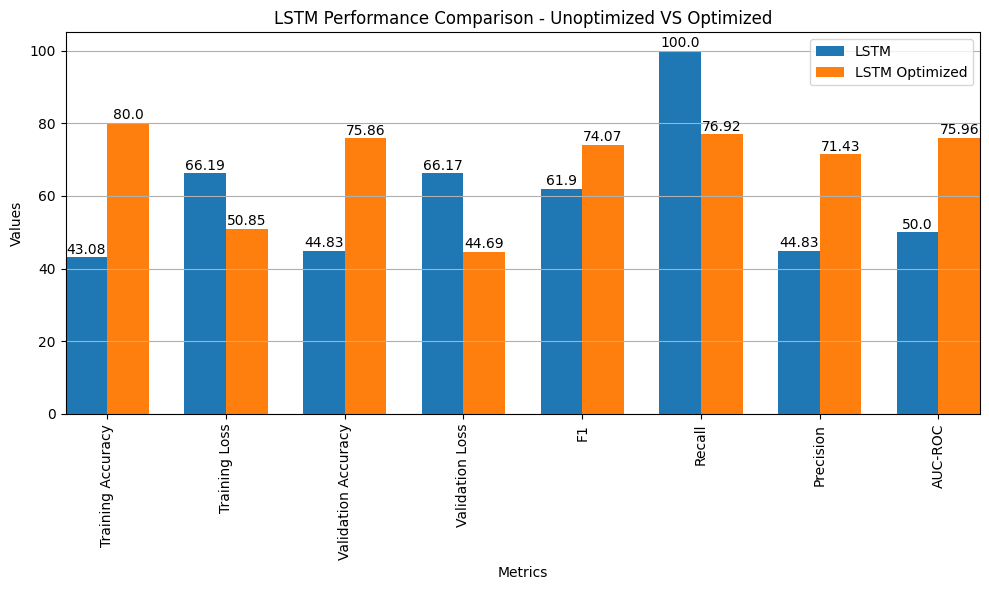

In [103]:
import matplotlib.pyplot as plt

# Group labels
group_labels = ['Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss', 'F1', 'Recall', 'Precision', 'AUC-ROC']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.35  # Adjust bar width for better visualization

index = range(len(group_labels))  # Create x-axis positions

std_lstm_perf = prep_array(lstm_perf.copy(), 4)
std_lstm_optimized_perf = prep_array(lstm_optimized_perf.copy(), 4)

bar1 = plt.bar(index, std_lstm_perf, bar_width, label='LSTM')
bar2 = plt.bar([p + bar_width for p in index], std_lstm_optimized_perf, bar_width, label='LSTM Optimized')

# Add annotations (text) above each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

# Set x-axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('LSTM Performance Comparison - Unoptimized VS Optimized')

# Add x-axis tick labels with group labels
plt.xticks([p + 0.5 * bar_width for p in index], group_labels, rotation = 90)

# Add legend
plt.legend()

# Show the chart
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()
plt.margins(x=0)
plt.show()

#### SVM Performance Comparison - Unoptimized VS Optimized

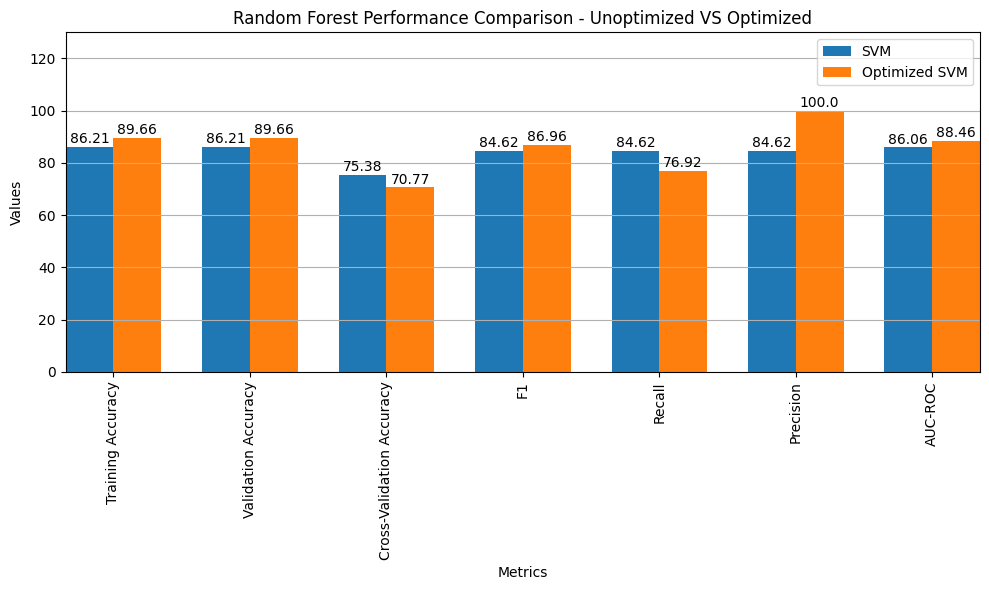

In [102]:
import matplotlib.pyplot as plt

# Group labels
group_labels = ['Training Accuracy', 'Validation Accuracy', 'Cross-Validation Accuracy', 'F1', 'Recall', 'Precision', 'AUC-ROC']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.35  # Adjust bar width for better visualization

index = range(len(group_labels))  # Create x-axis positions

std_svm_perf = prep_array(svm_perf.copy(), 3)
std_svm_opt_perf = prep_array(svm_opt_perf.copy(), 3)

bar1 = plt.bar(index, std_svm_perf, bar_width, label='SVM')
bar2 = plt.bar([p + bar_width for p in index], std_svm_opt_perf, bar_width, label='Optimized SVM')

# Add annotations (text) above each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

# Set x-axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest Performance Comparison - Unoptimized VS Optimized')

# Add x-axis tick labels with group labels
plt.xticks([p + 0.5 * bar_width for p in index], group_labels, rotation = 90)

# Set the maximum y-axis value with a small buffer
plt.ylim(0, 130)  # Adjust the buffer as needed (e.g., 10%)

# Add legend
plt.legend()

# Show the chart
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()
plt.margins(x=0)
plt.show()

#### Random Forest Performance Comparison - Unoptimized VS Optimized

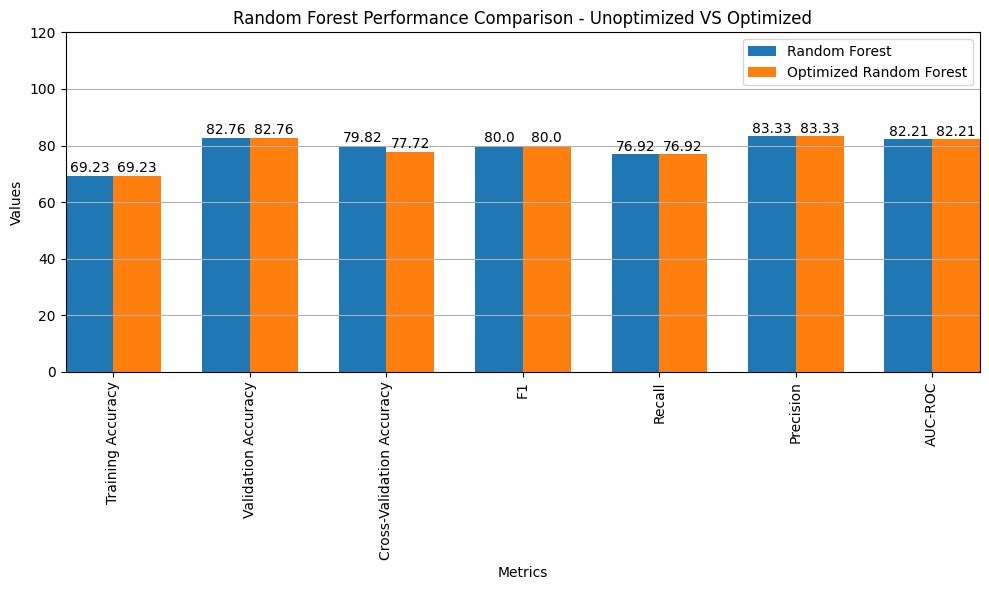

In [100]:
import matplotlib.pyplot as plt

# Group labels
group_labels = ['Training Accuracy', 'Validation Accuracy', 'Cross-Validation Accuracy', 'F1', 'Recall', 'Precision', 'AUC-ROC']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.35  # Adjust bar width for better visualization

index = range(len(group_labels))  # Create x-axis positions

std_rf_perf = prep_array(rf_perf.copy(), 3)
std_rf_opt_perf = prep_array(rf_opt_perf.copy(), 3)

bar1 = plt.bar(index, std_rf_perf, bar_width, label='Random Forest')
bar2 = plt.bar([p + bar_width for p in index], std_rf_opt_perf, bar_width, label='Optimized Random Forest')

# Add annotations (text) above each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed


# Set x-axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest Performance Comparison - Unoptimized VS Optimized')

# Add x-axis tick labels with group labels
plt.xticks([p + 0.5 * bar_width for p in index], group_labels, rotation = 90)

# Set the maximum y-axis value with a small buffer
plt.ylim(0, 120) 

# Add legend
plt.legend()

# Show the chart
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()
plt.margins(x=0)
plt.show()

## Algorithm Performance Comparison of Optimized Models

In [106]:
std_lstm_optimized_perf

[80.0000011920929,
 50.85391402244568,
 75.86206793785095,
 44.68644559383392,
 74.07407407407408,
 76.92307692307693,
 71.42857142857143,
 75.96153846153845]

In [115]:
# Alternative approach using np.take
desired_indices = np.take(std_lstm_optimized_perf, [0, 2, 4, 5, 6, 7])

[80.00000119 75.86206794 74.07407407 76.92307692 71.42857143 75.96153846]


In [107]:
std_rf_opt_perf

[69.23076923076923,
 82.75862068965517,
 77.71929824561403,
 80.0,
 76.92307692307693,
 83.33333333333334,
 82.21153846153845]

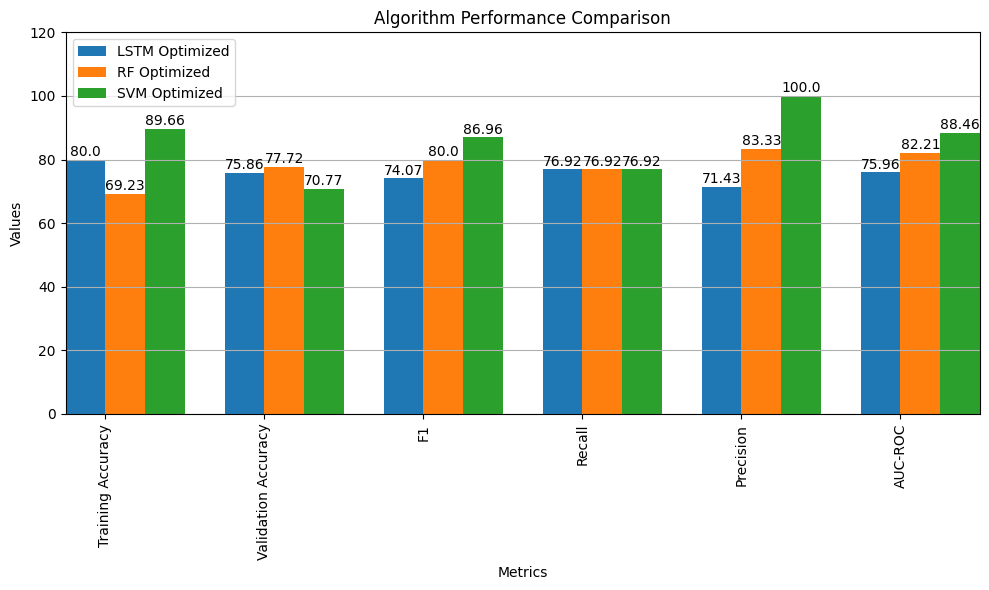

In [118]:
import matplotlib.pyplot as plt

# Group labels
group_labels = ['Training Accuracy', 'Validation Accuracy', 'F1', 'Recall', 'Precision', 'AUC-ROC']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.25  # Adjust bar width for better visualization

index = range(len(group_labels))  # Create x-axis positions

prep_lstm_optimized_perf = np.take(std_lstm_optimized_perf, [0, 2, 4, 5, 6, 7])
prep_rf_opt_perf = np.take(std_rf_opt_perf, [0, 2, 3, 4, 5, 6])
prep_svm_opt_perf = np.take(std_svm_opt_perf, [0, 2, 3, 4, 5, 6])

bar1 = plt.bar(index, prep_lstm_optimized_perf, bar_width, label='LSTM Optimized')
bar2 = plt.bar([p + bar_width for p in index], prep_rf_opt_perf, bar_width, label='RF Optimized')
bar3 = plt.bar([p + 2 * bar_width for p in index], prep_svm_opt_perf, bar_width, label='SVM Optimized')

# Add annotations (text) above each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed
    
for bar in bar3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + .2, f'{round(yval, 2)}', ha='center', va='bottom')  # Adjust offset as needed

# Set x-axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Algorithm Performance Comparison')

# Add x-axis tick labels with group labels
plt.xticks([p + 0.5 * bar_width for p in index], group_labels, rotation = 90)

# Set the maximum y-axis value with a small buffer
plt.ylim(0, 120) 

# Add legend
plt.legend()

# Show the chart
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()
plt.margins(x=0)
plt.show()